In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
crime_data = pd.read_csv("ucr_participation_1960_2022(2).csv")
# data overviews
print(crime_data.head())
# data information 
print("\n data information \n")
print(crime_data.info())

   data_year     state_name  total_agencies  participation_agencies  \
0       1969       Michigan             304                     273   
1       2000  West Virginia             387                     264   
2       1996          Idaho             137                     115   
3       2008        Indiana             366                     304   
4       1968     Washington             125                     116   

   participating_agencies_pct  nibrs_participating_agencies  \
0                        0.90                             0   
1                        0.68                           264   
2                        0.84                           111   
3                        0.83                             0   
4                        0.93                             0   

   nibrs_participating_agencies.1  covered_agencies  covered_pct  \
0                            0.00                 0          0.0   
1                            1.00                 0       

In [71]:
# selecting my categotical  data from my dataset 
categorical_data = crime_data.select_dtypes(include=['object'])
#print(categorical_data.head(5))
#print(categorical_data.info())
categorical_data_summery = crime_data.select_dtypes(include=['object']).describe().T
print(categorical_data_summery)

           count unique       top freq
state_name  3422     57  Michigan   63


In [33]:
# Extract and print continuous variables
continuous_data = crime_data.select_dtypes(include=['int64', 'float64'])
#print(continuous_data.head(5))
#print(continuous_data.info())
# my data summary 
continuous_data_summery = crime_data.describe().T
print(continuous_data_summery)

                                 count          mean           std     min  \
data_year                       3422.0  1.991344e+03  1.822514e+01  1960.0   
total_agencies                  3422.0  3.052487e+02  2.953431e+02     0.0   
participation_agencies          3422.0  2.360570e+02  2.347002e+02     0.0   
participating_agencies_pct      3422.0  7.382934e-01  2.384620e-01     0.0   
nibrs_participating_agencies    3422.0  4.775891e+01  1.188603e+02     0.0   
nibrs_participating_agencies.1  3422.0  1.839860e-01  3.594151e-01     0.0   
covered_agencies                3422.0  4.351257e-01  2.407184e+00     0.0   
covered_pct                     3422.0  1.534191e-03  7.222312e-03     0.0   
total_population                3422.0  4.821150e+06  5.759160e+06     0.0   
nibrs_population                3422.0  7.278143e+05  2.005295e+06     0.0   

                                       25%        50%           75%  \
data_year                          1976.00     1991.0  2.007000e+03   

# Data Report

# 1. Continuous Features

**Objective:** This section documents the continuous features present in the dataset. Continuous features represent numeric data that can take any value, such as year, population, and agency participation metrics.
 National Incident-Based Reporting System (NIBRS)
 

## 1.1 Overview of Continuous Features

The following continuous features were identified in the dataset:

- `data_year`: Year of the data
- `total_agencies`: Total number of agencies participating
- `participation_agencies`: Number of participating agencies
- `participating_agencies_pct`: Percentage of participating agencies
- `nibrs_participating_agencies`: Number of agencies participating in NIBRS (National Incident-Based Reporting System)
- `covered_agencies`: Number of covered agencies
- `covered_pct`: Percentage of covered agencies
- `total_population`: Total population
- `nibrs_population`: Population covered by NIBRS

The following code was used to extract and summarize the continuous features:

```python
# Extract and print continuous variables
continuous_data = crime_data.select_dtypes(include=['int64', 'float64'])
continuous_data_summary = continuous_data.describe().T
print(continuous_data_summary)

### 2. Categorical Features

**Objective:** This section documents the categorical features in the dataset. Categorical features consist of labels, states, or other non-numeric data types.

#### 2.1 Overview of Categorical Features

The dataset contains the following categorical feature:

- `state_name`: Name of the state

To extract and analyze the categorical features, the following code was used:

```python
# Select and summarize categorical data
categorical_data = crime_data.select_dtypes(include=['object'])
categorical_data_summary = categorical_data.describe().T
print(categorical_data_summary)



### Conclusion

This dataset offers a comprehensive look at participation data from the UCR program between 1960 and 2022. It includes valuable continuous features such as population and agency participation, as well as categorical data that reflect state-level reporting. This analysis highlights the variability and completeness of the data and sets the stage for further analysis or model development.



# 2 Histograms of Continuous Features

# Create a histogram for each continuous feature. What probability distributions the histograms reveal? For example, uniform, normal (unimodal), unimodal (skewed right), unimodal (skewed left), exponential, and multimodal.


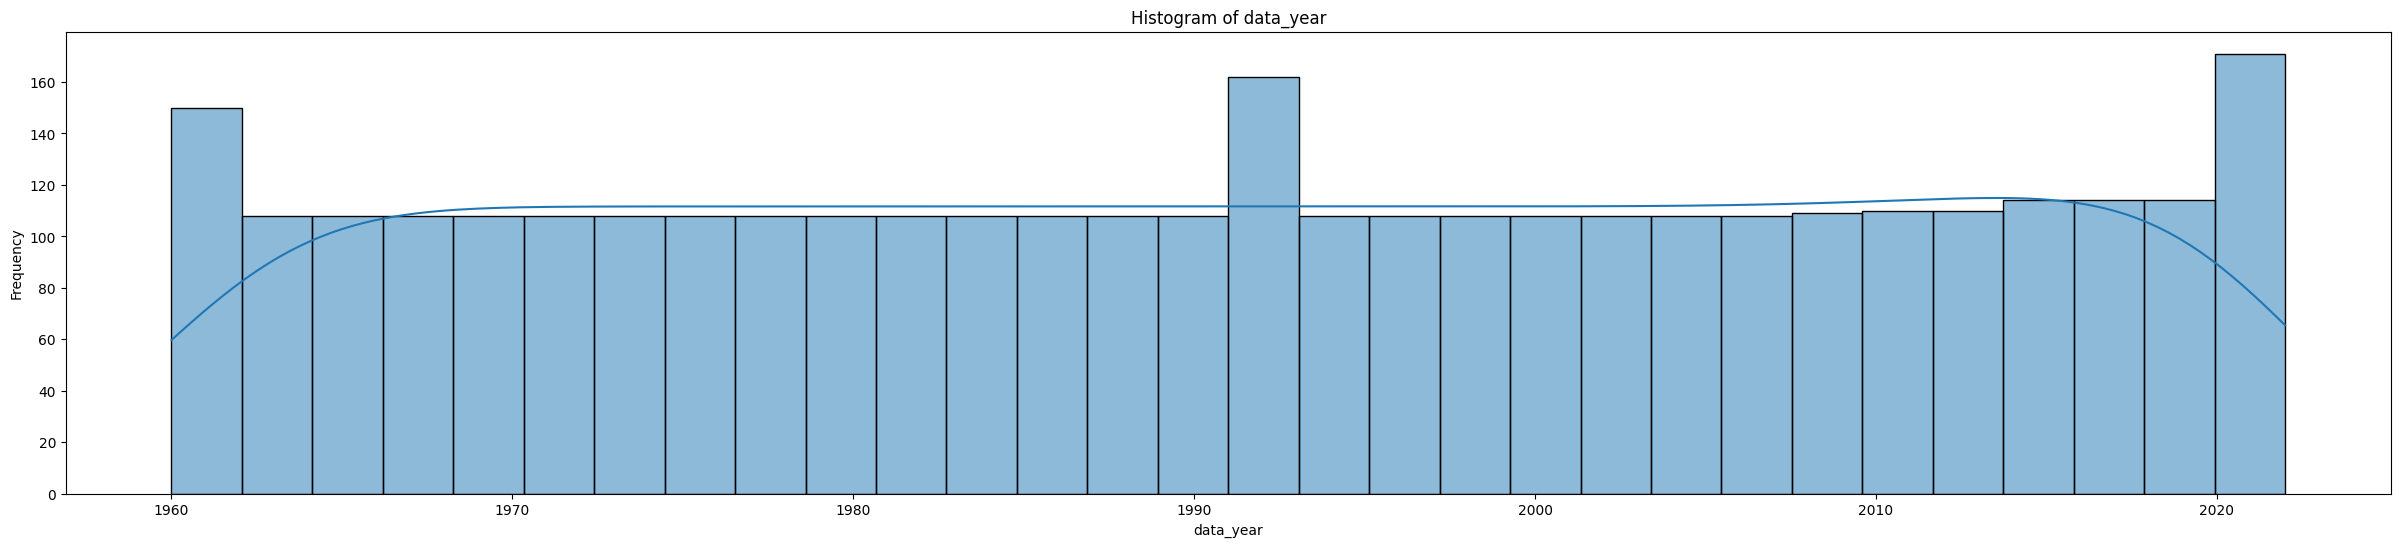

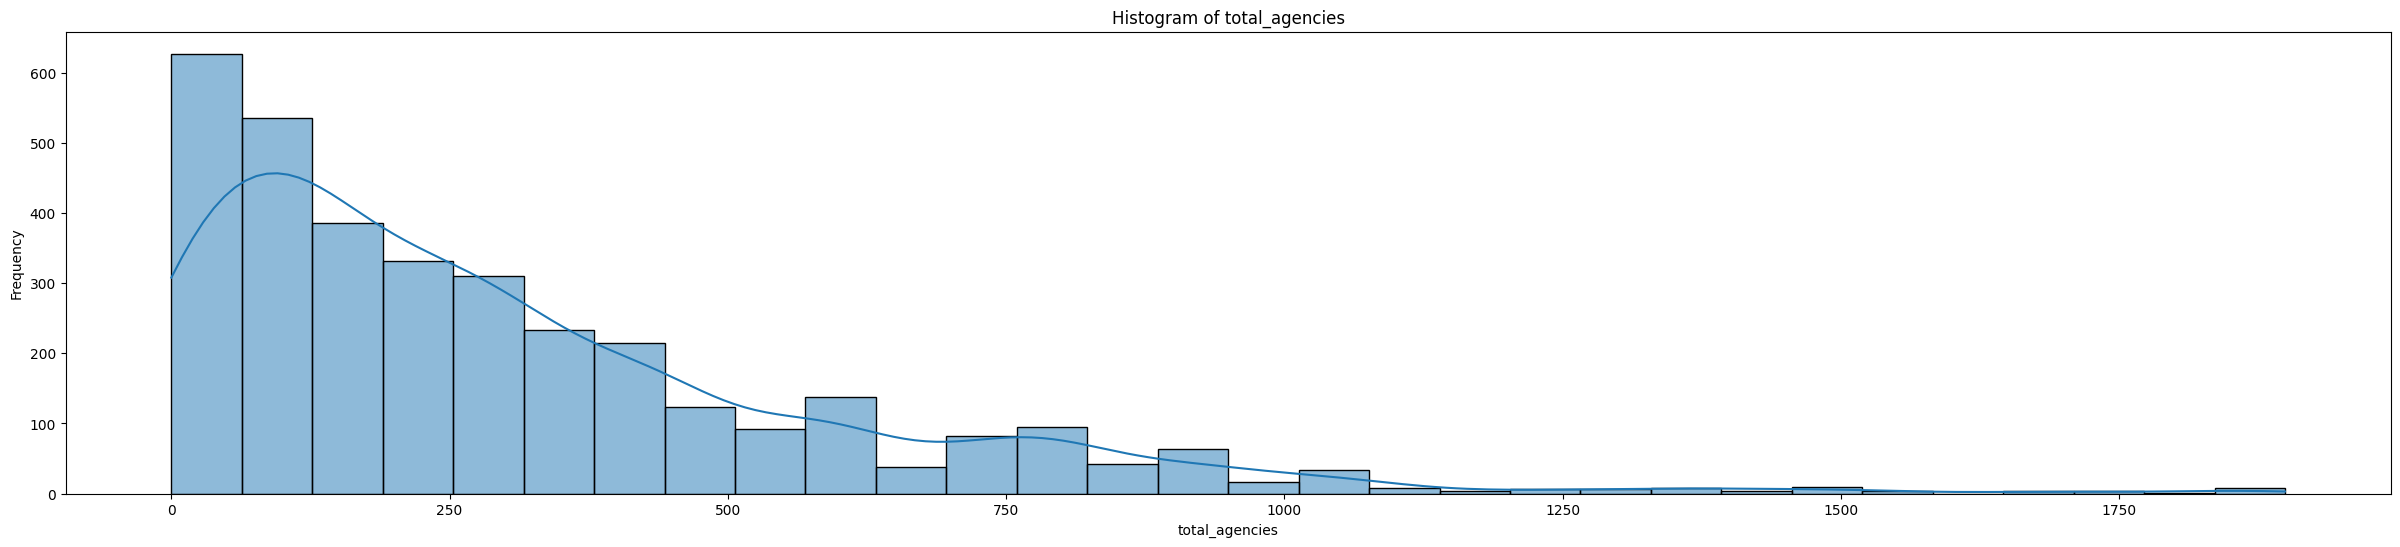

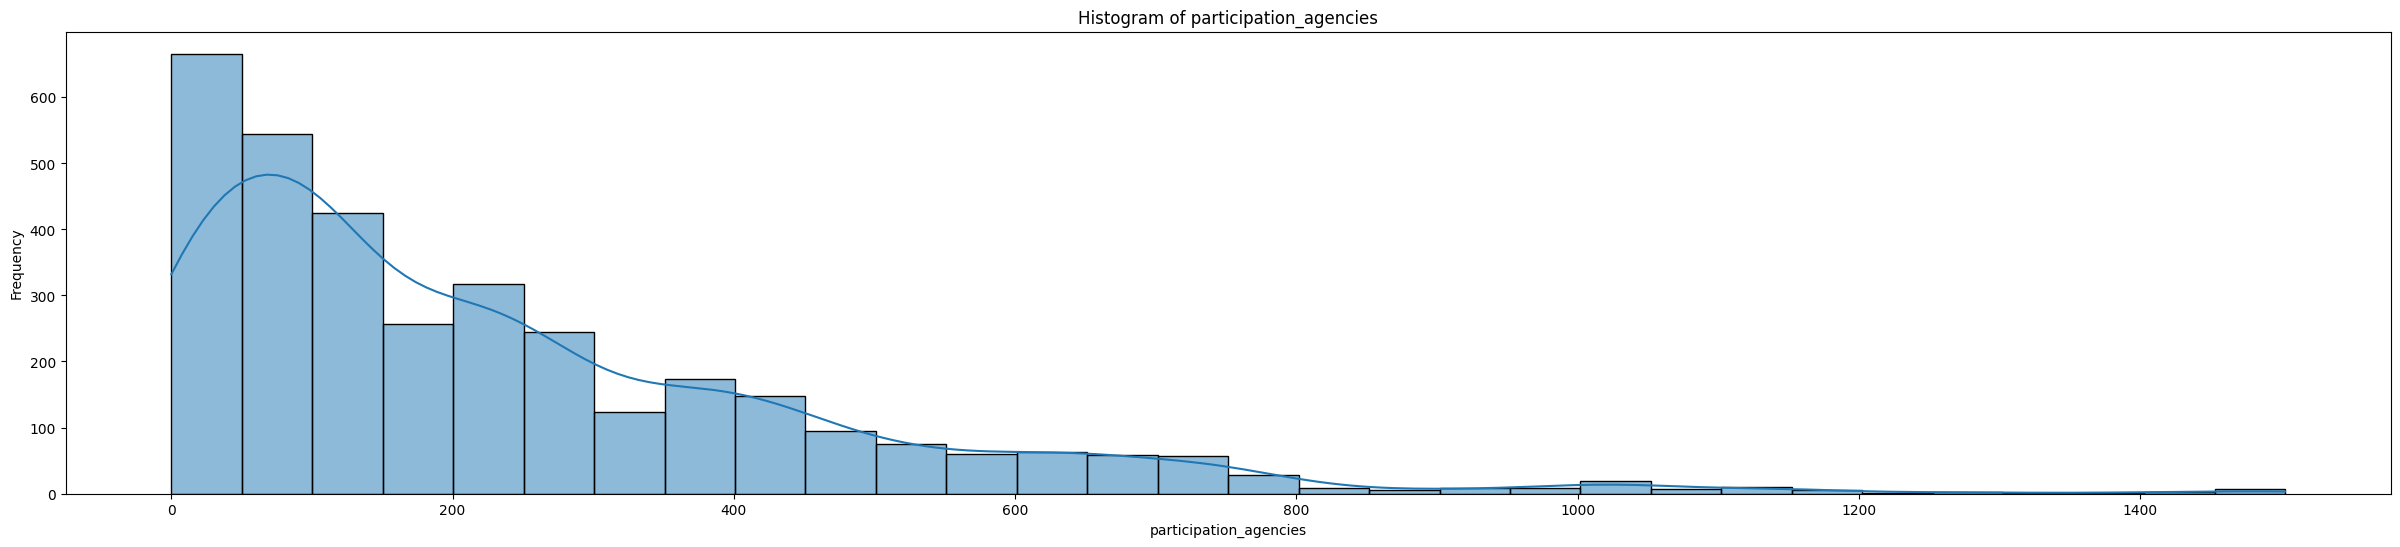

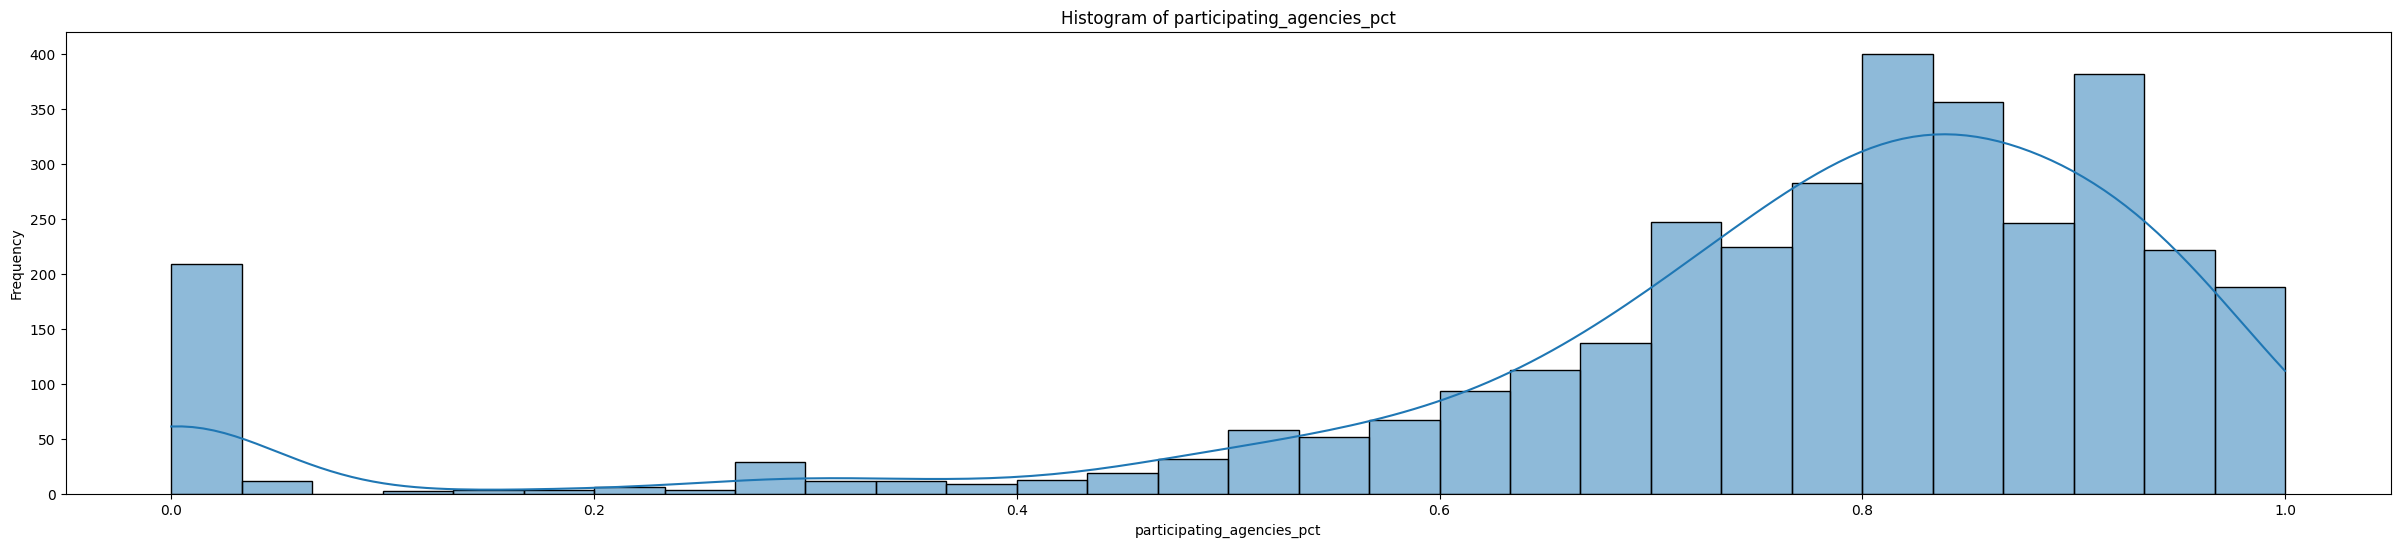

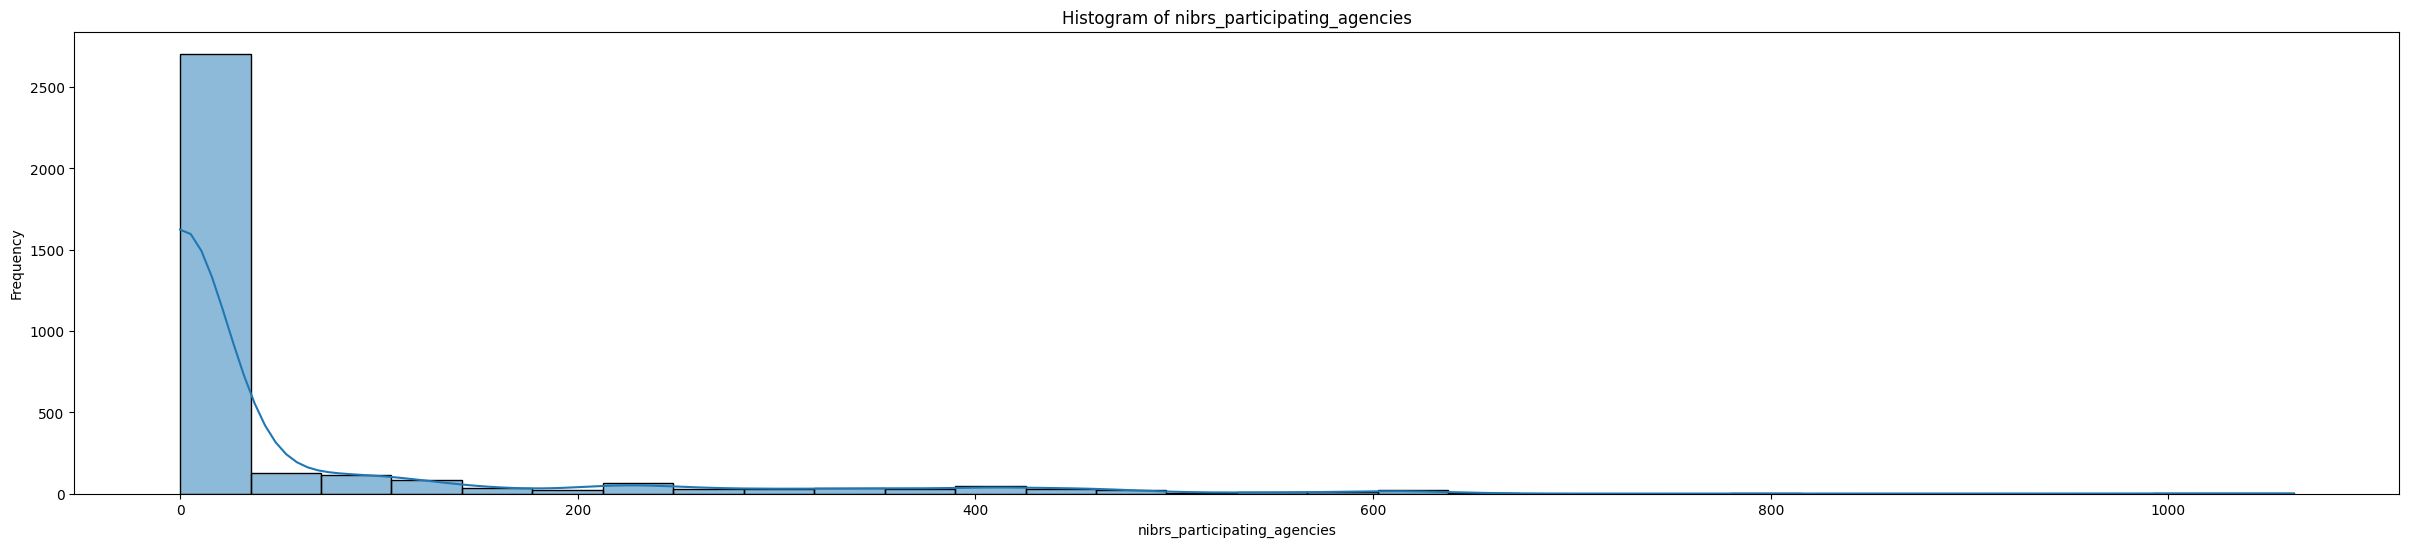

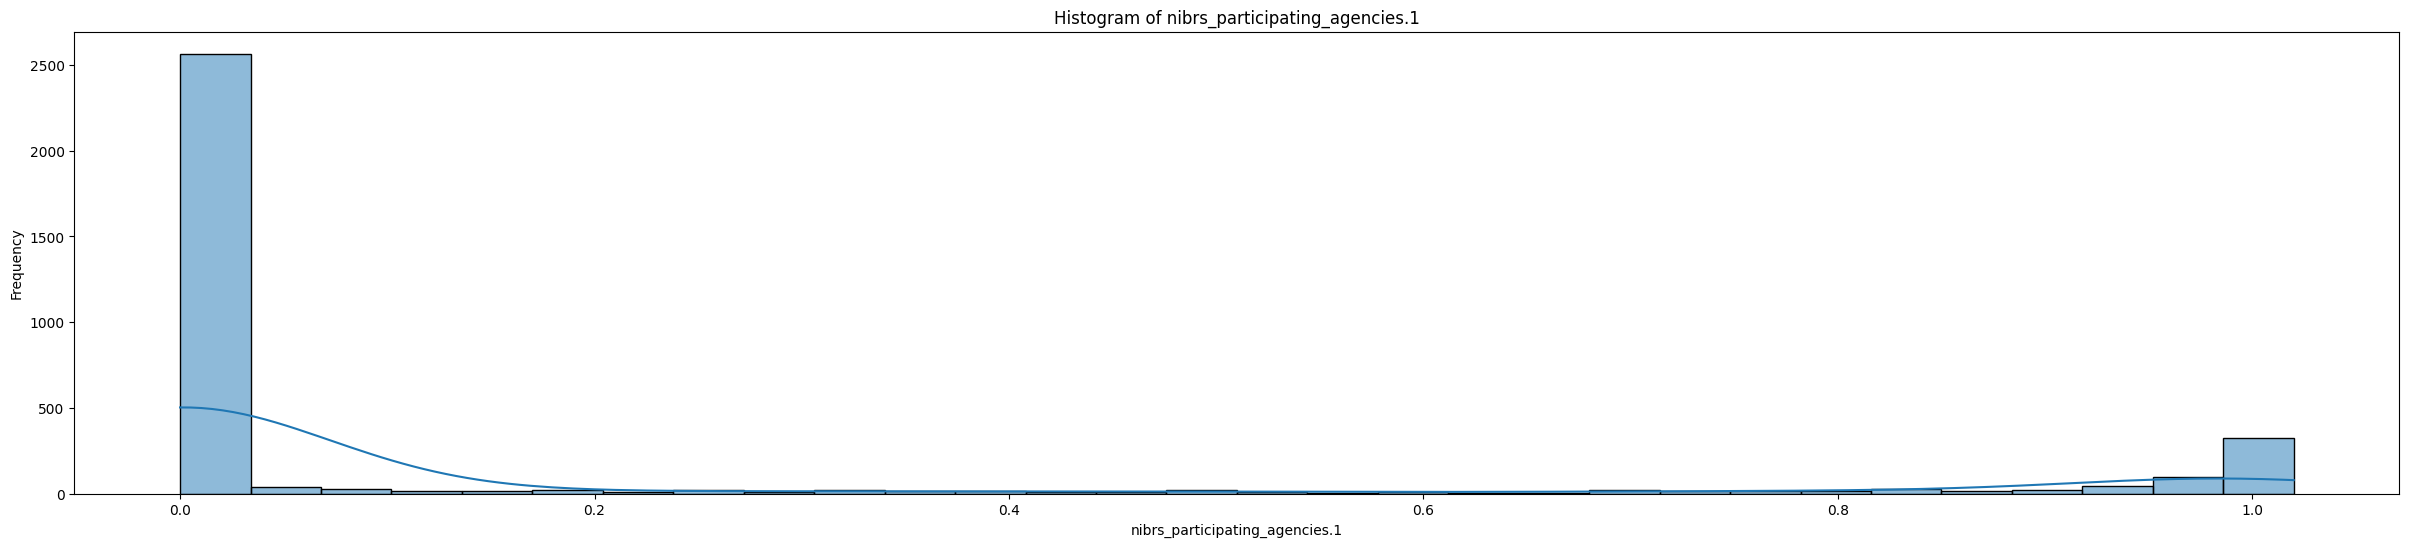

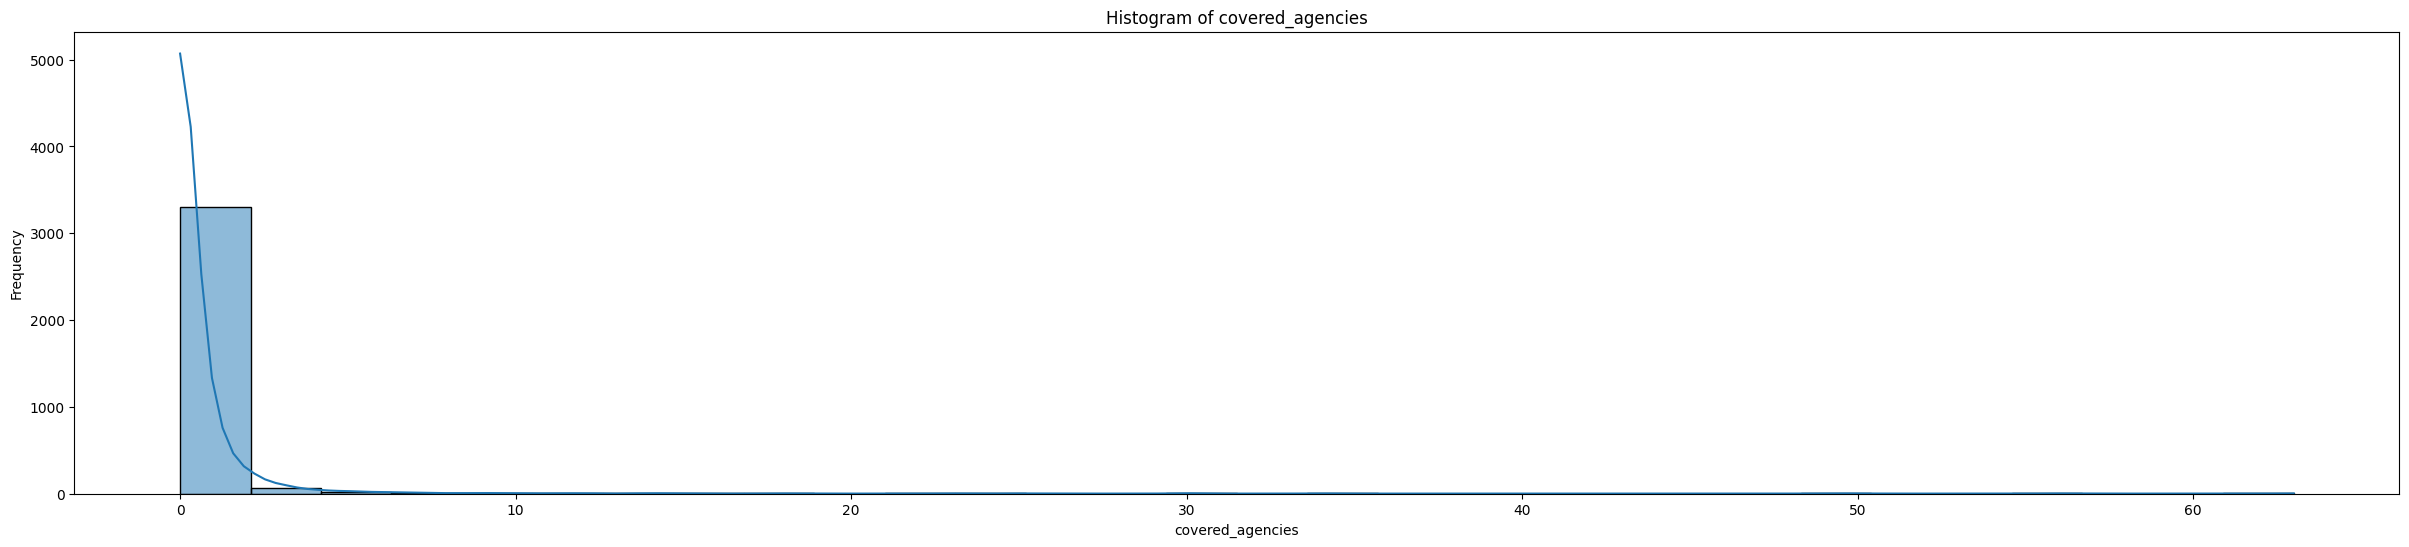

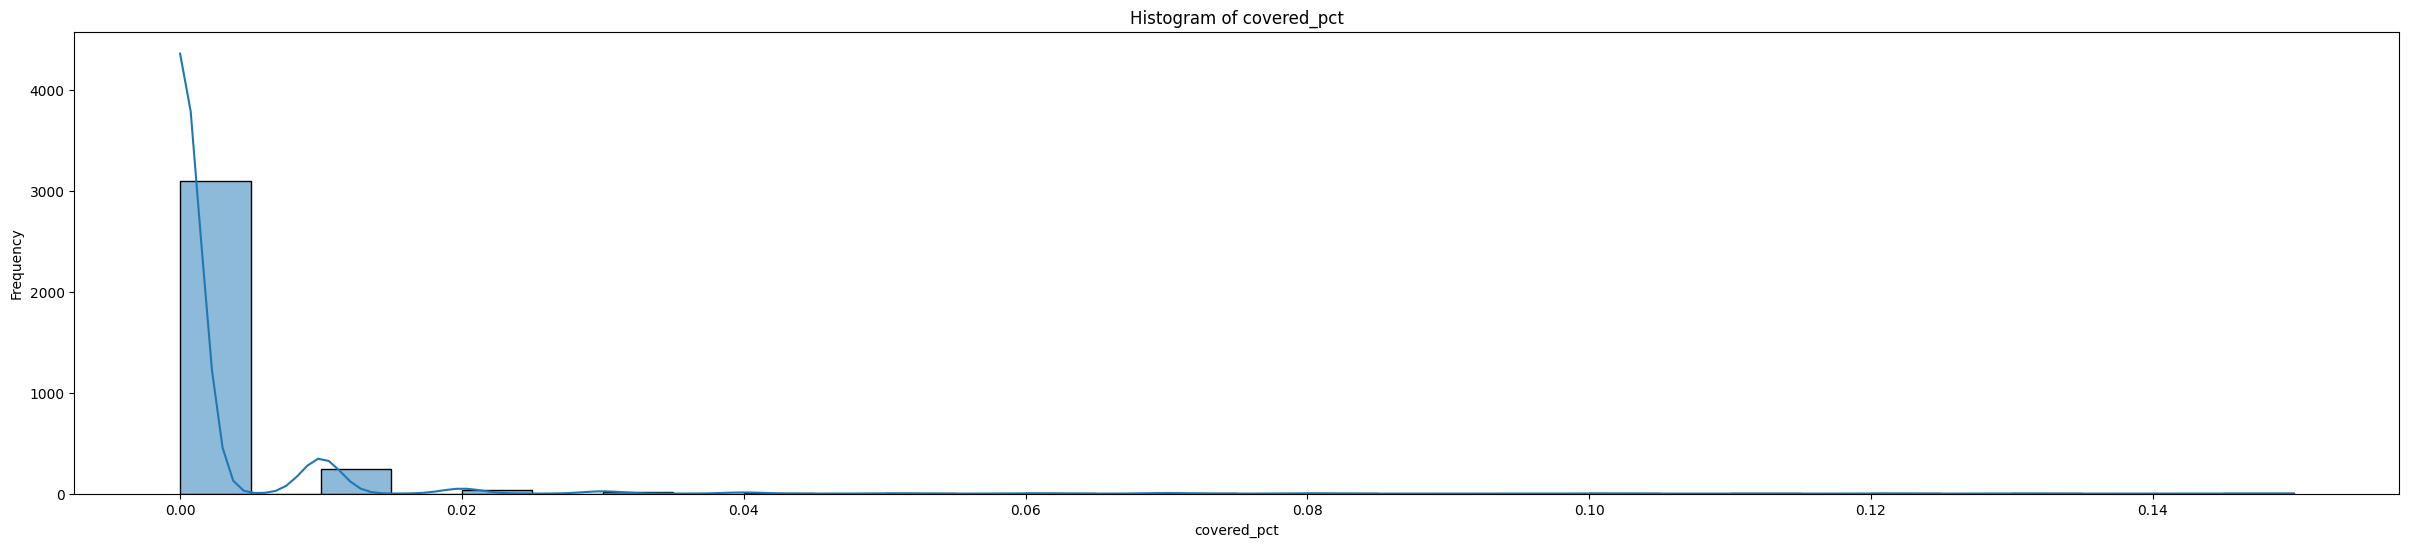

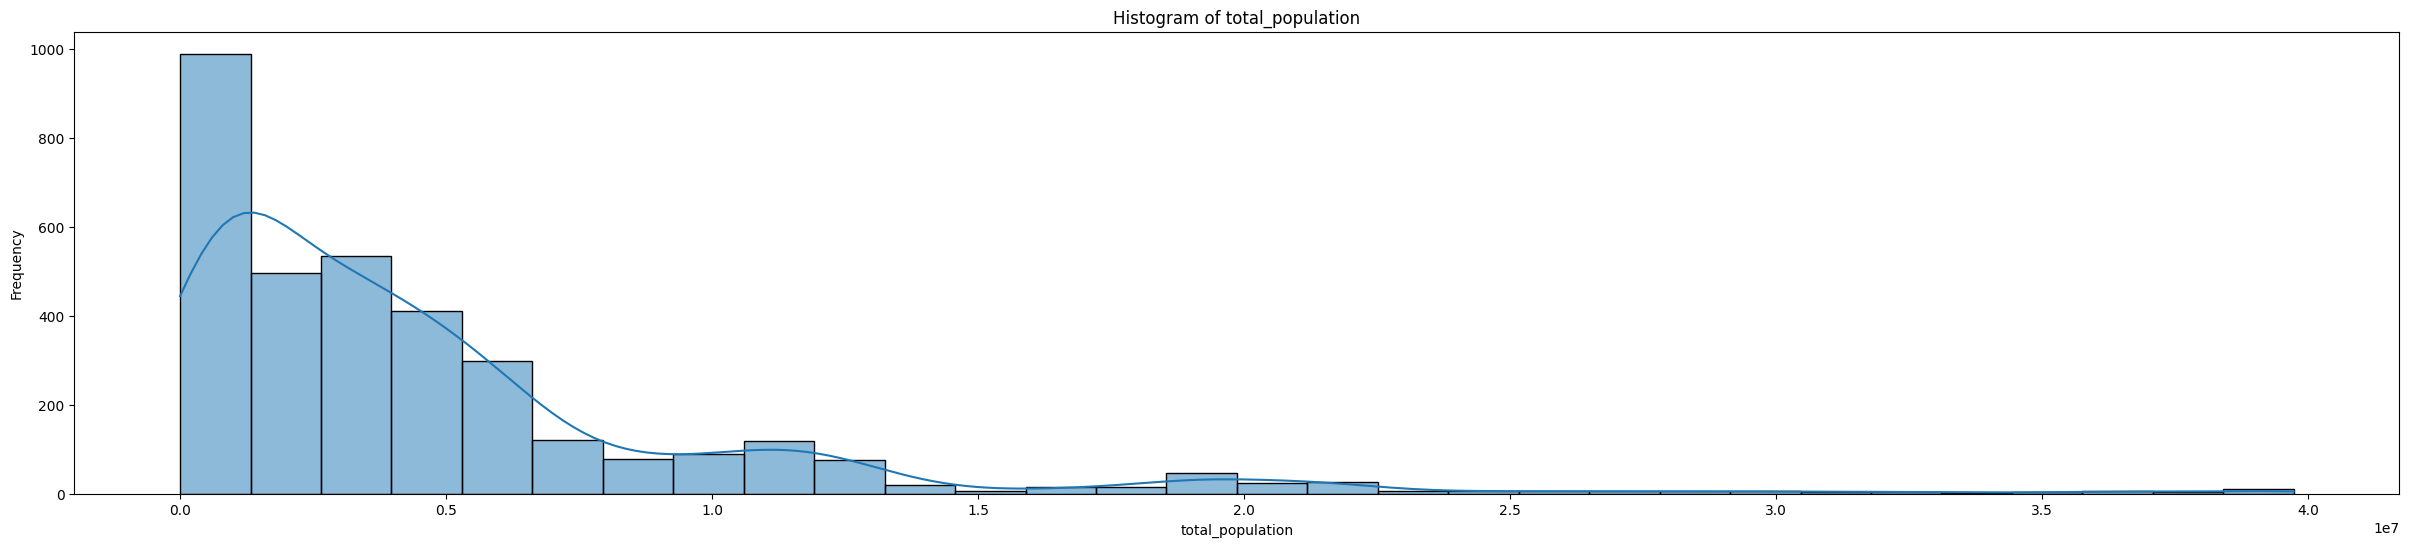

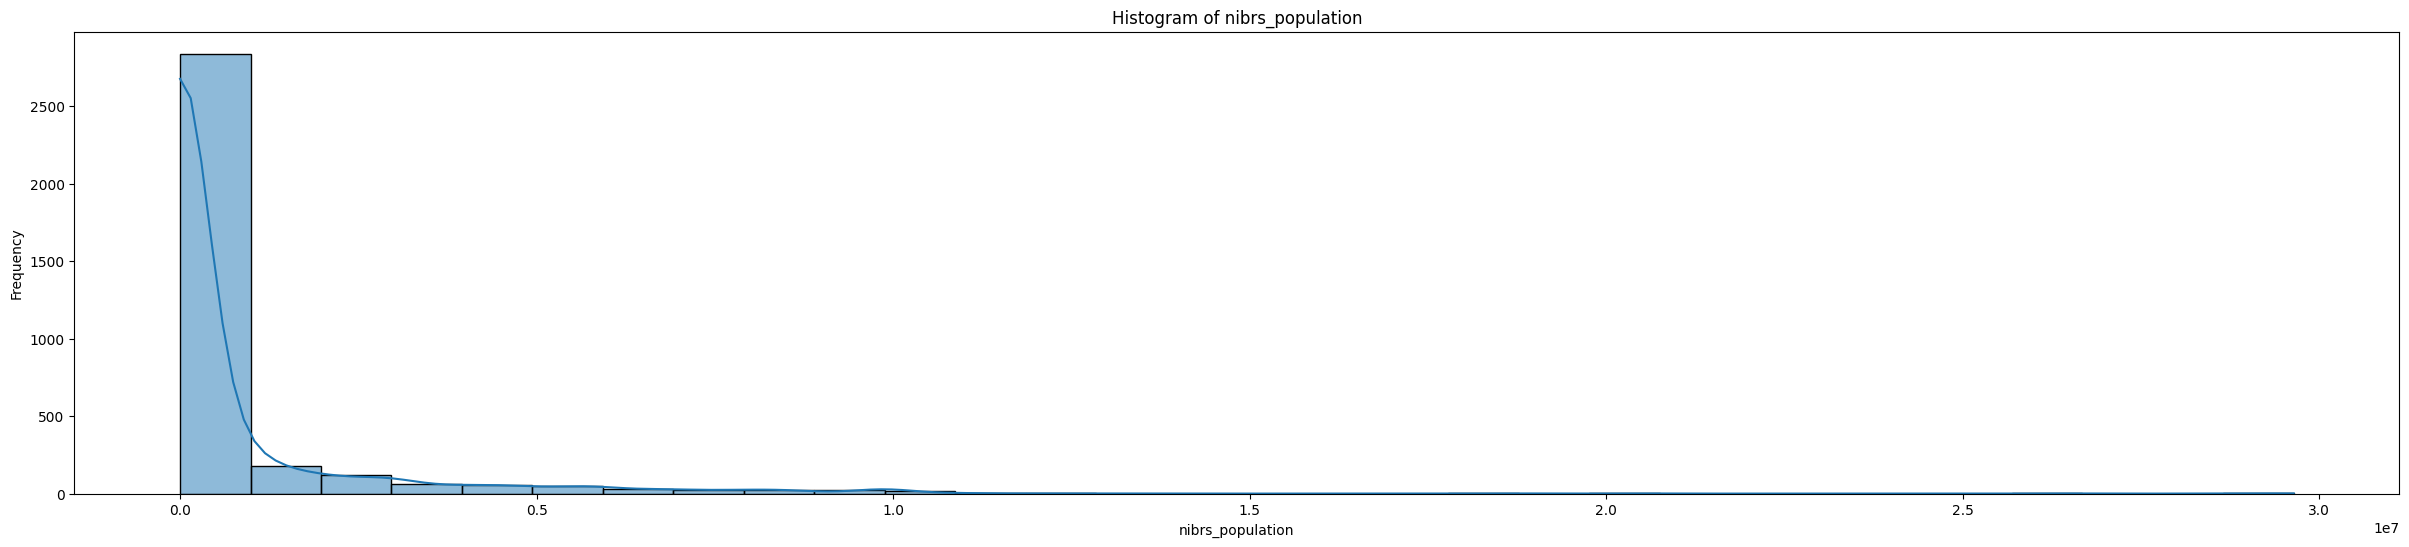

In [145]:
for column in continuous_data.columns:
    plt.figure(figsize=(30, 6))
    sns.histplot(continuous_data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Scatterplot Matrix

construct the scatterplot matrix for the continuous features and comment on what you observed.

Index(['data_year', 'total_agencies', 'participation_agencies',
       'participating_agencies_pct', 'nibrs_participating_agencies',
       'nibrs_participating_agencies.1', 'covered_agencies', 'covered_pct',
       'total_population', 'nibrs_population'],
      dtype='object')


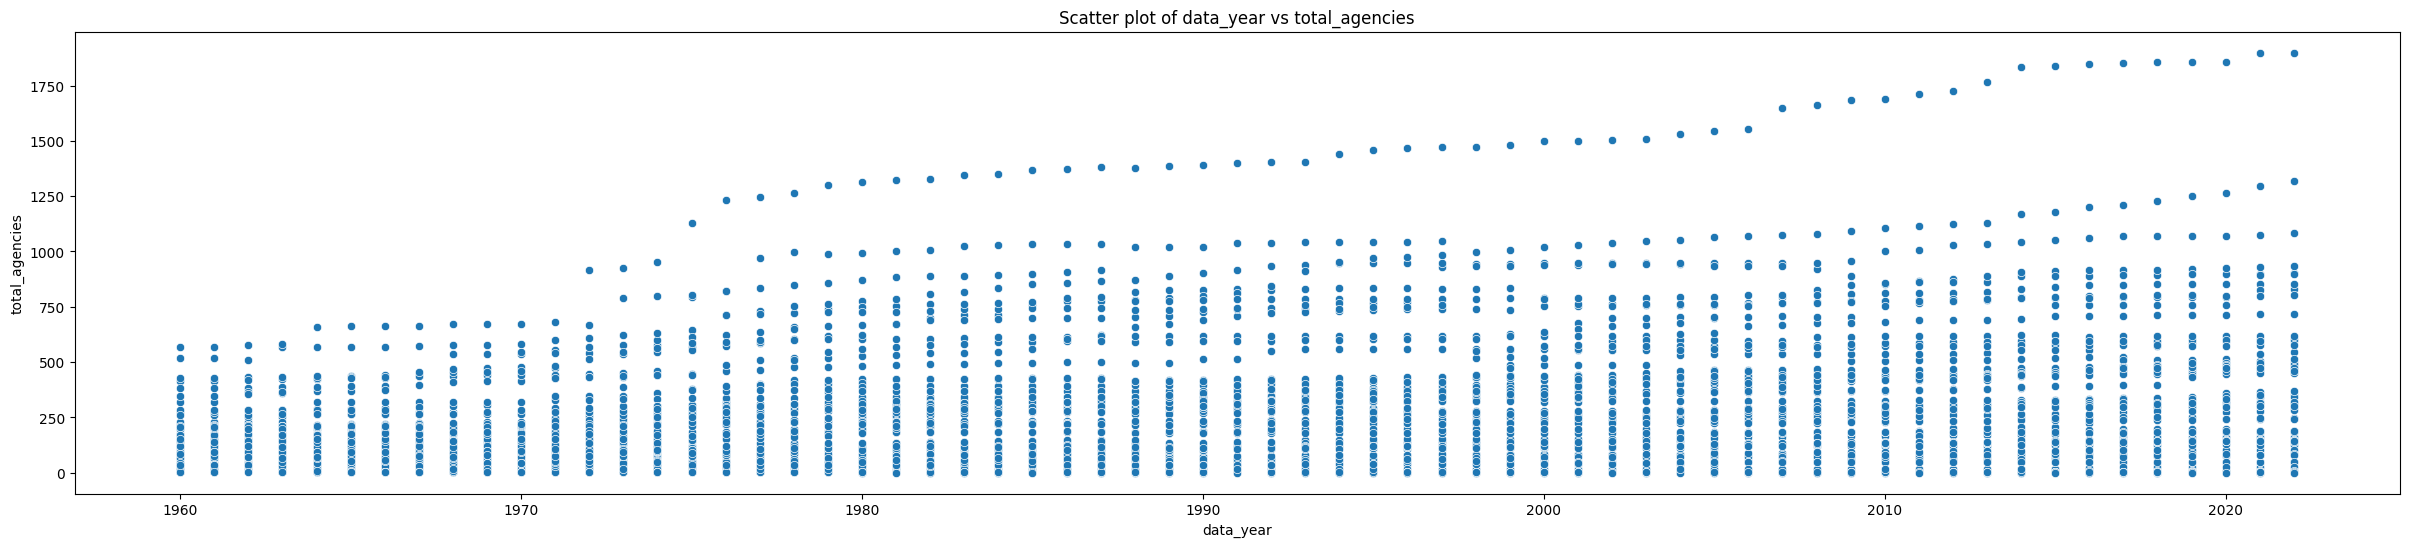

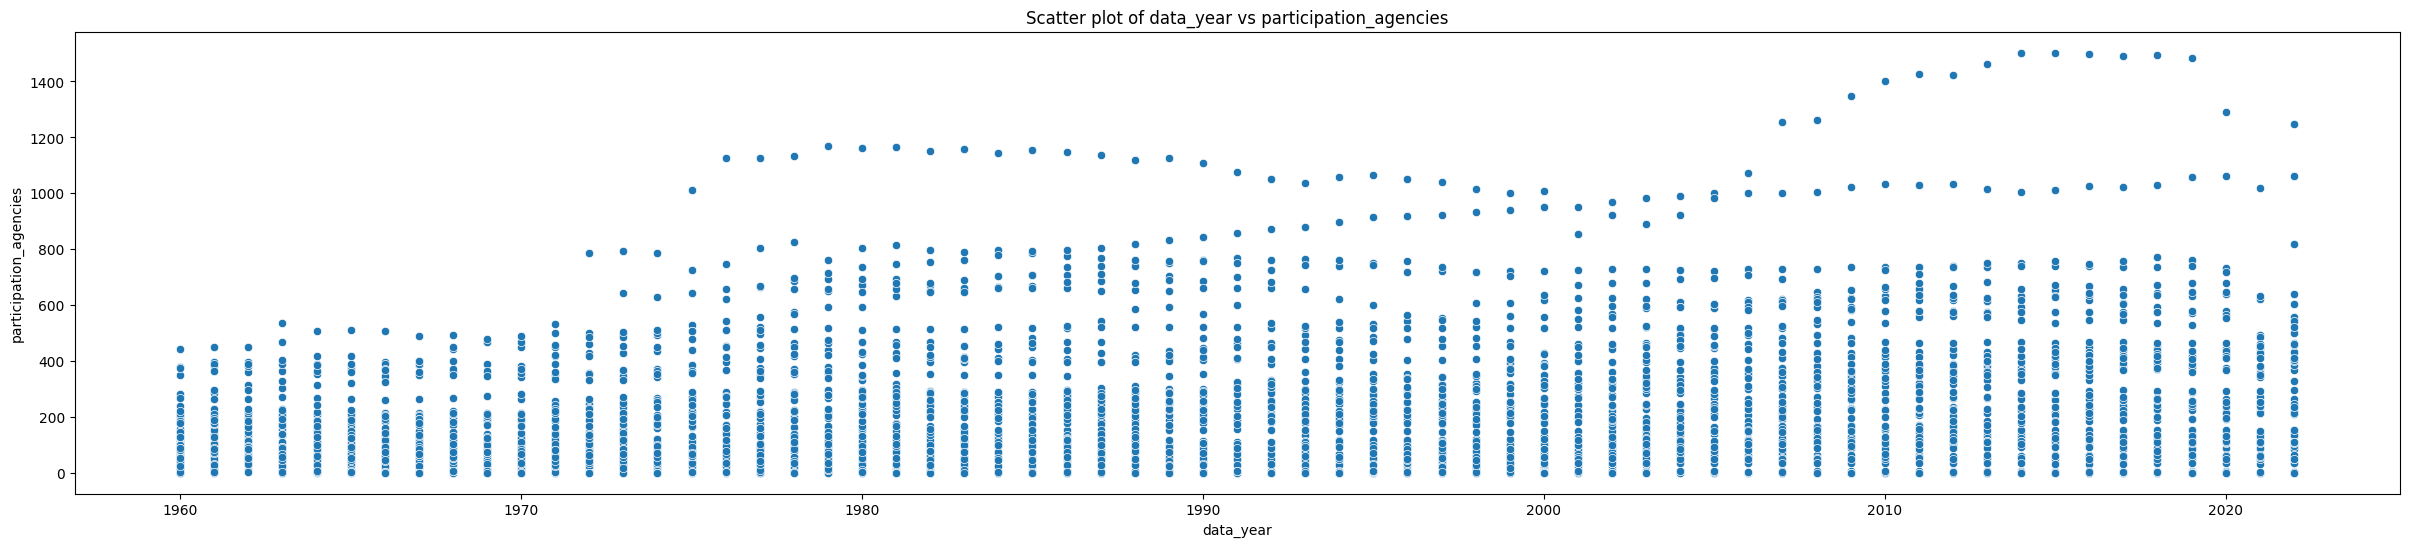

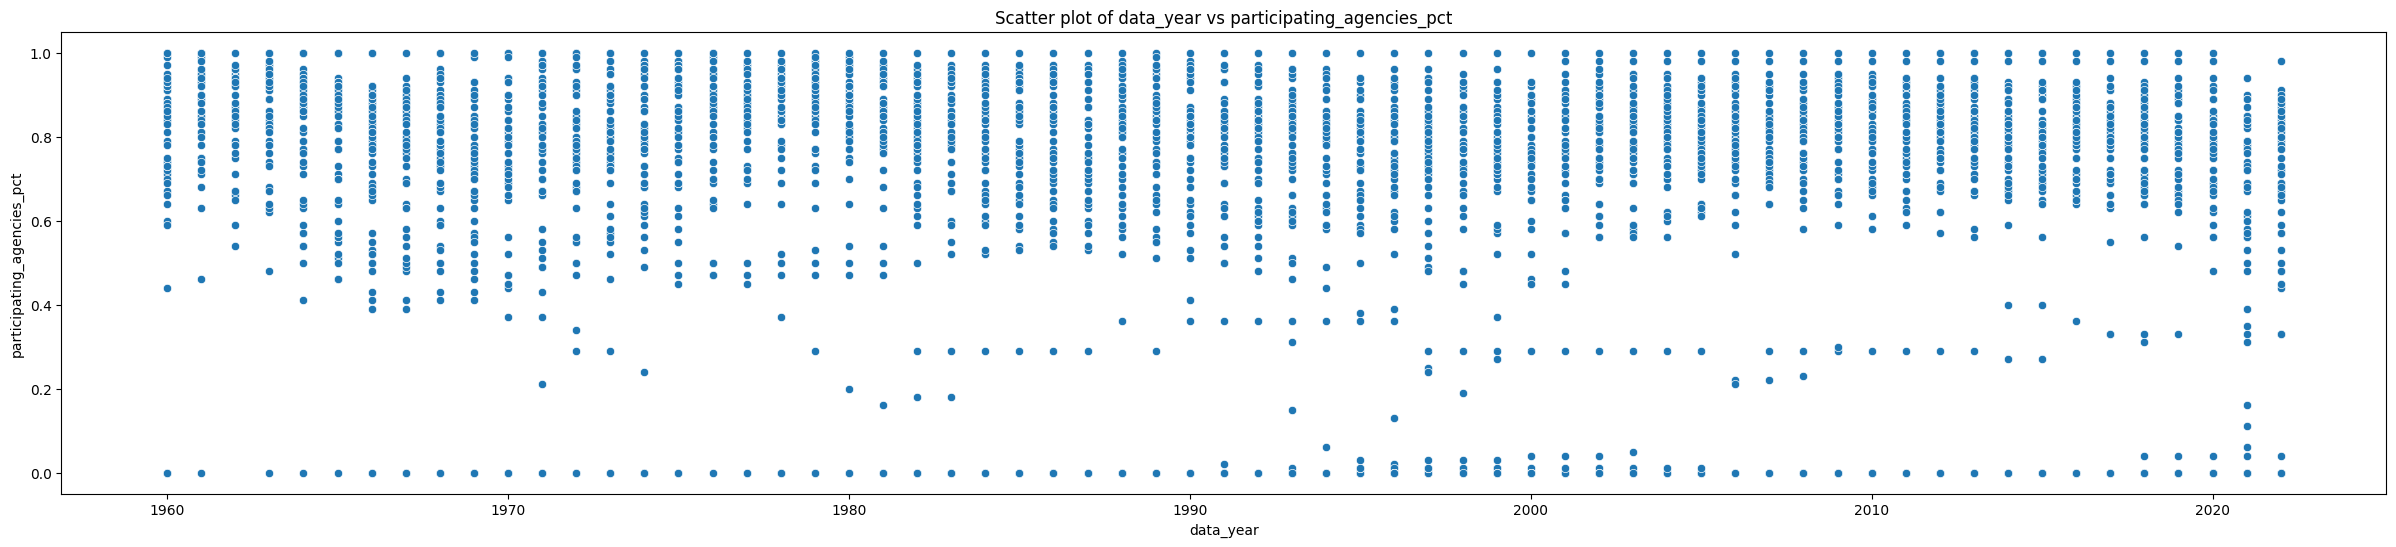

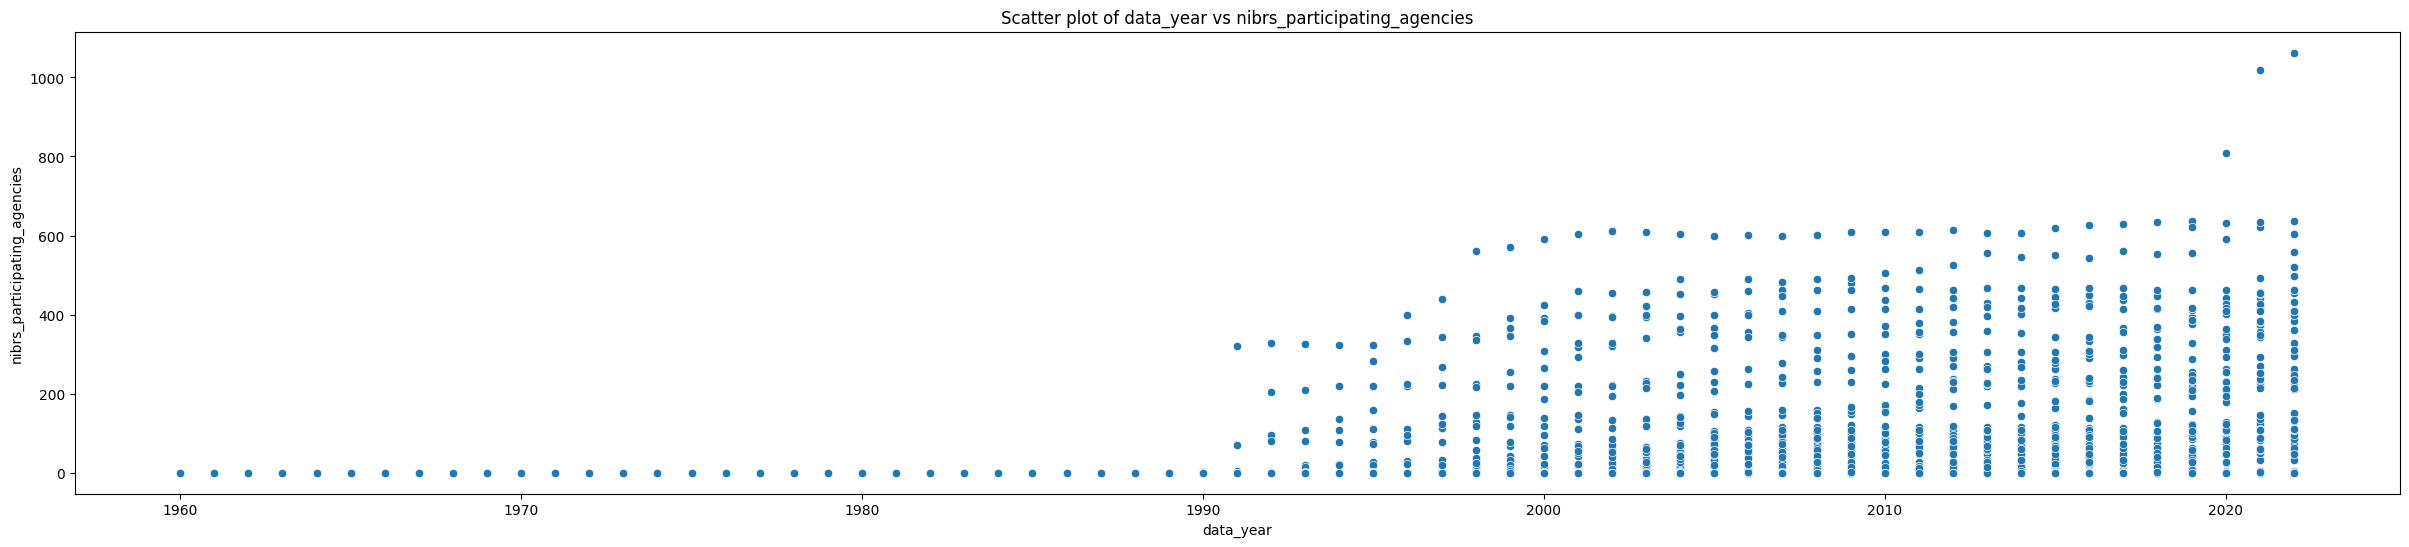

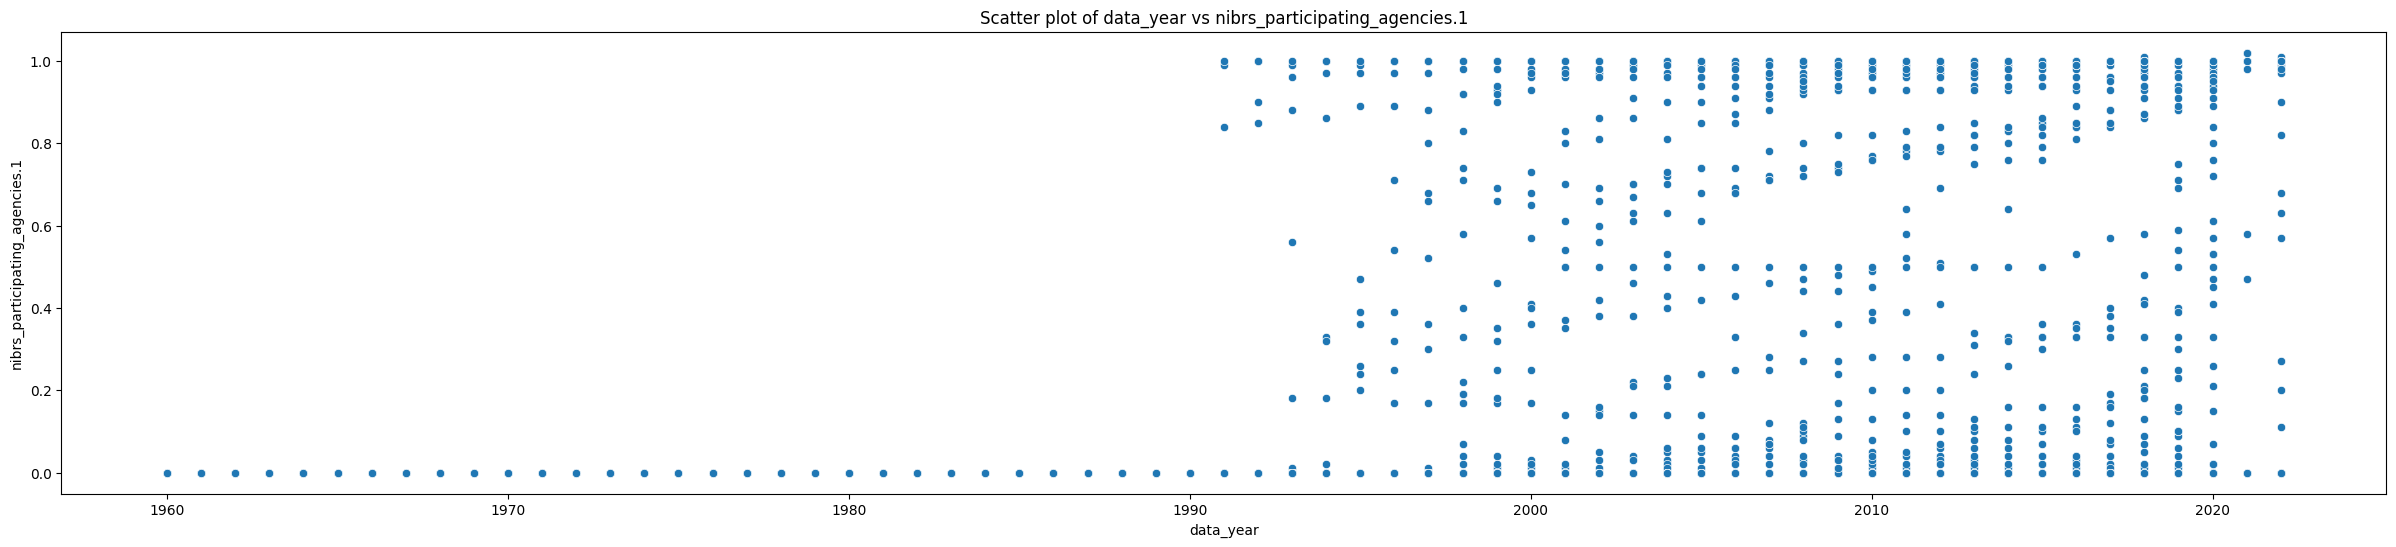

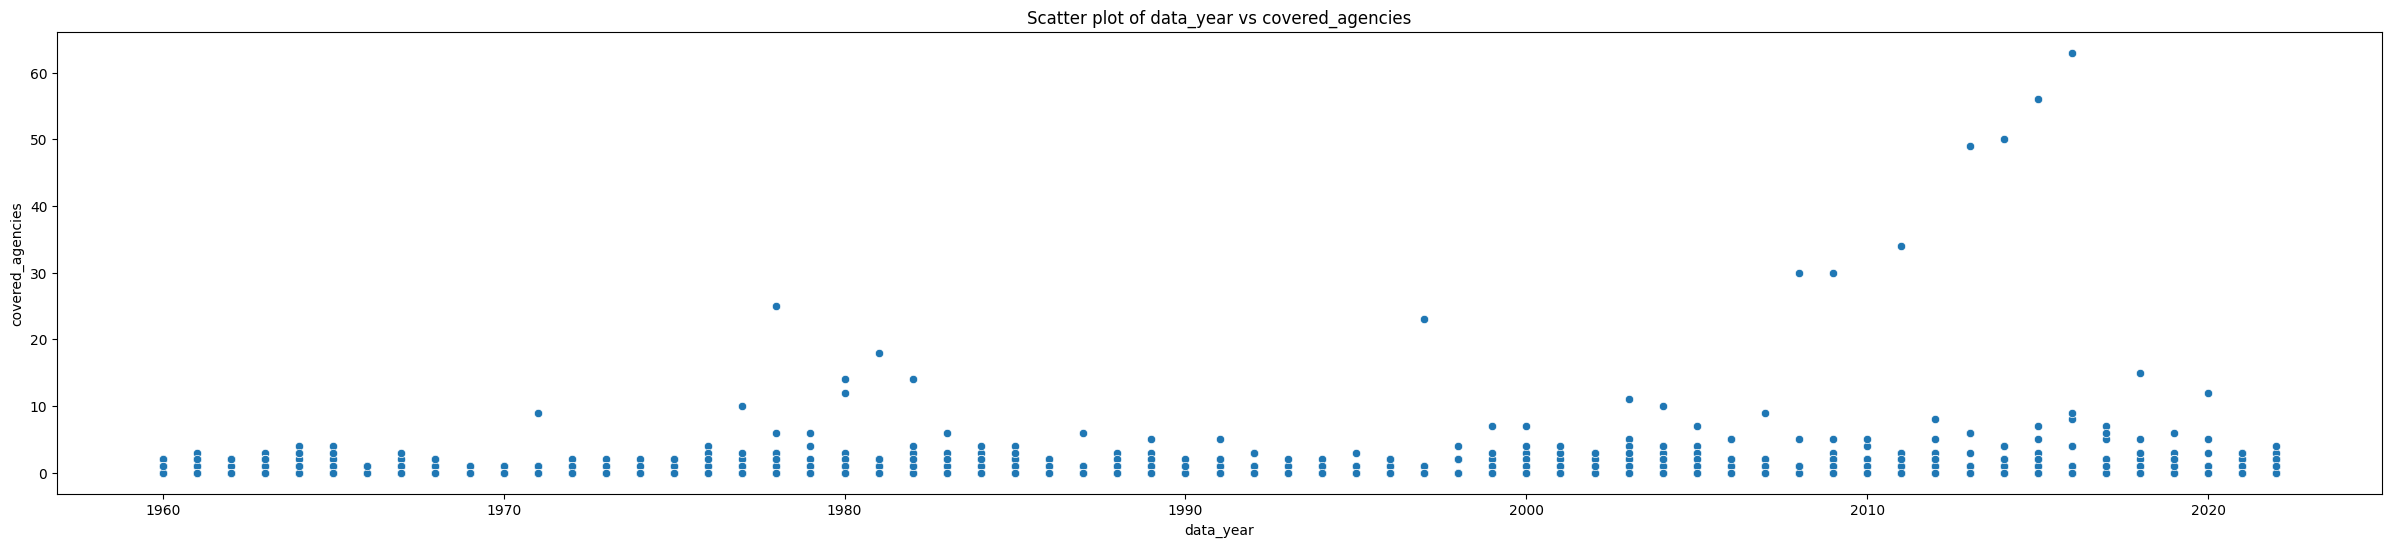

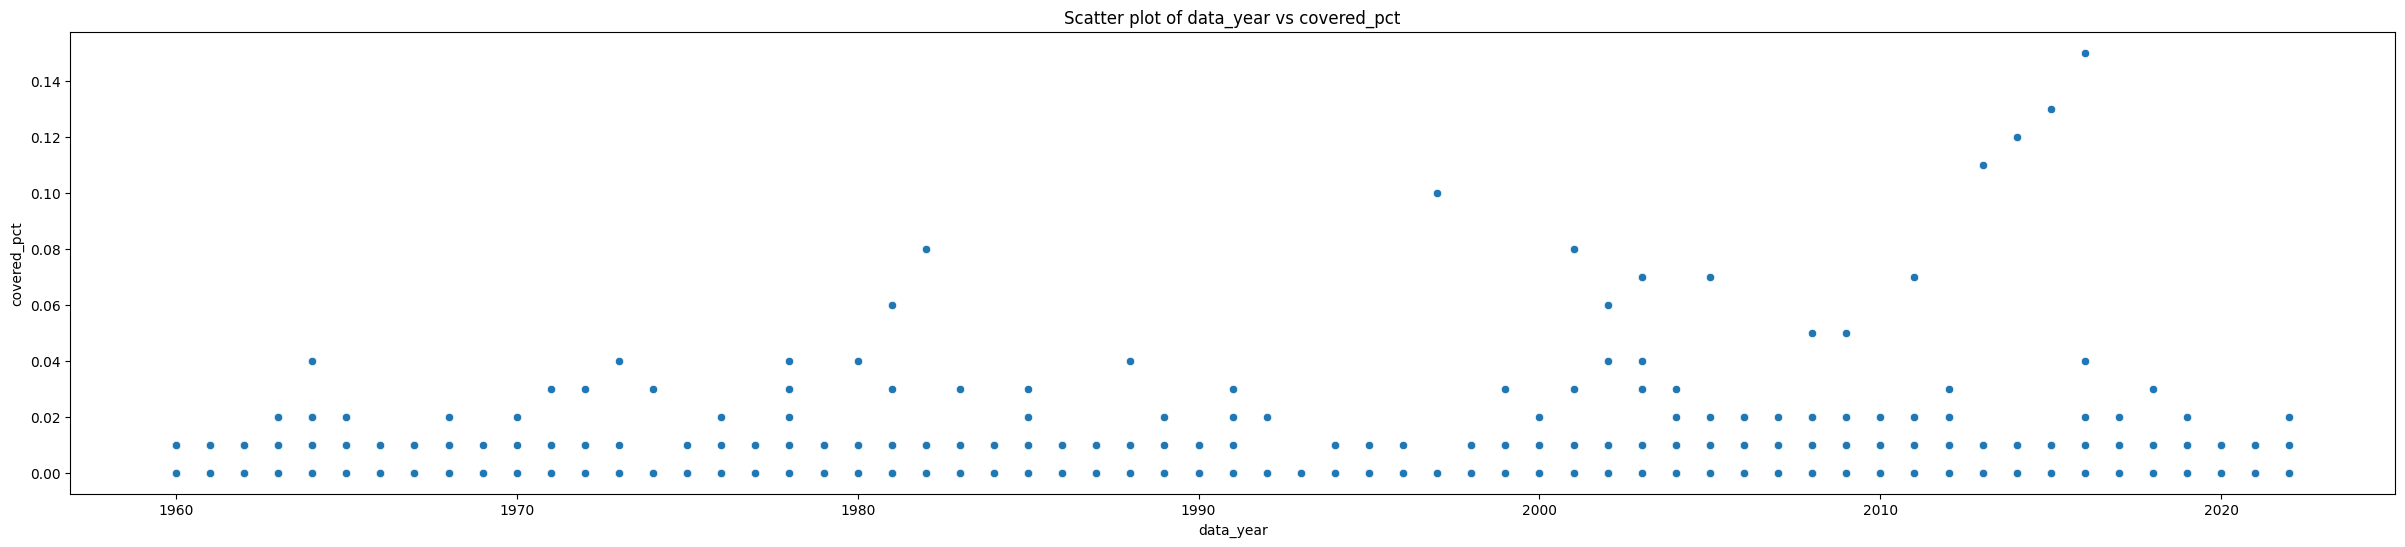

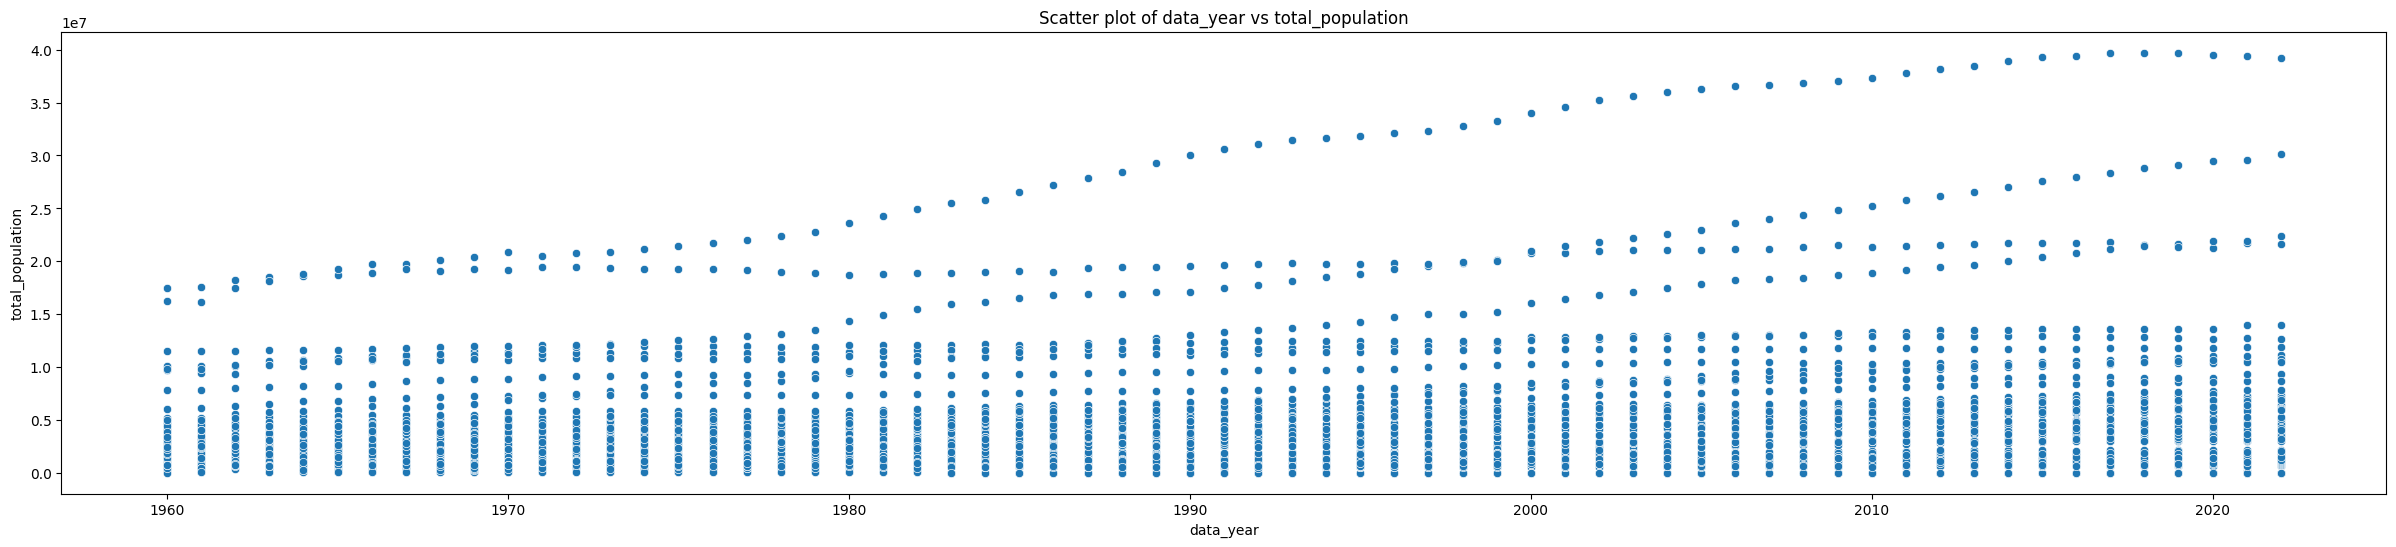

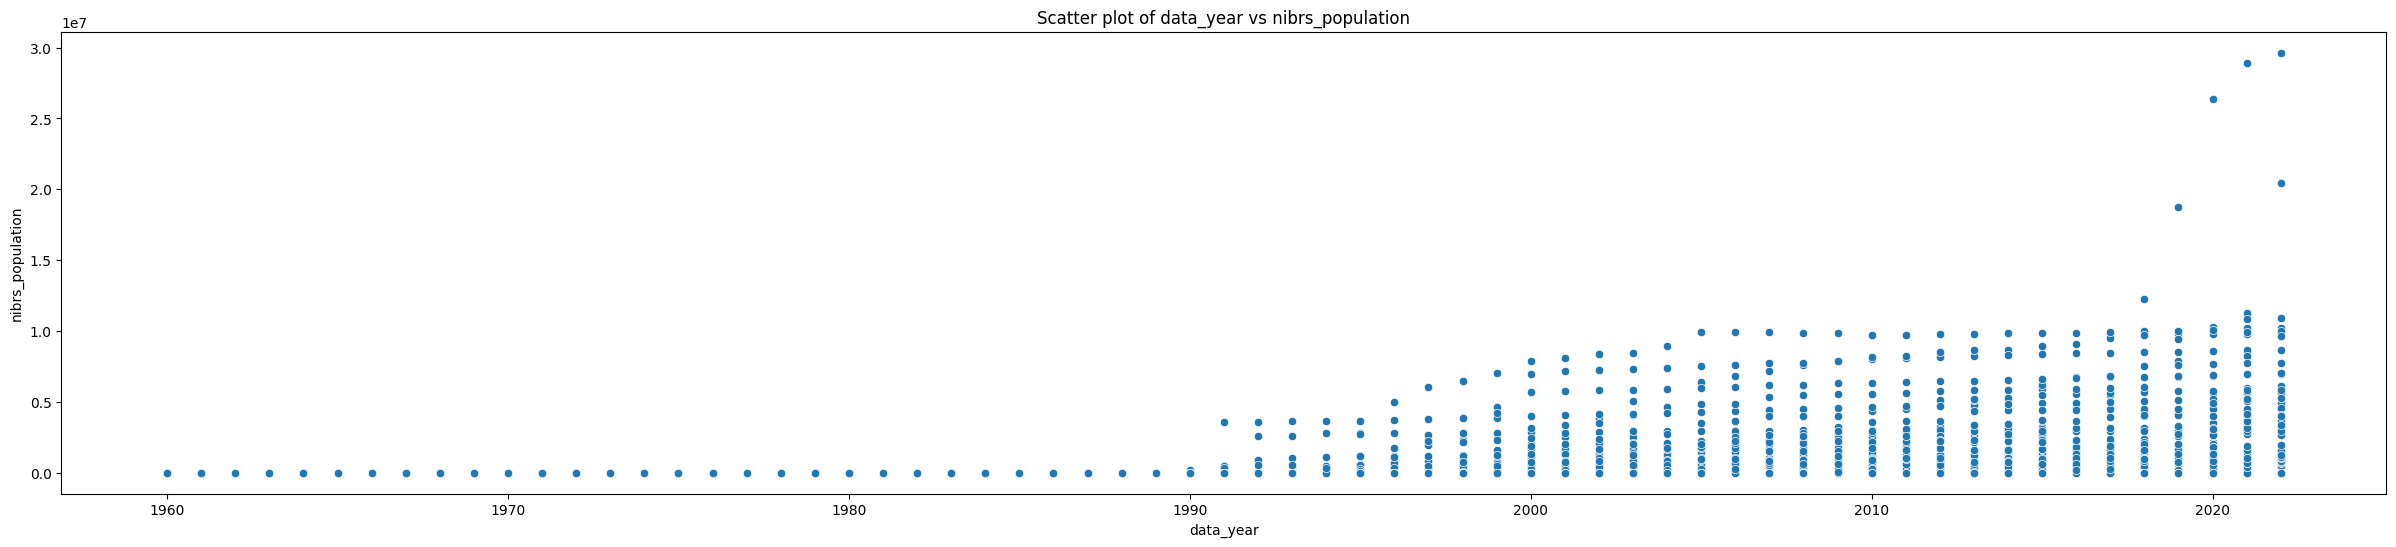

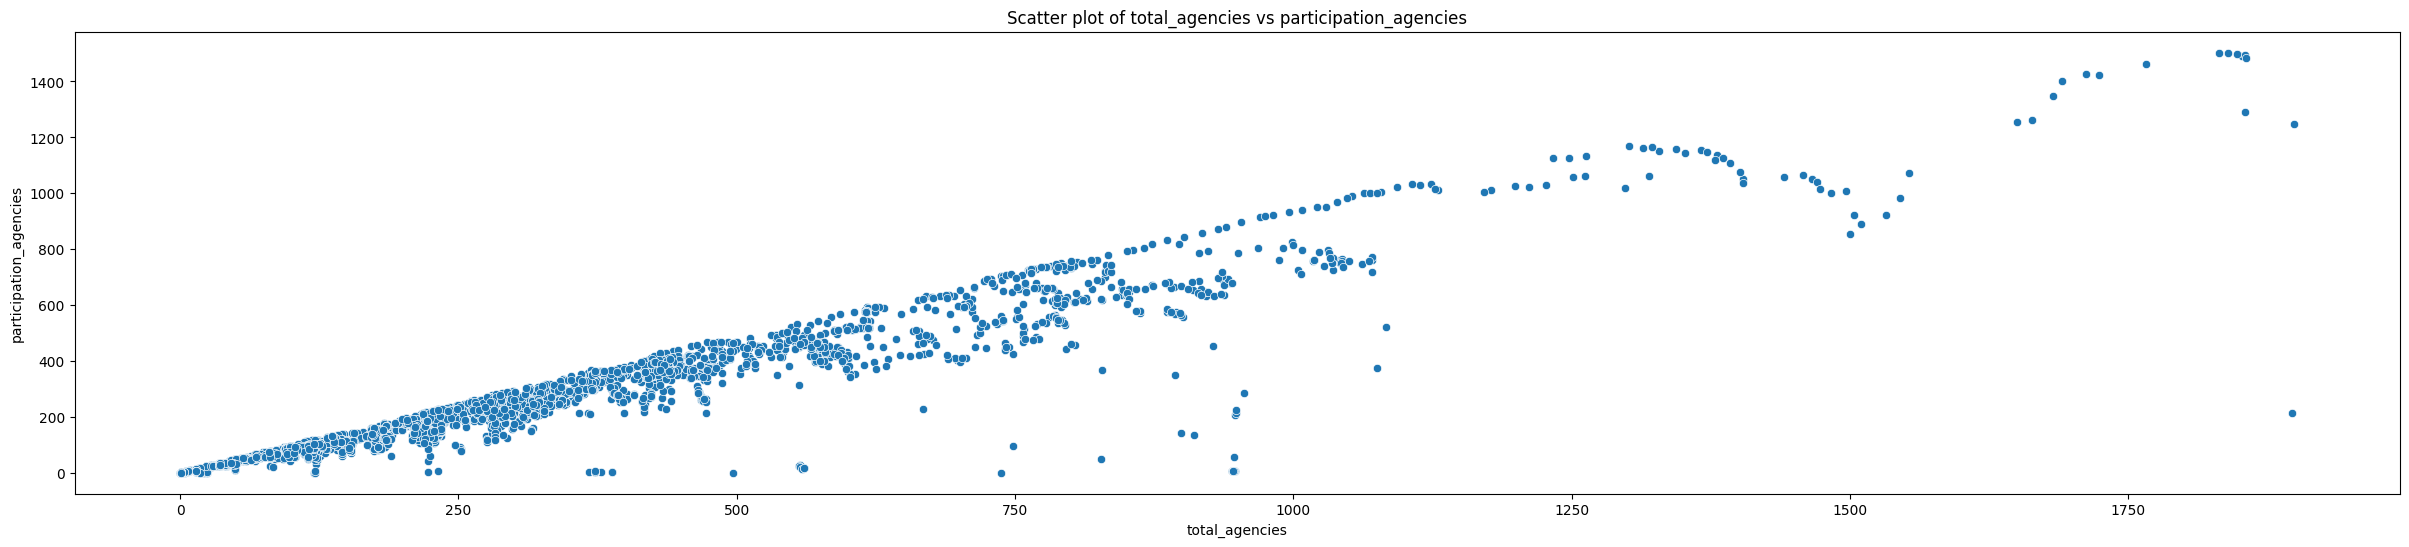

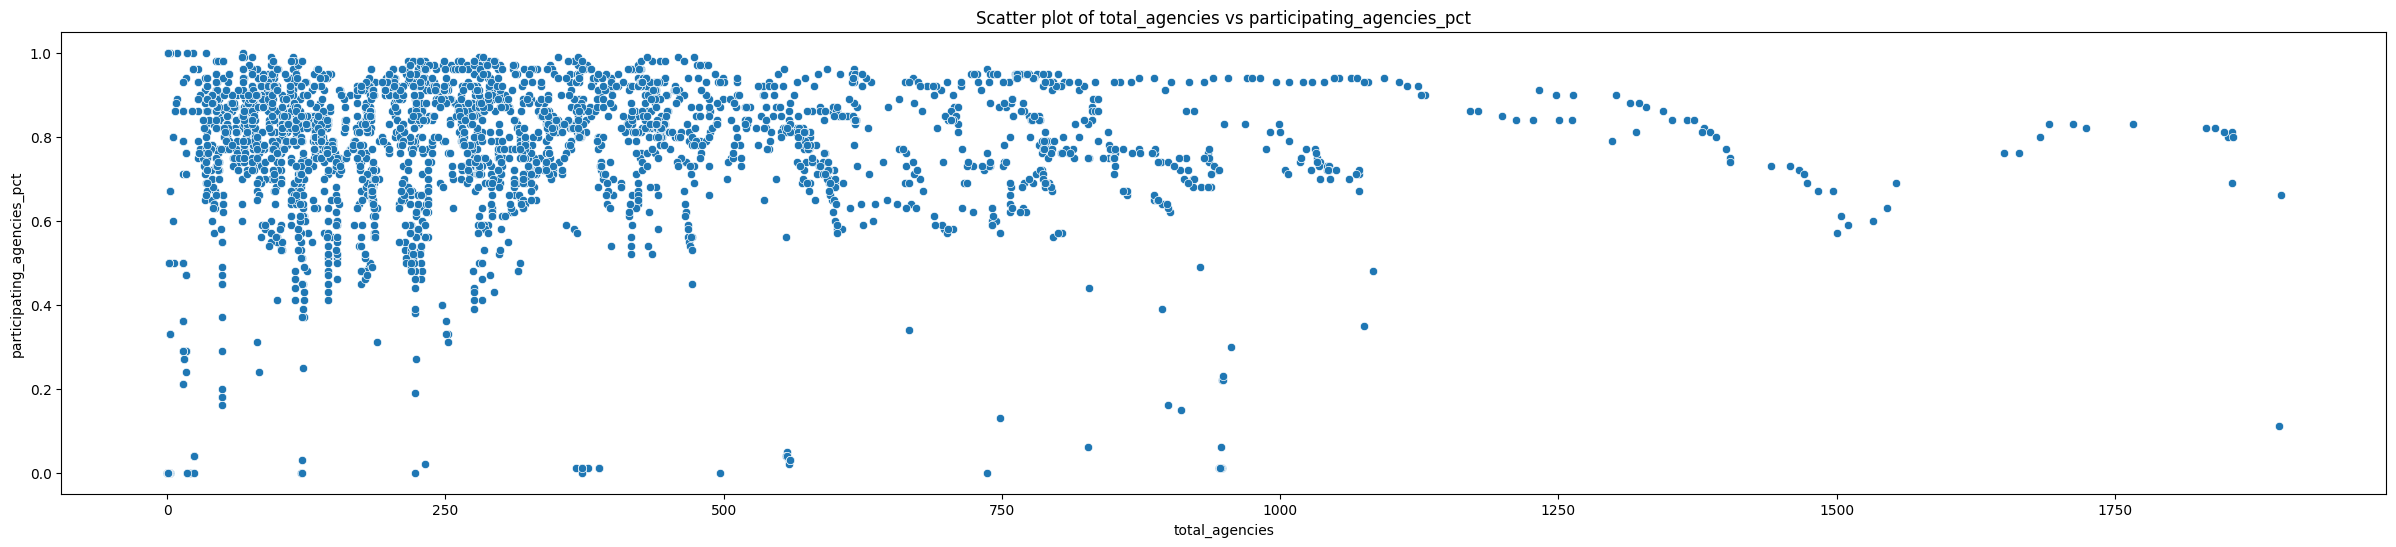

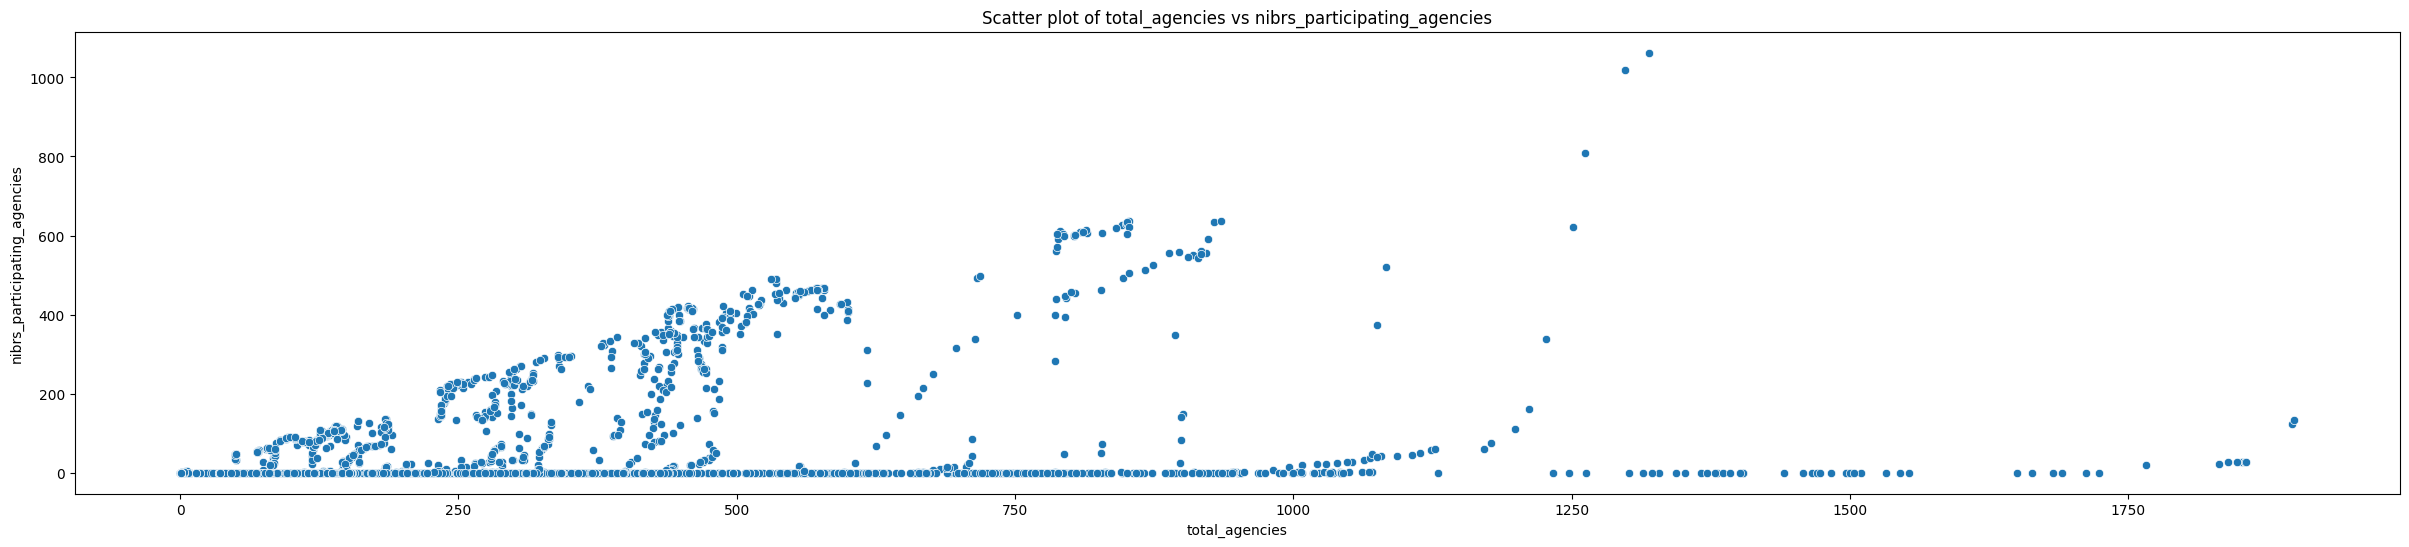

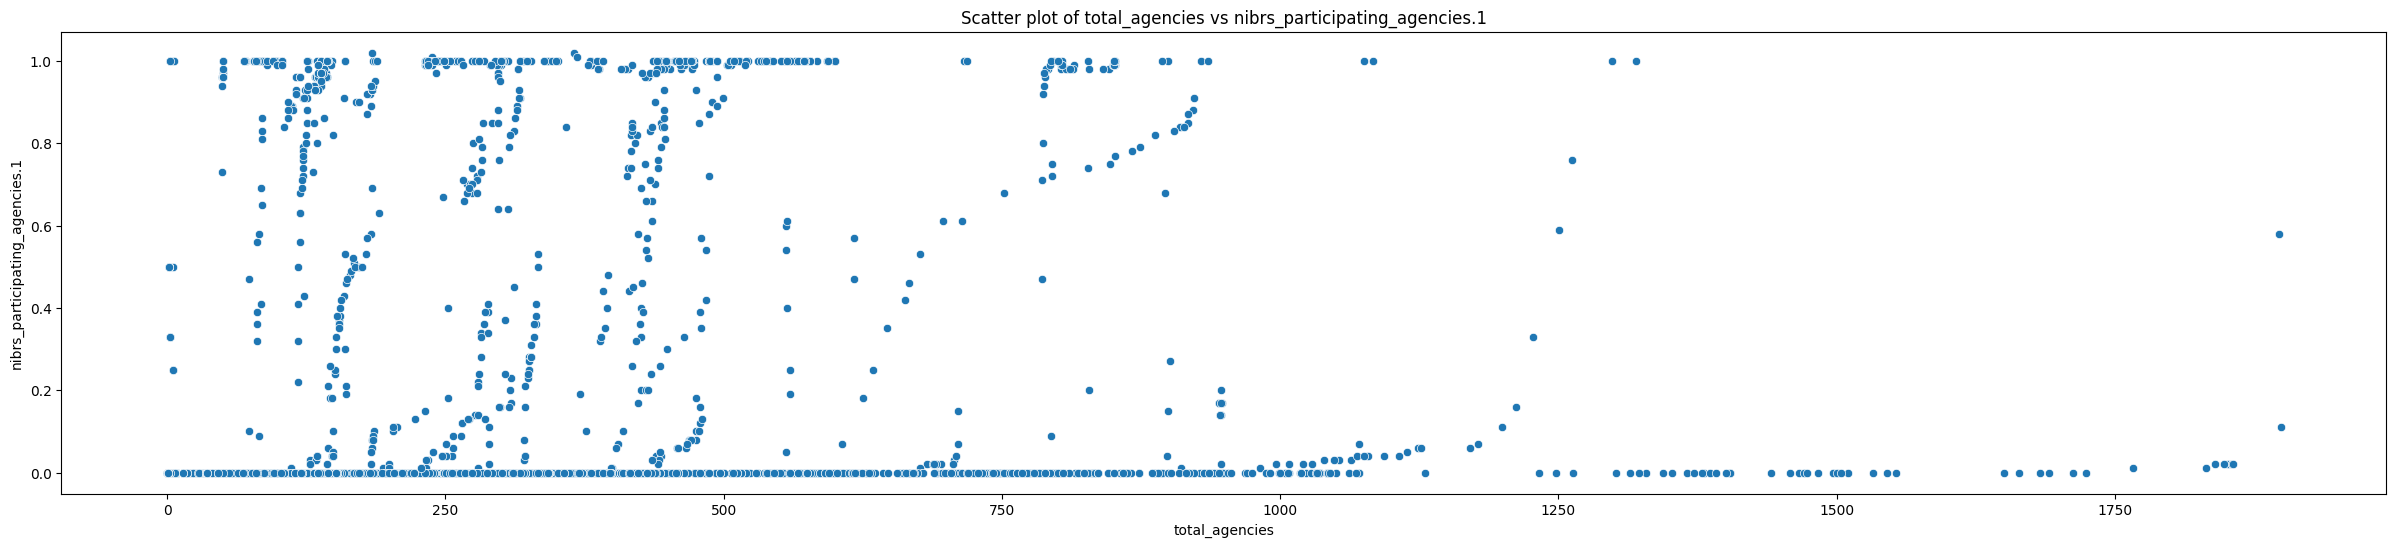

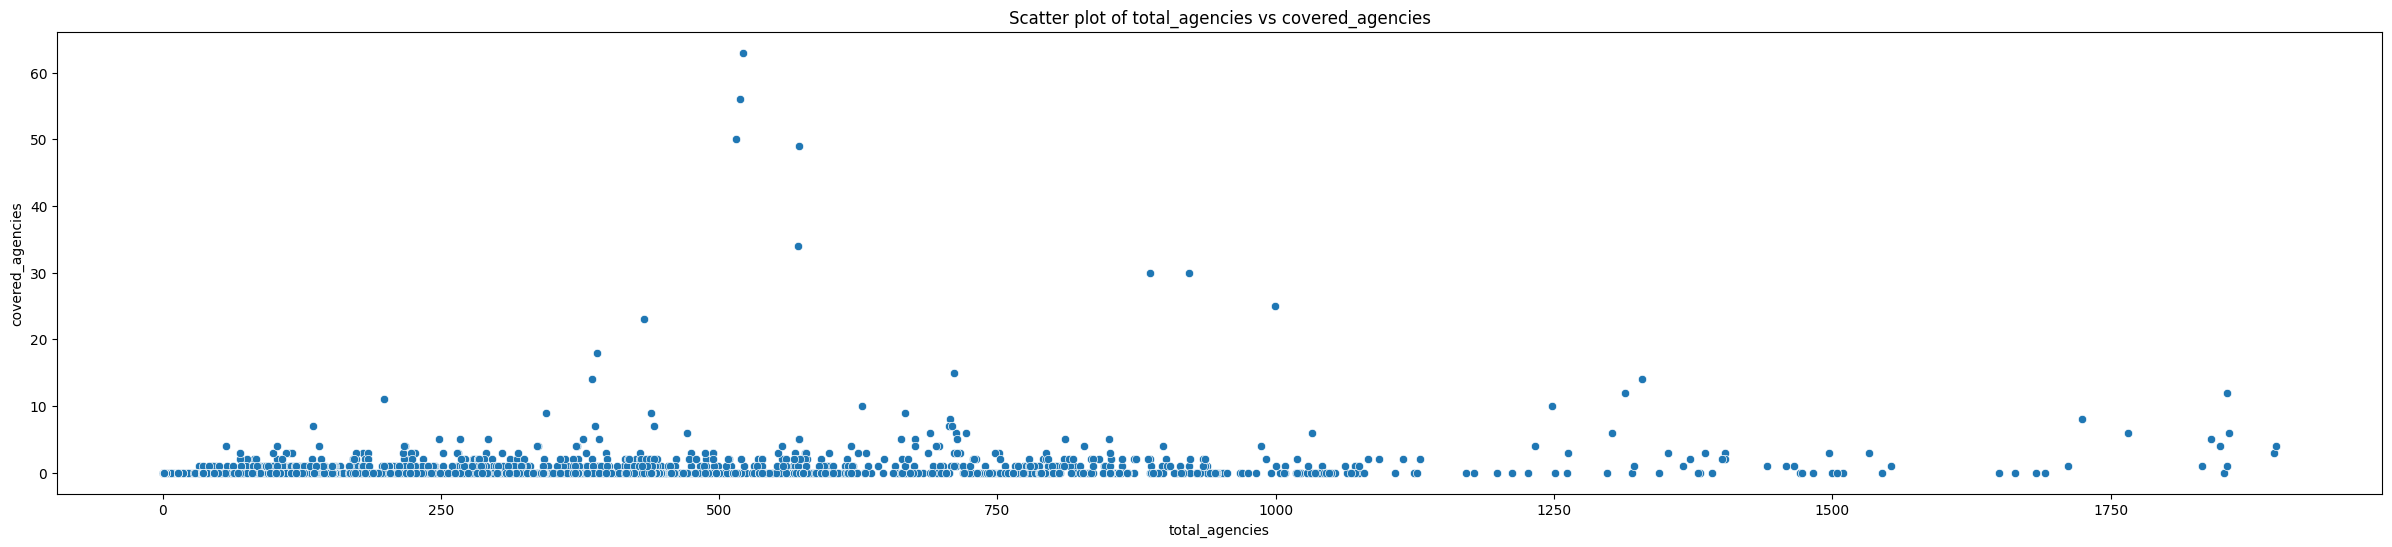

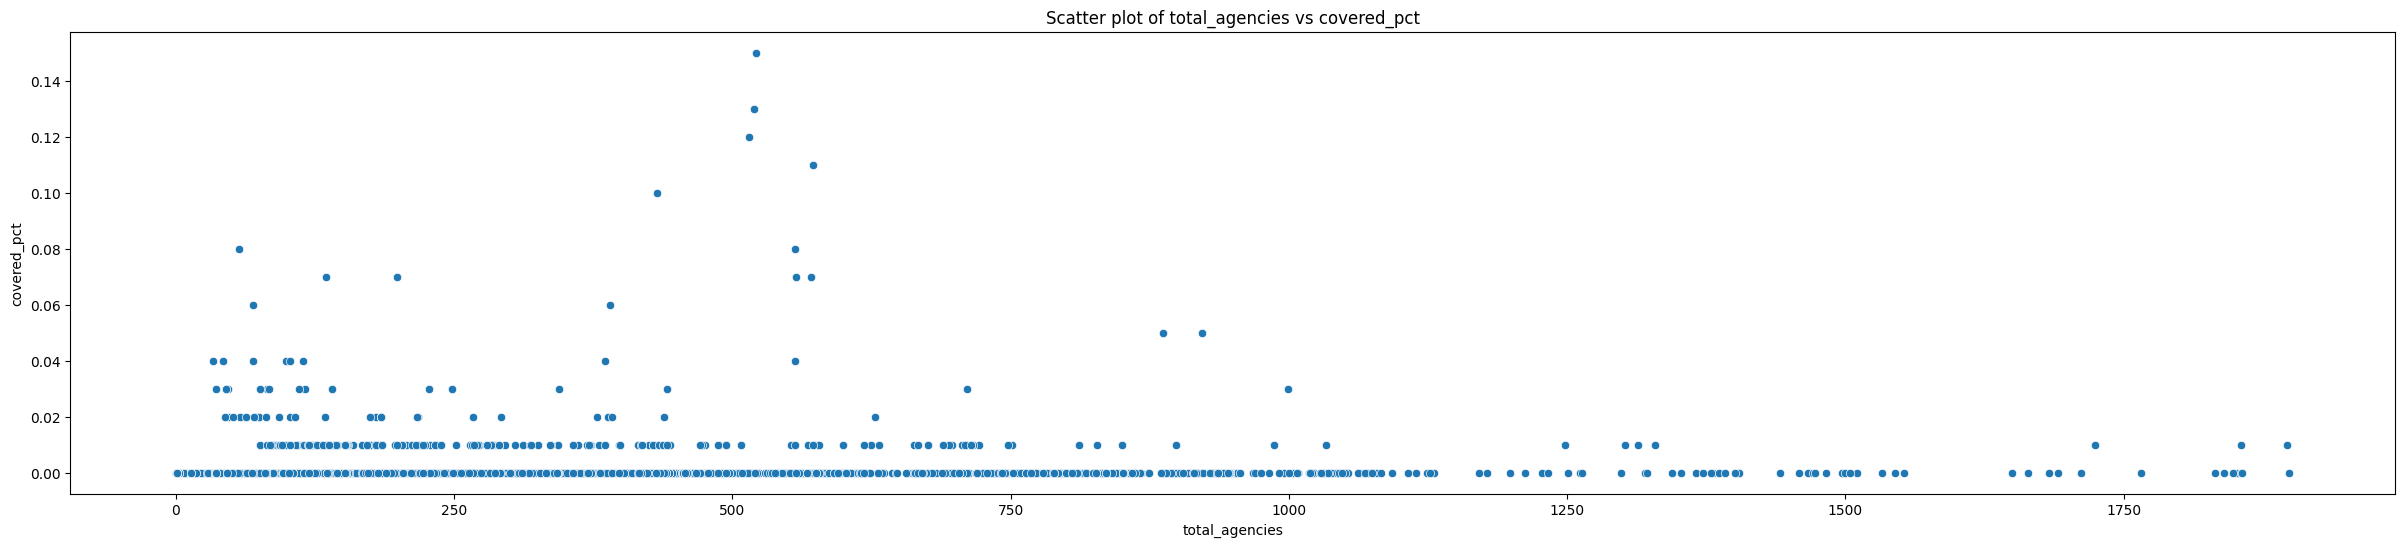

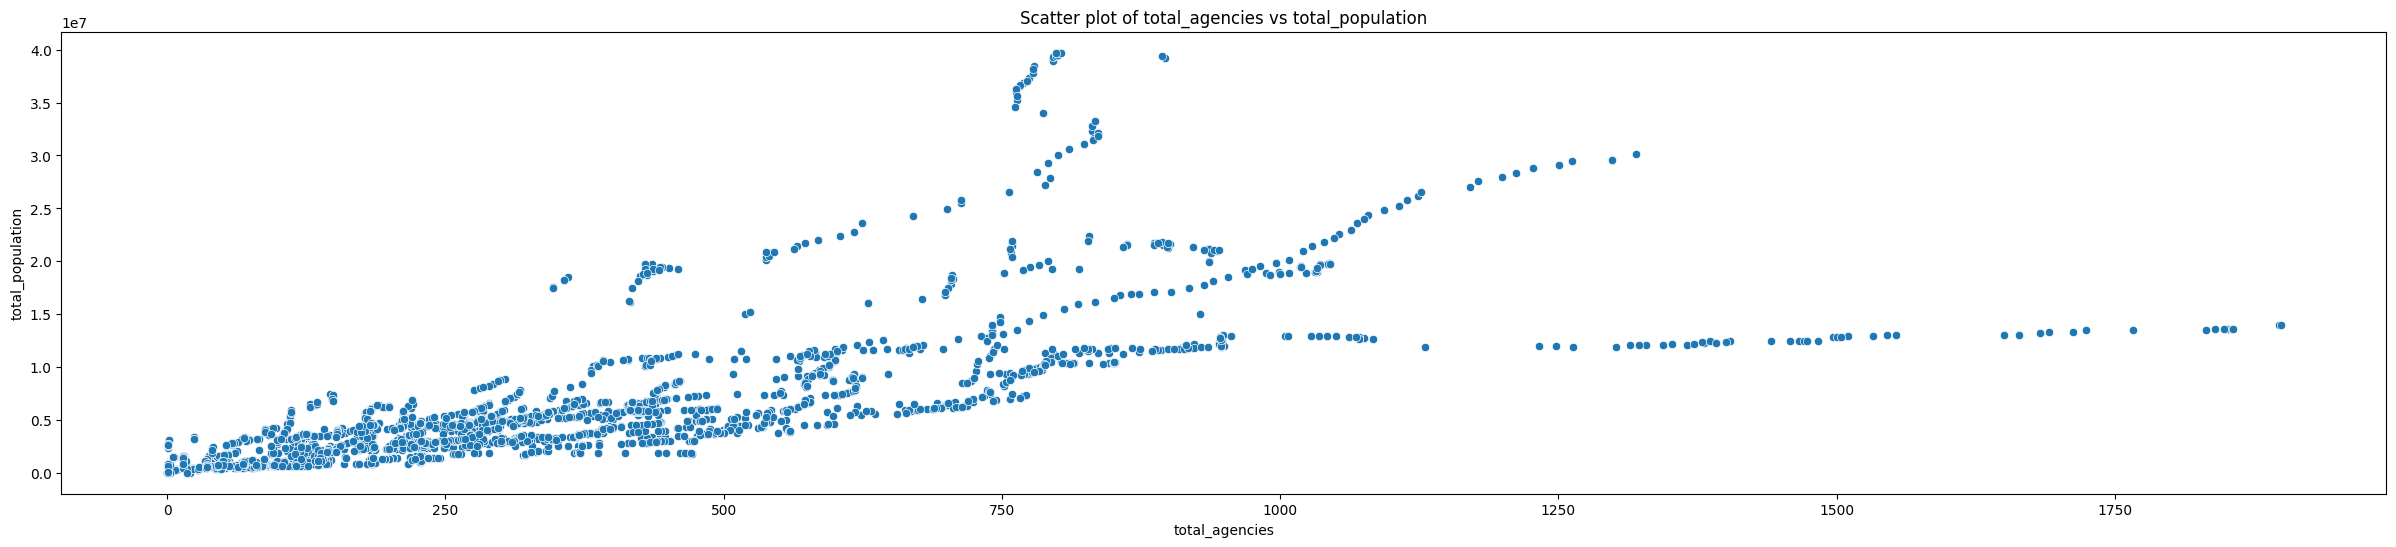

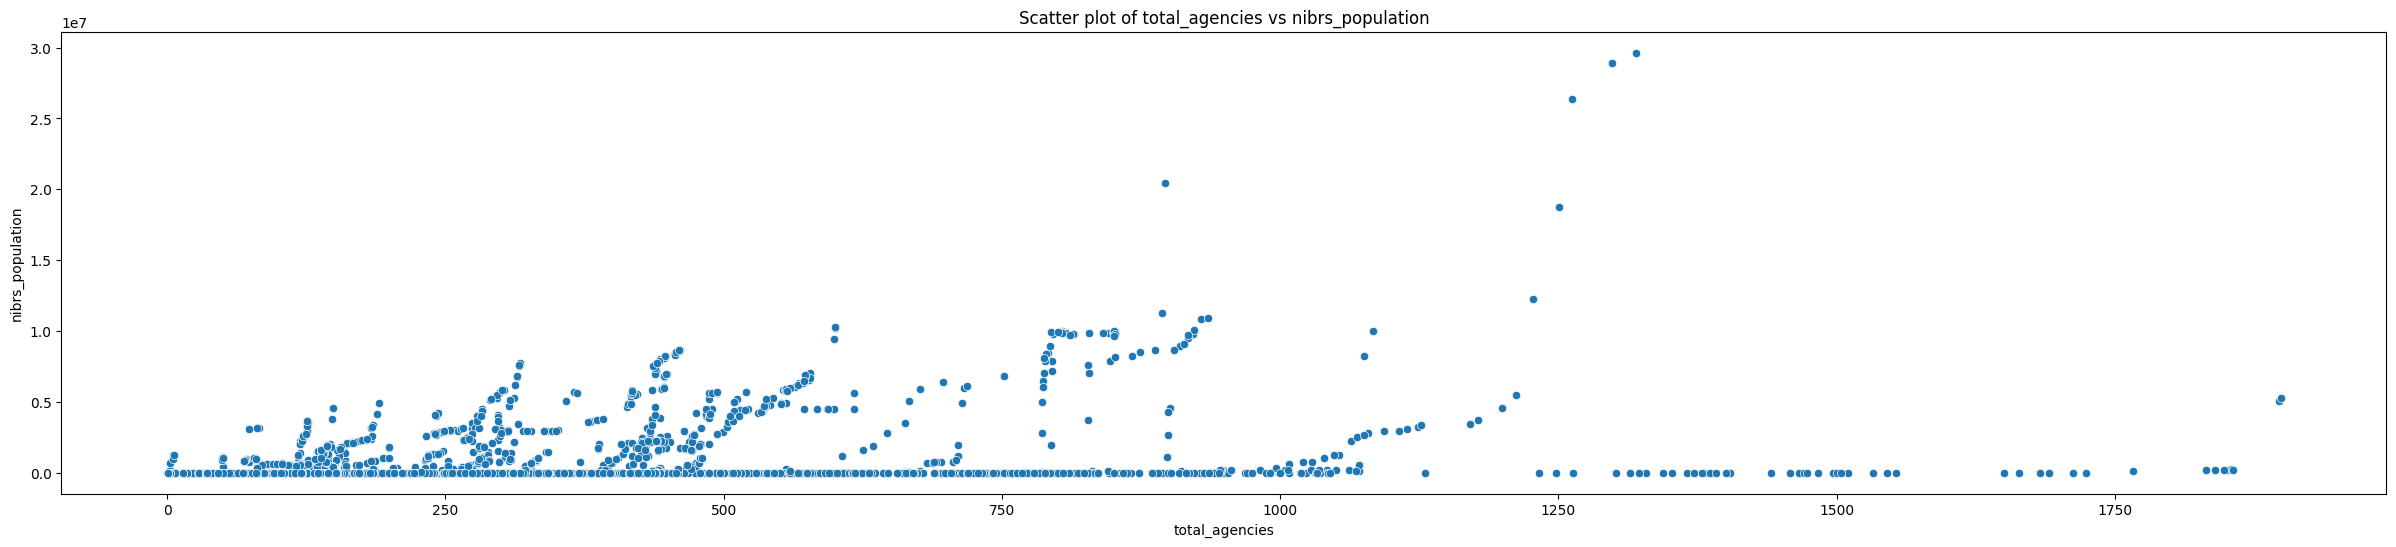

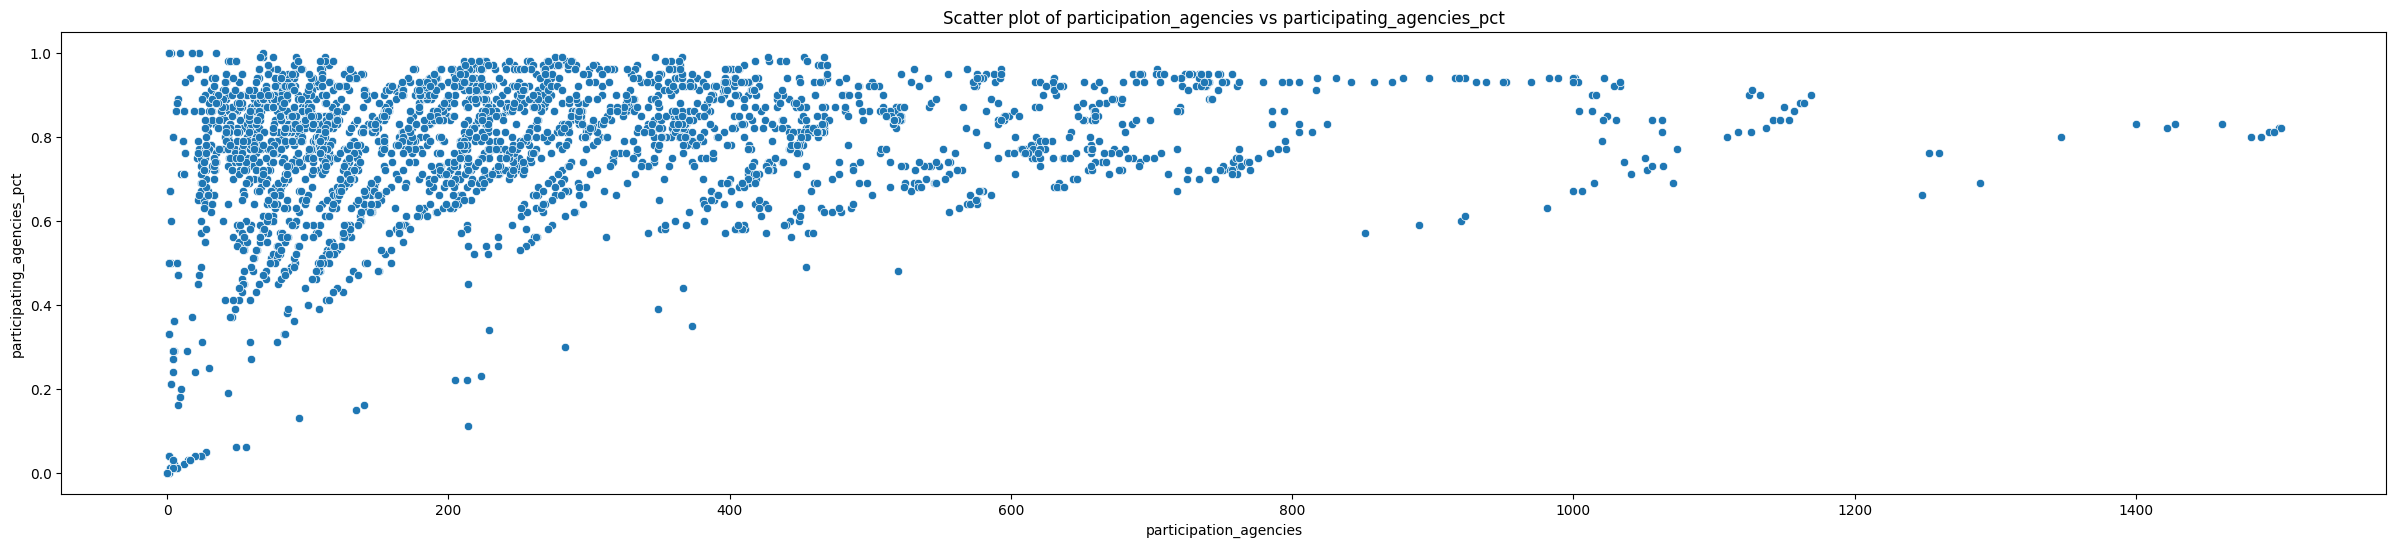

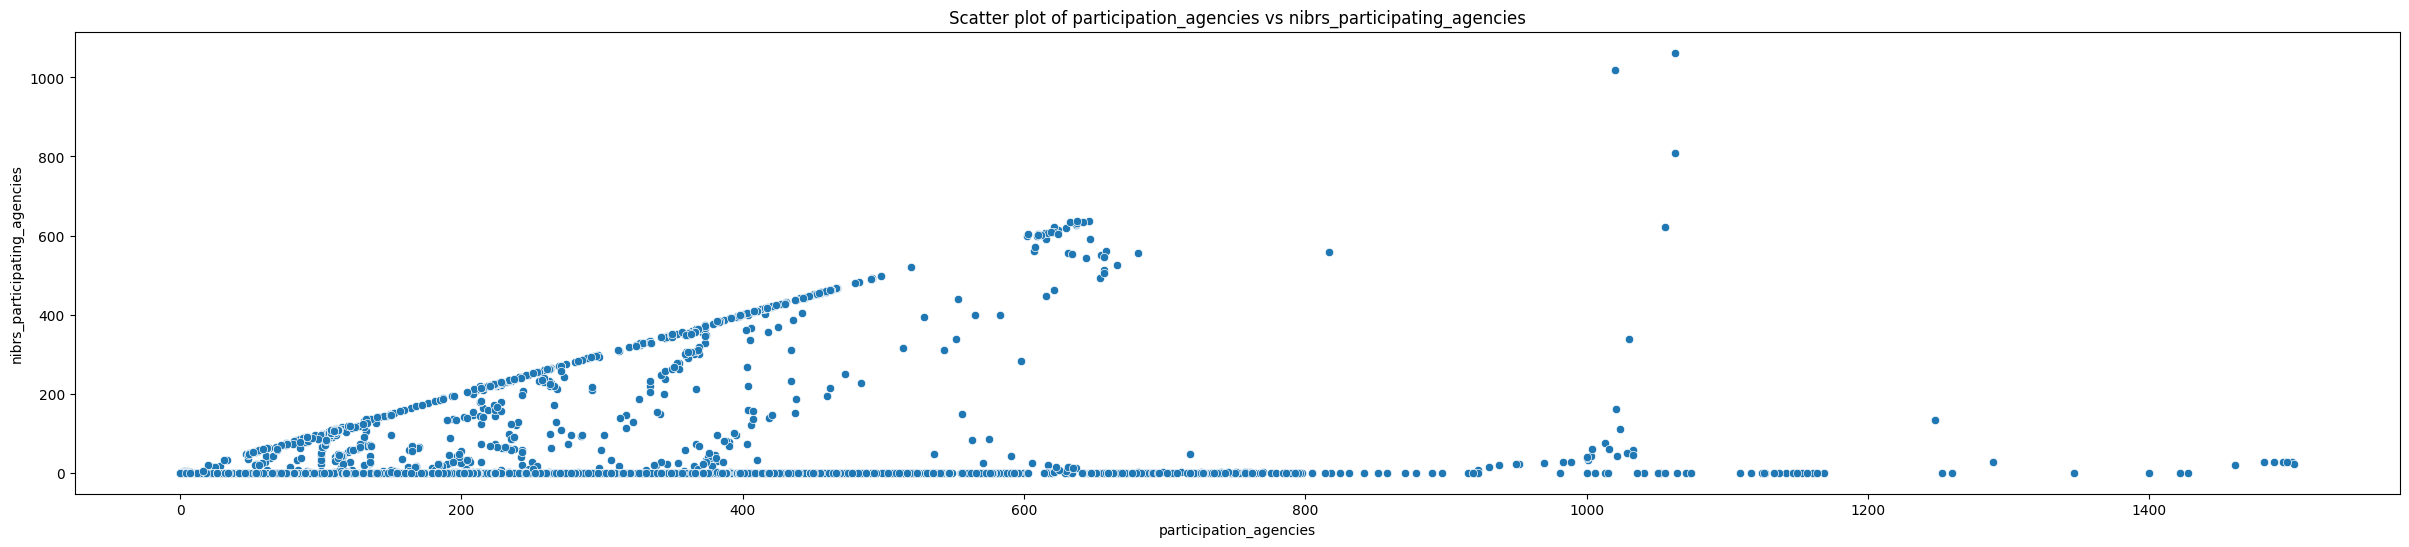

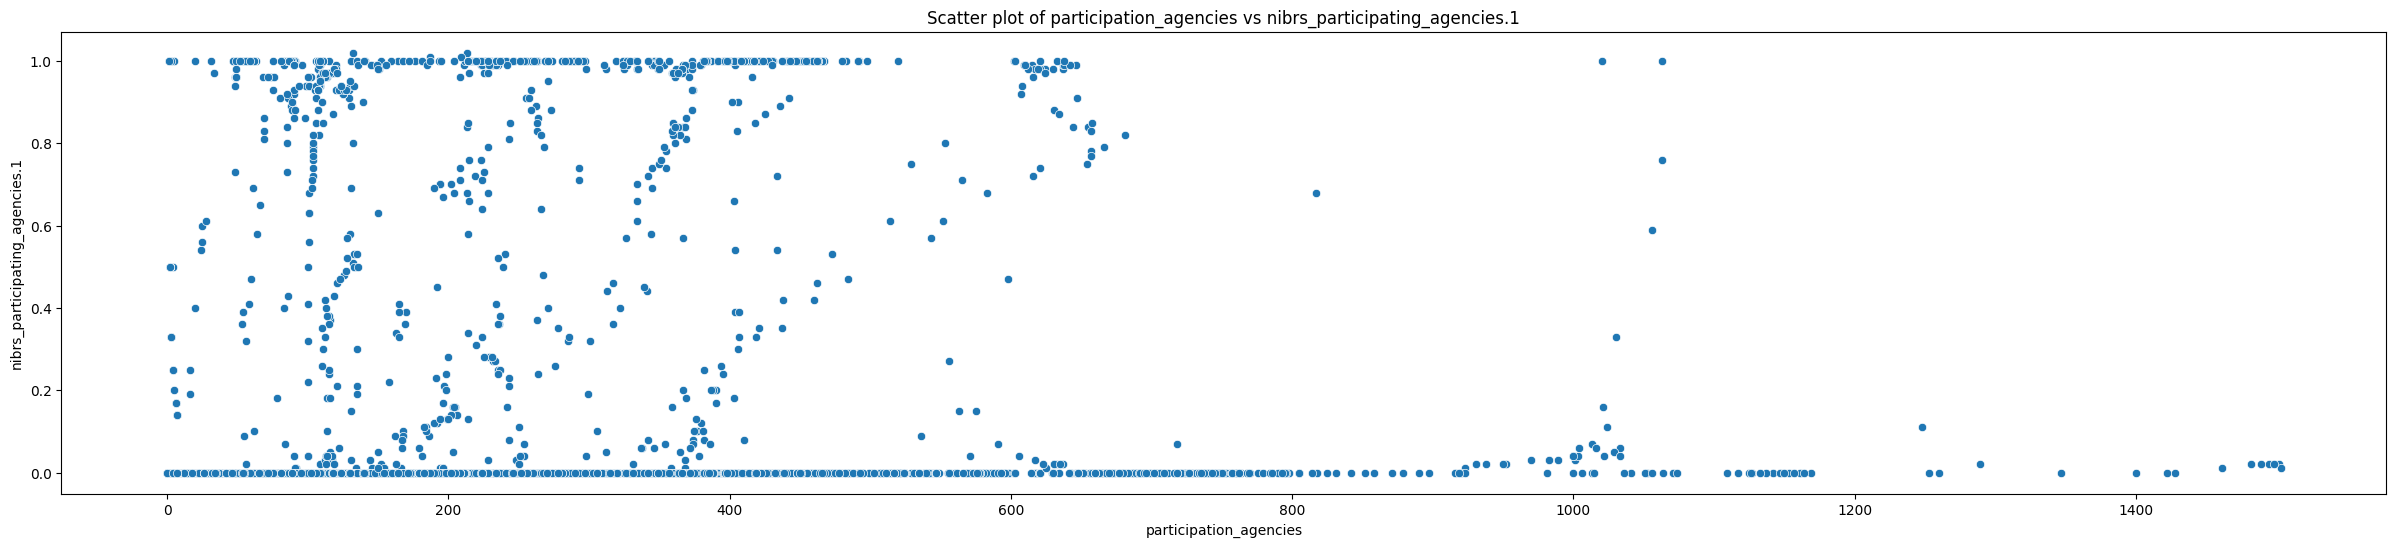

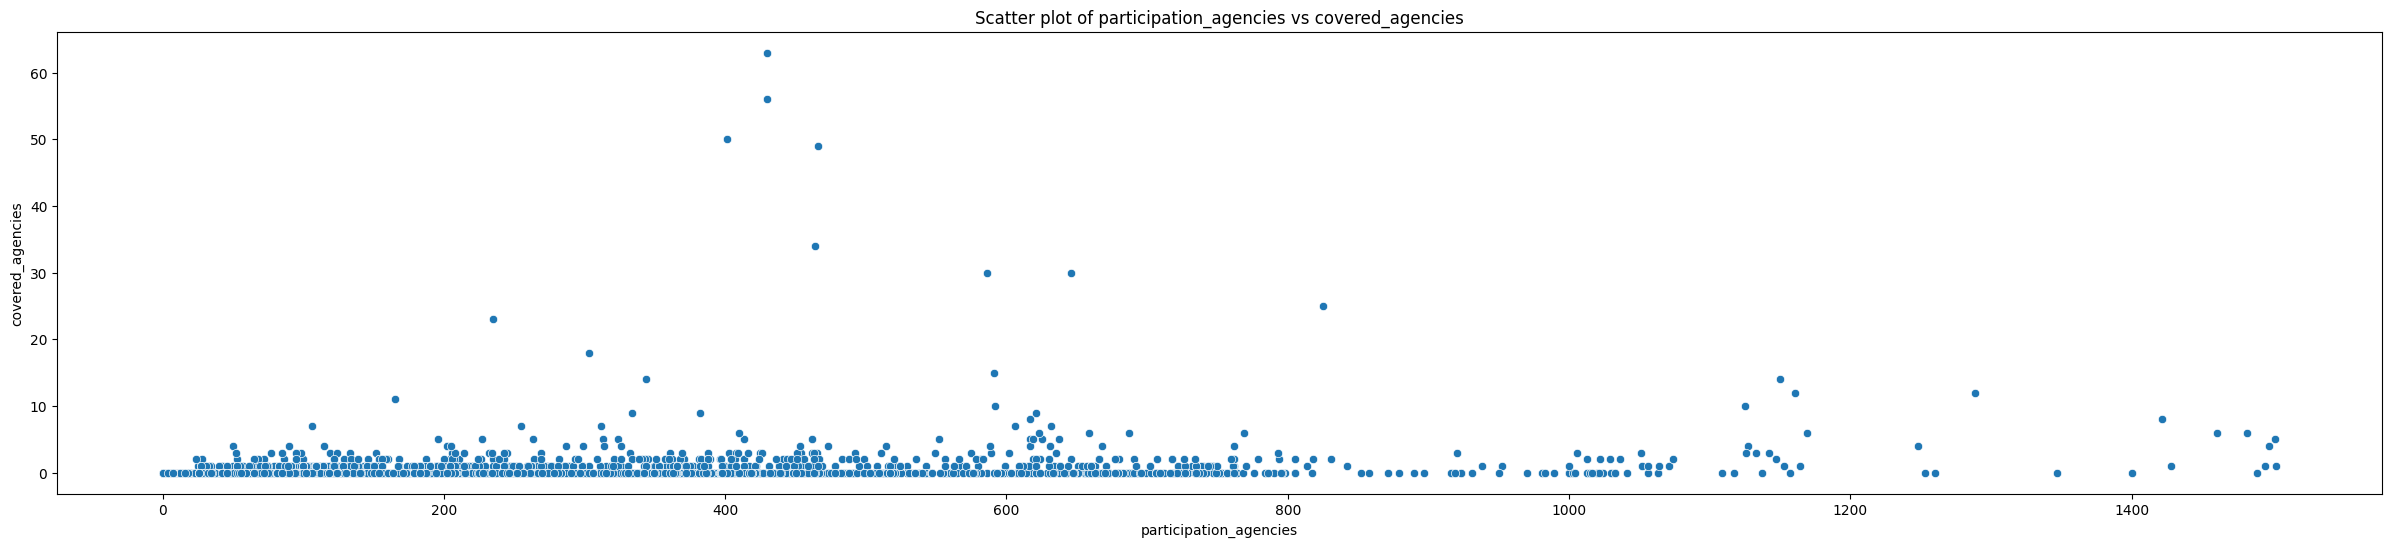

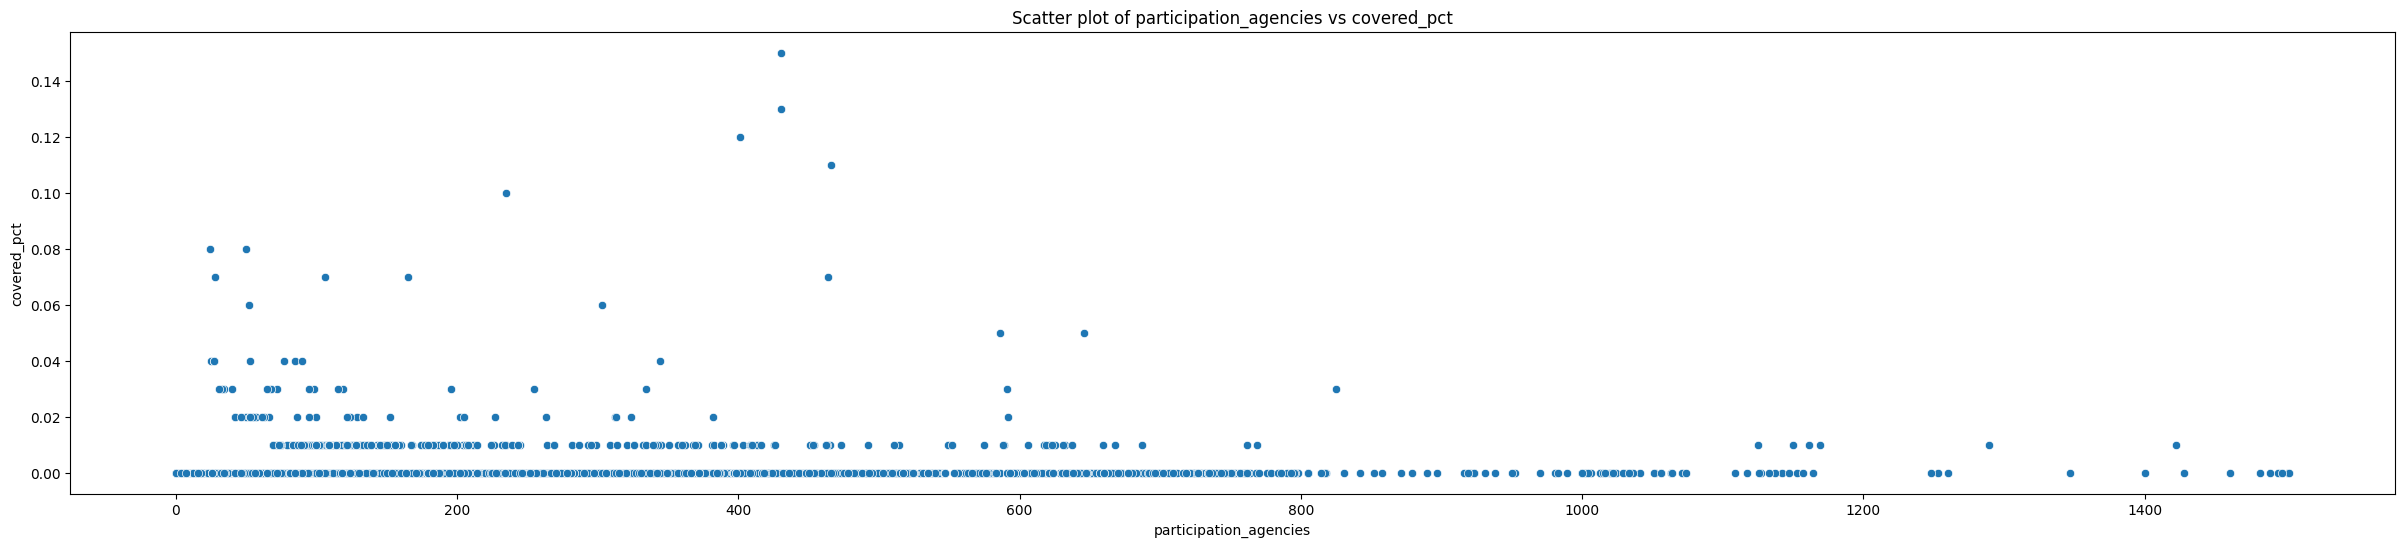

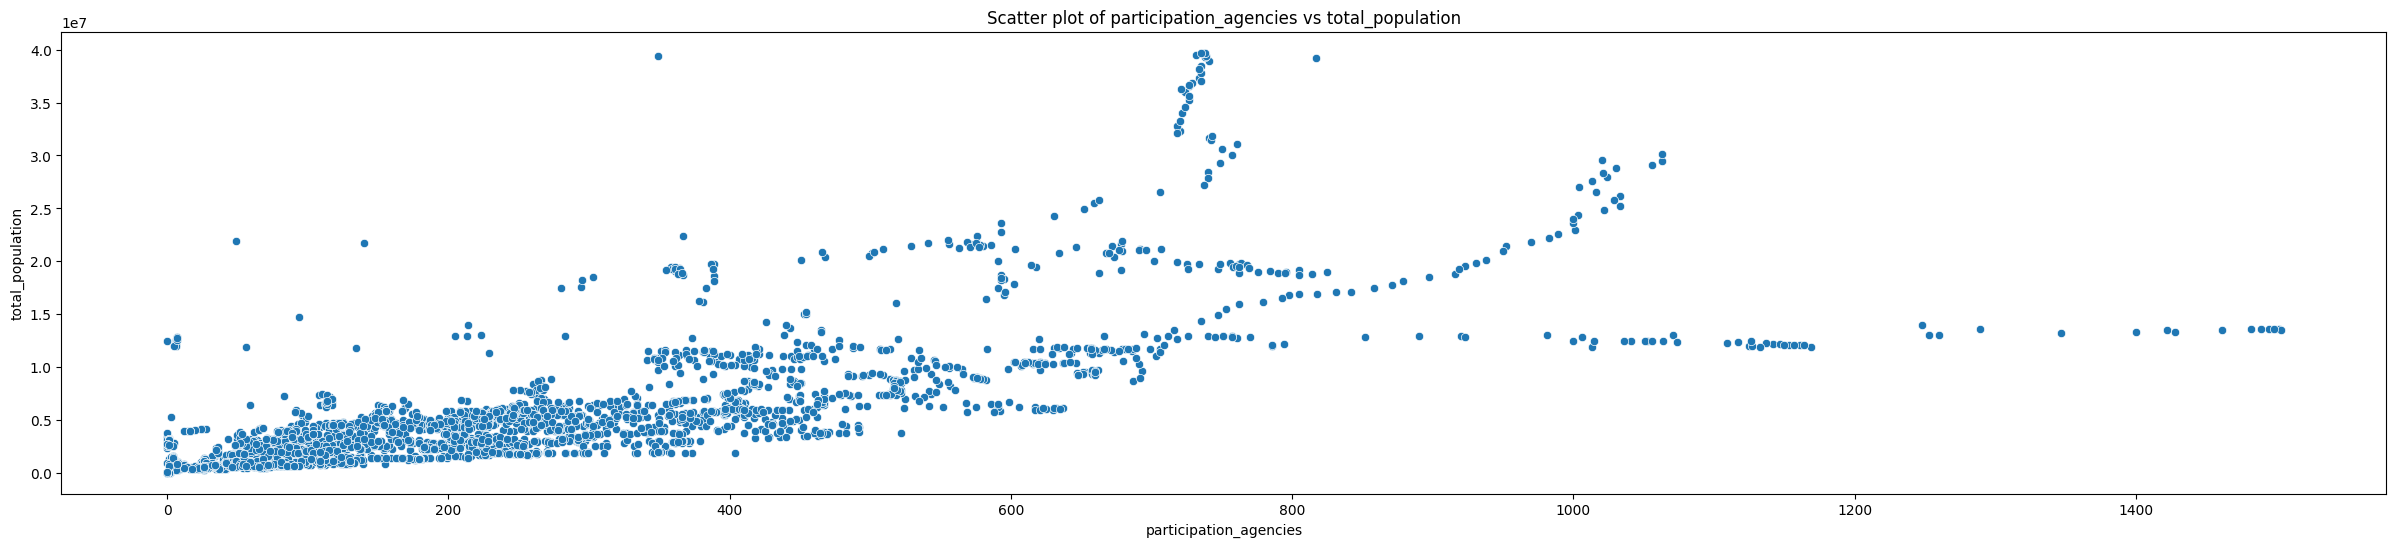

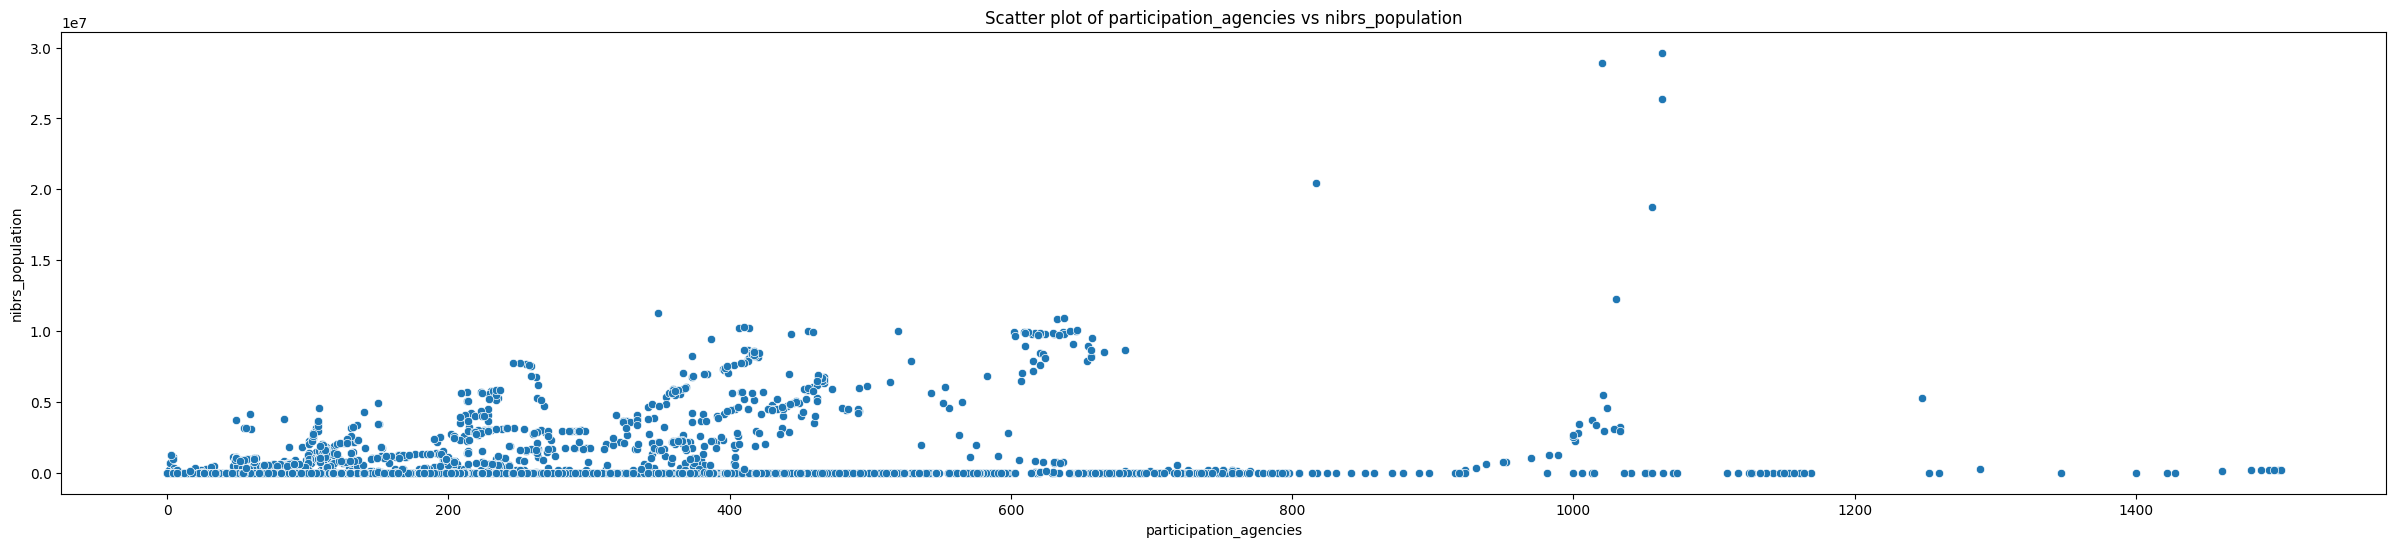

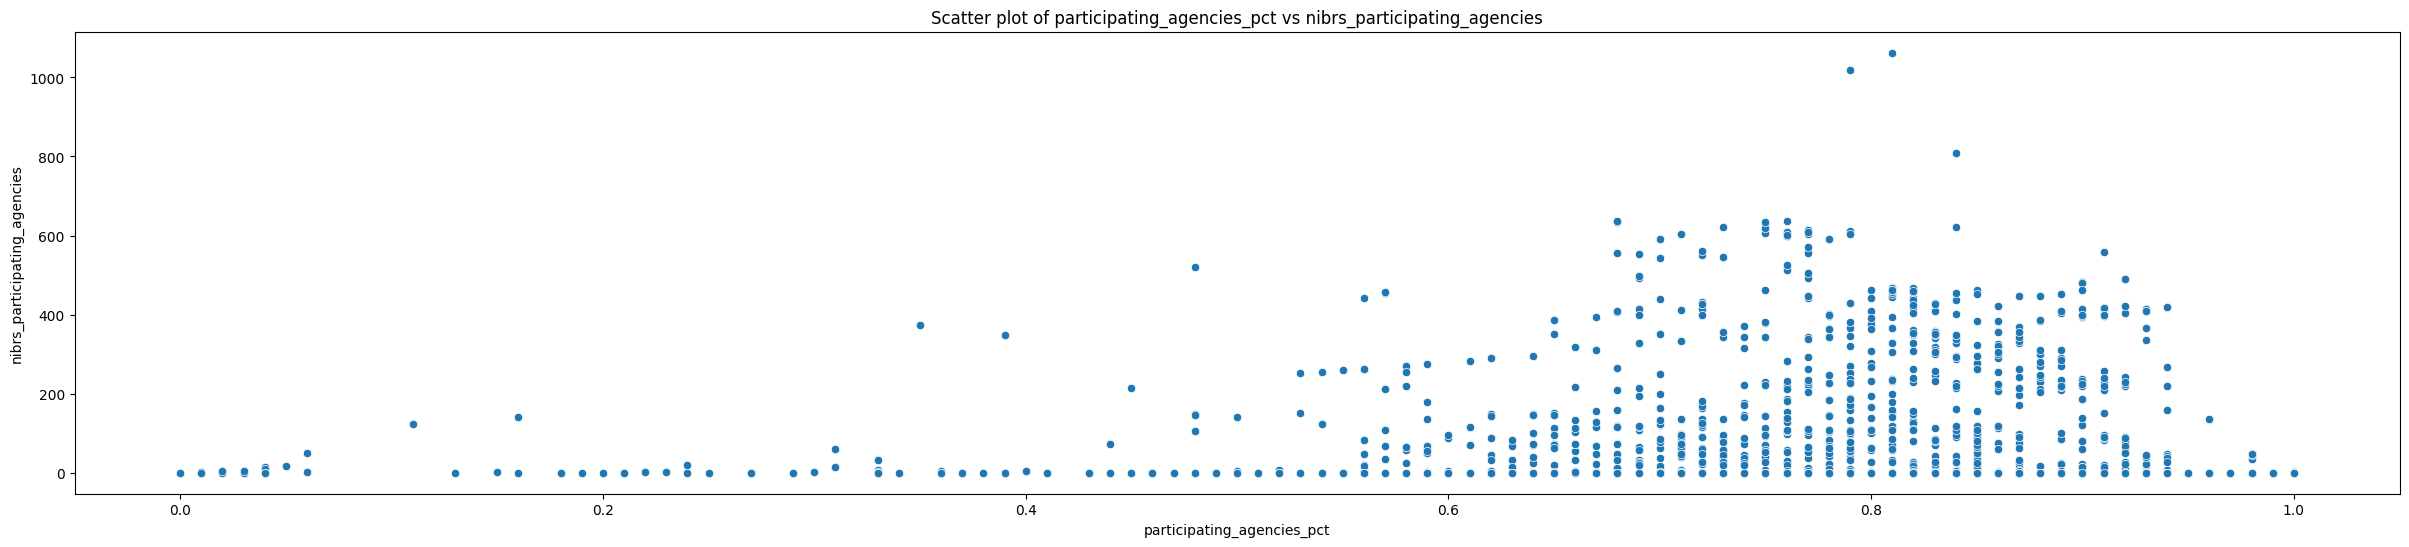

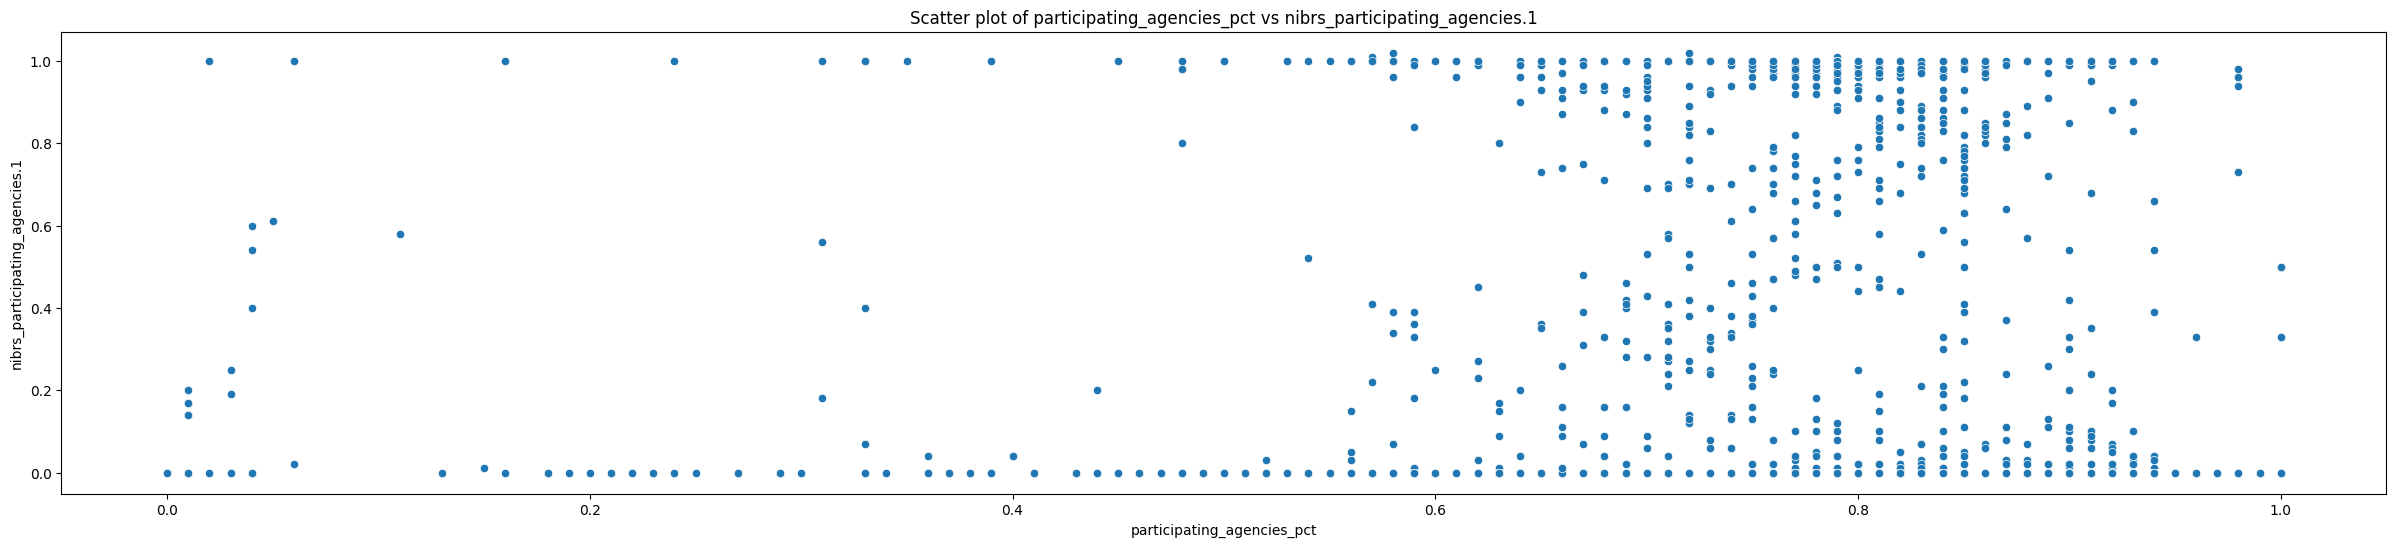

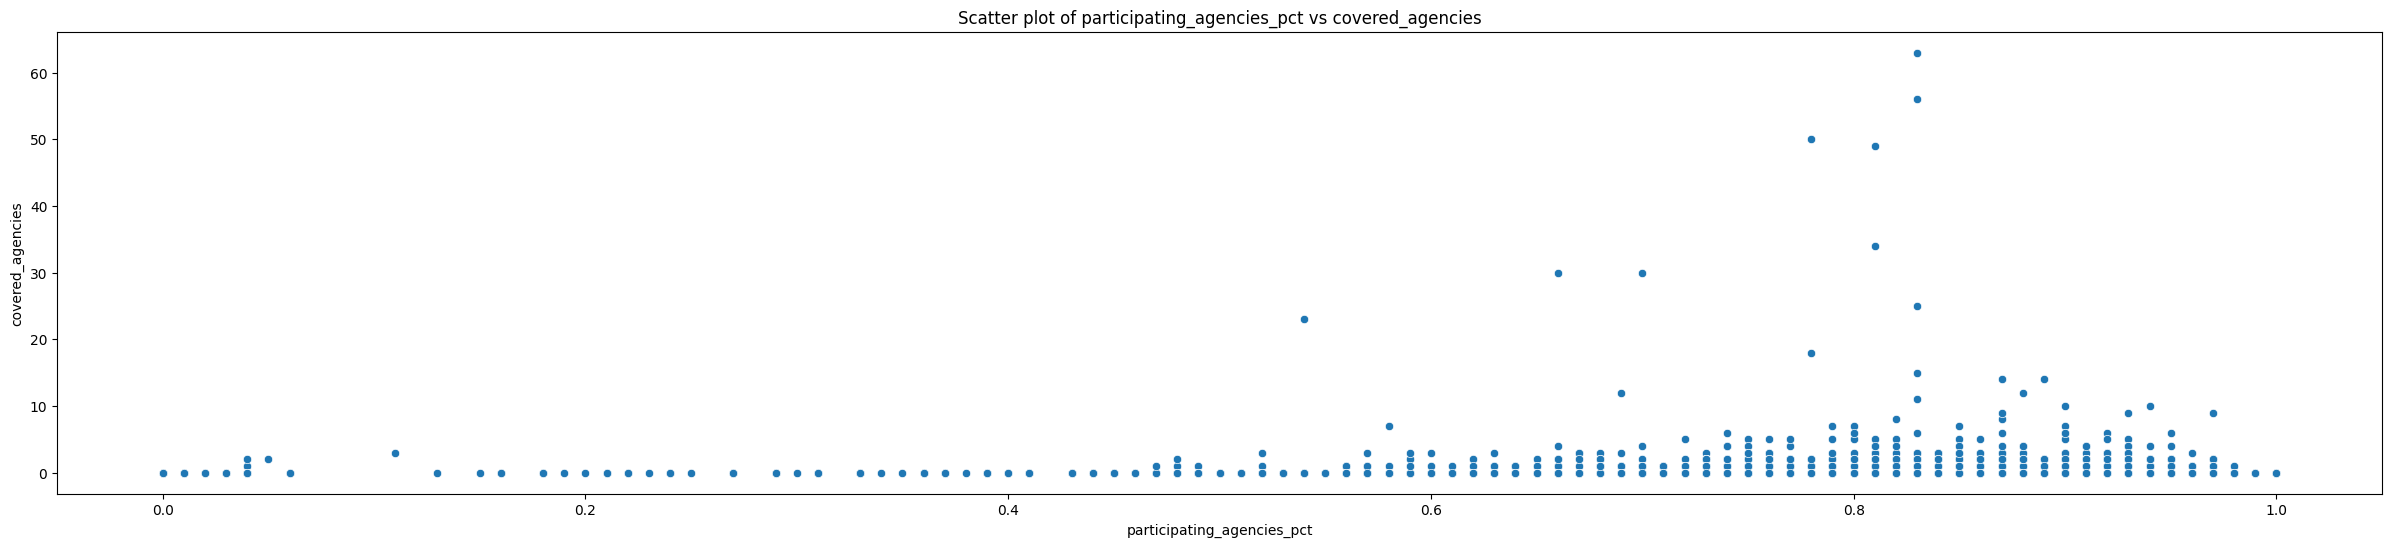

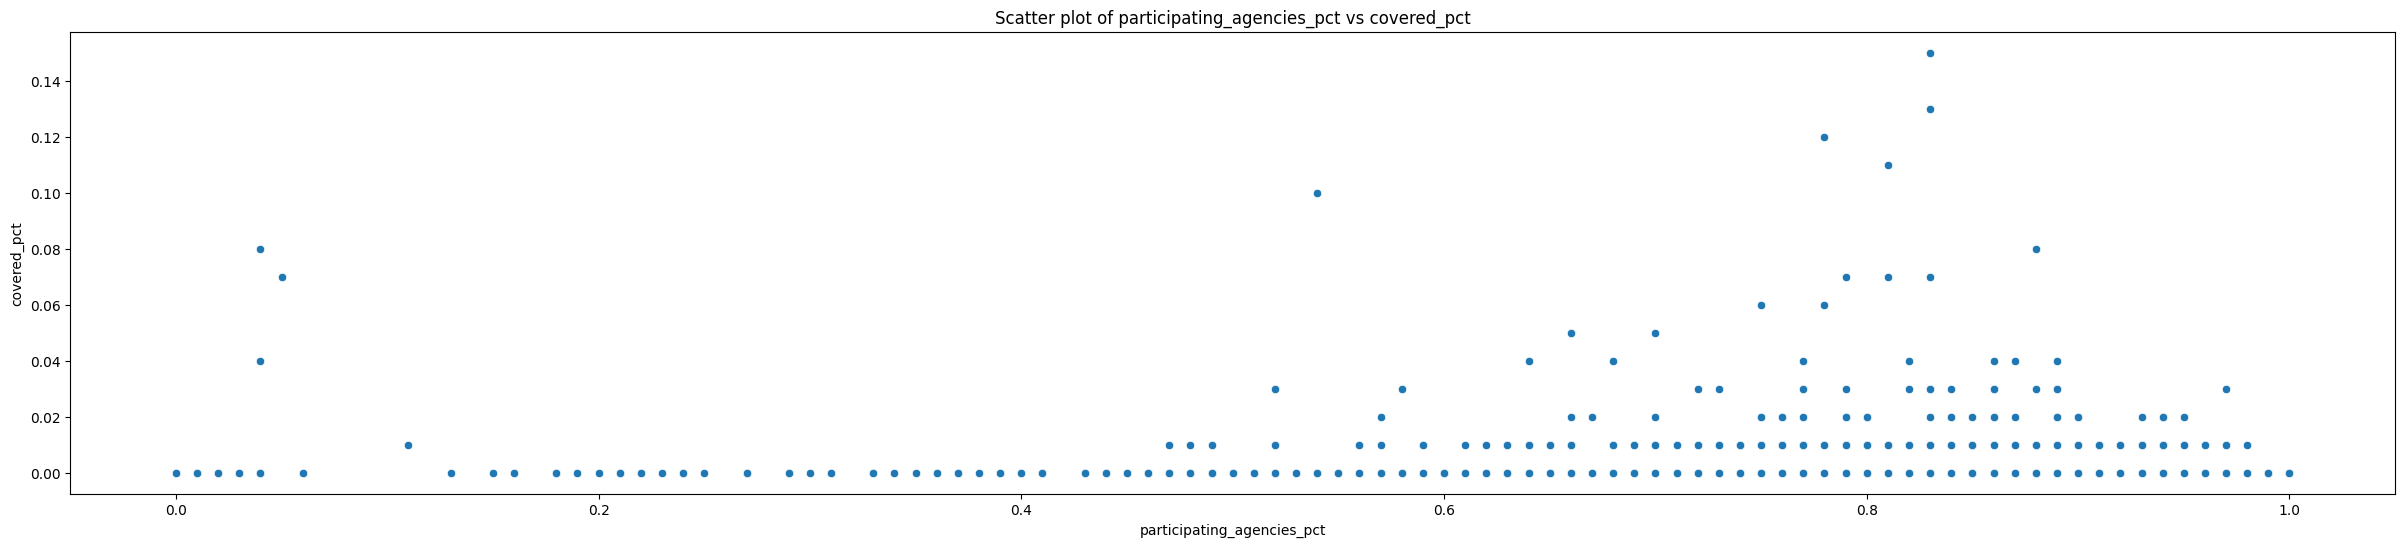

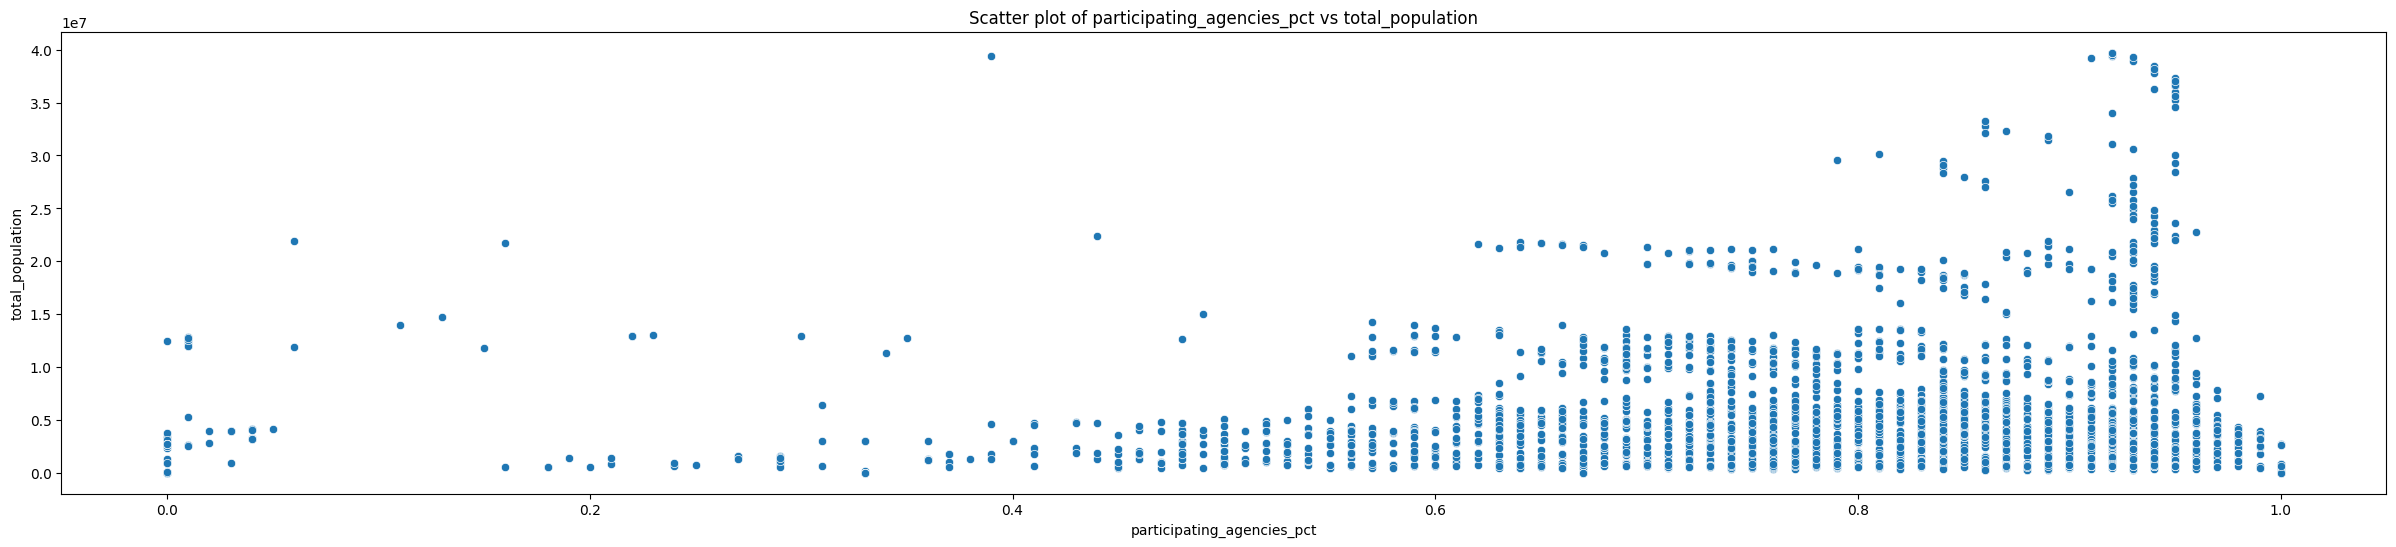

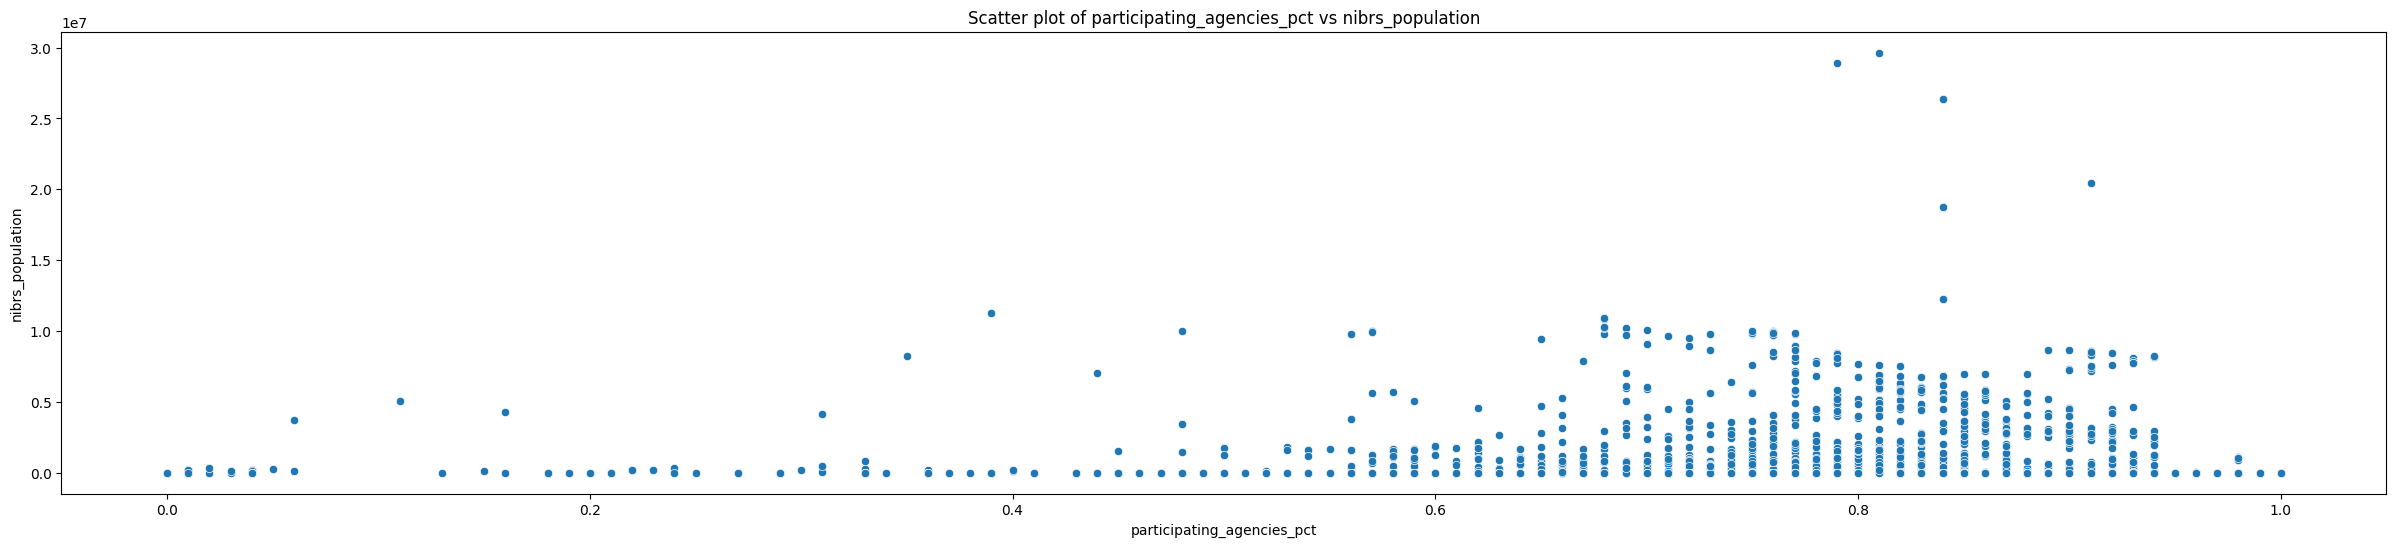

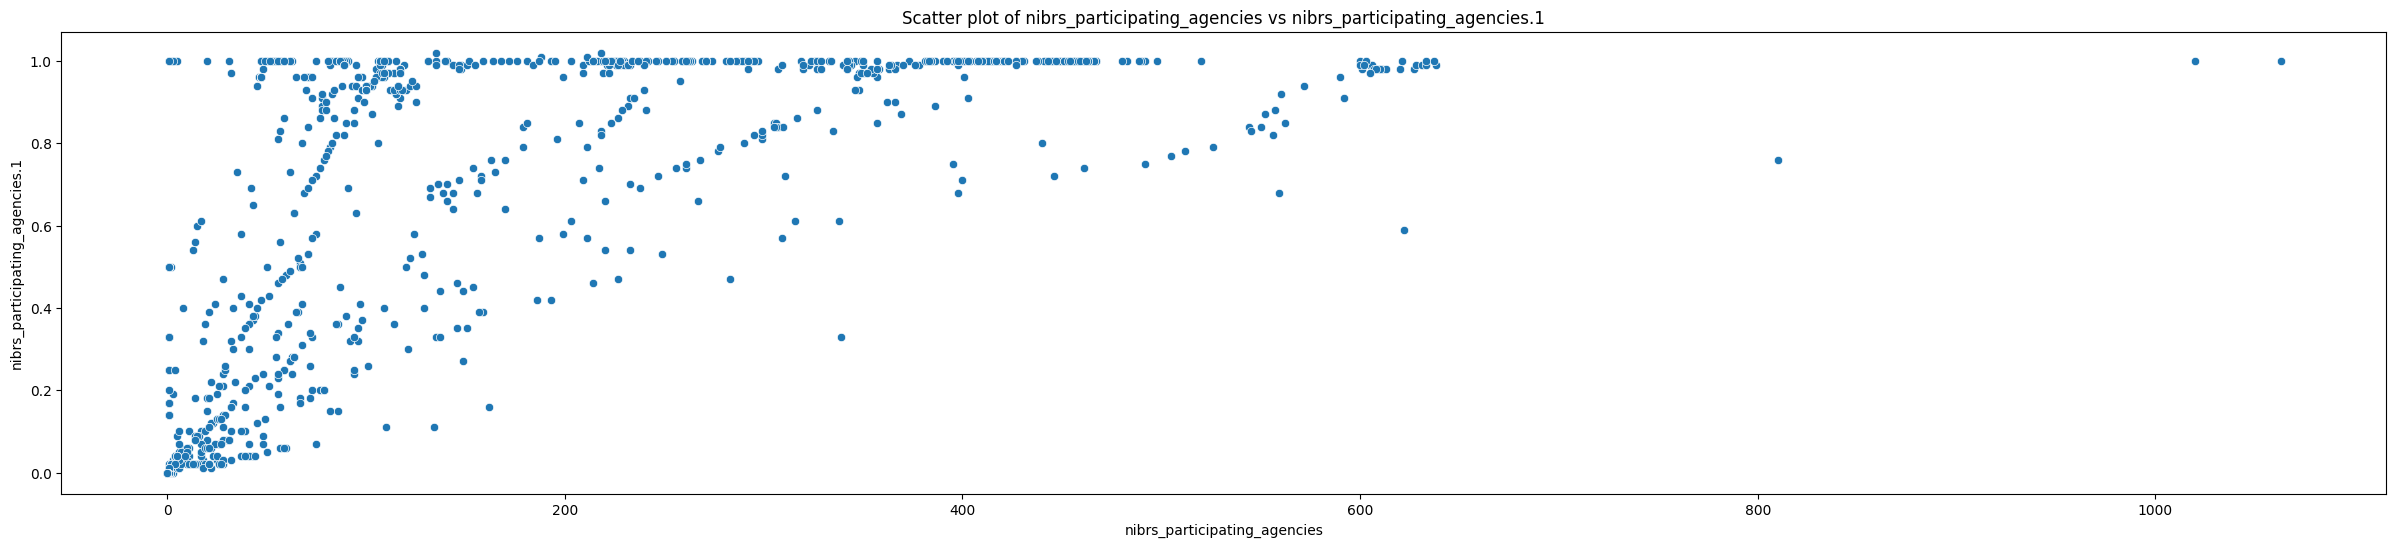

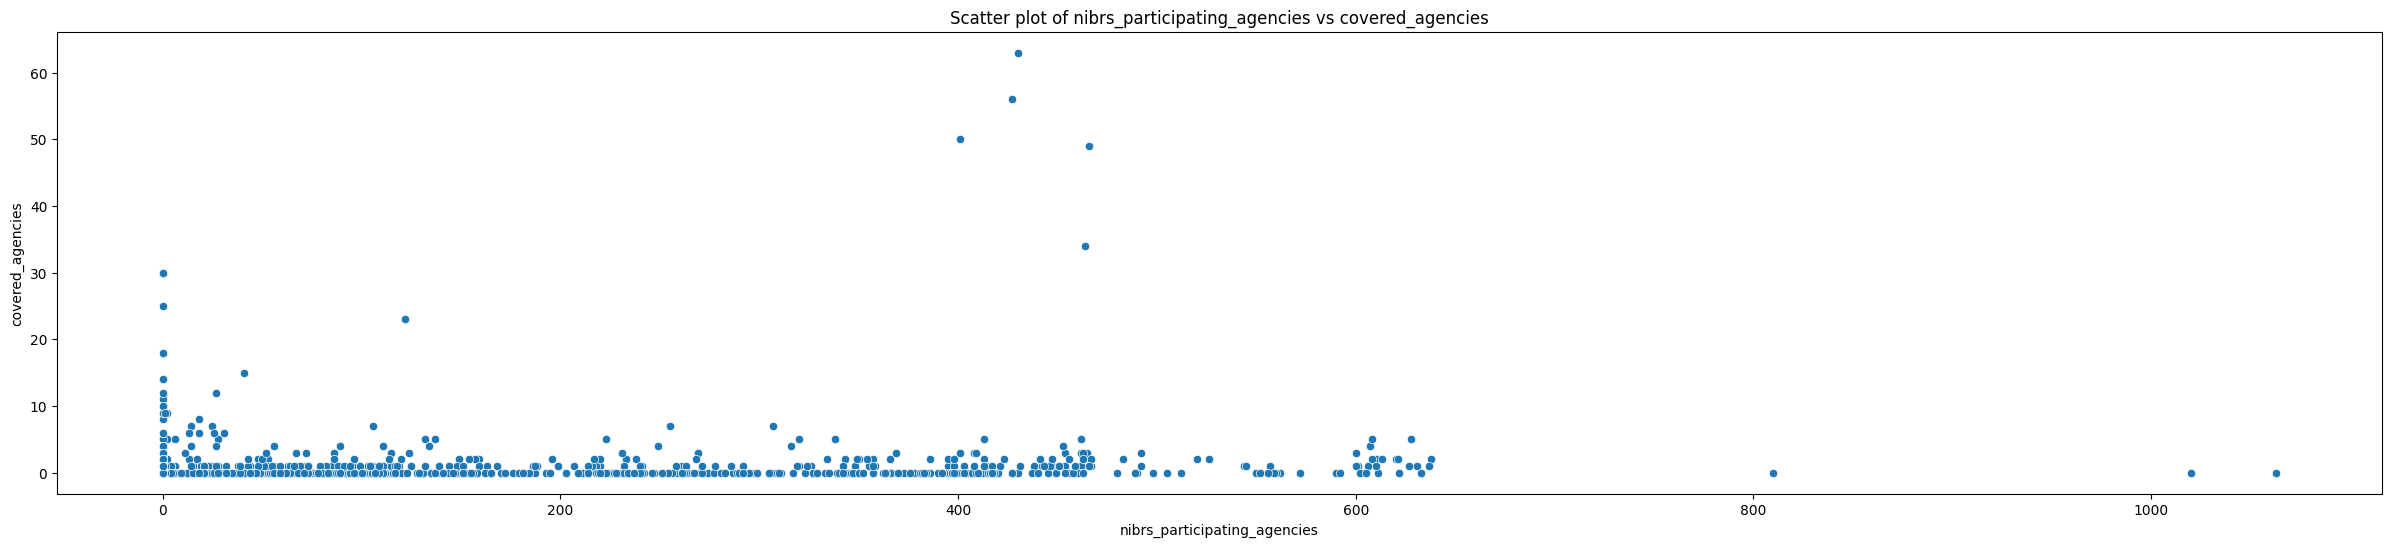

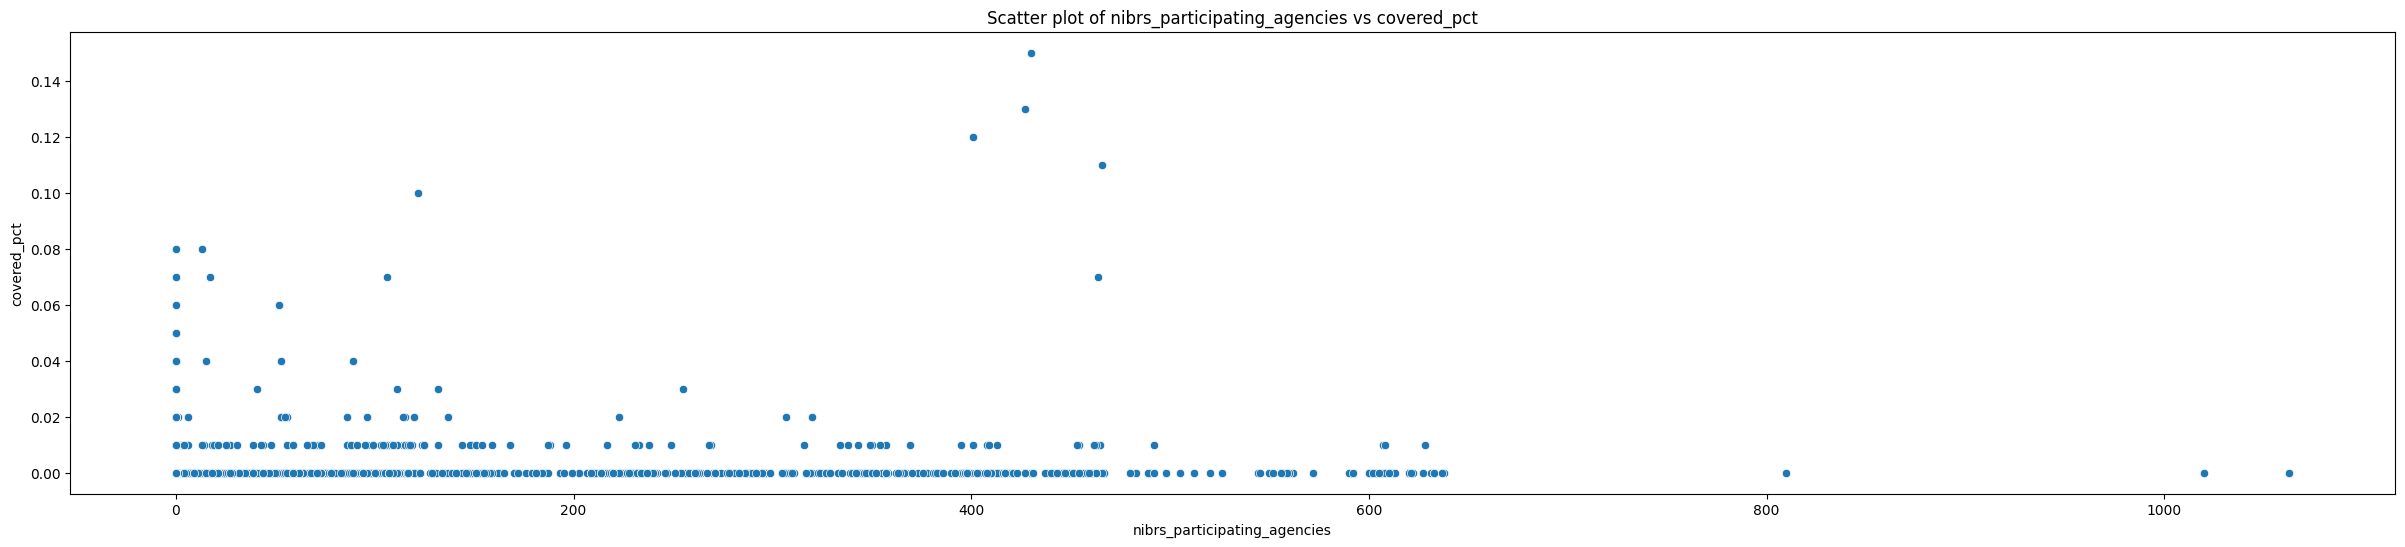

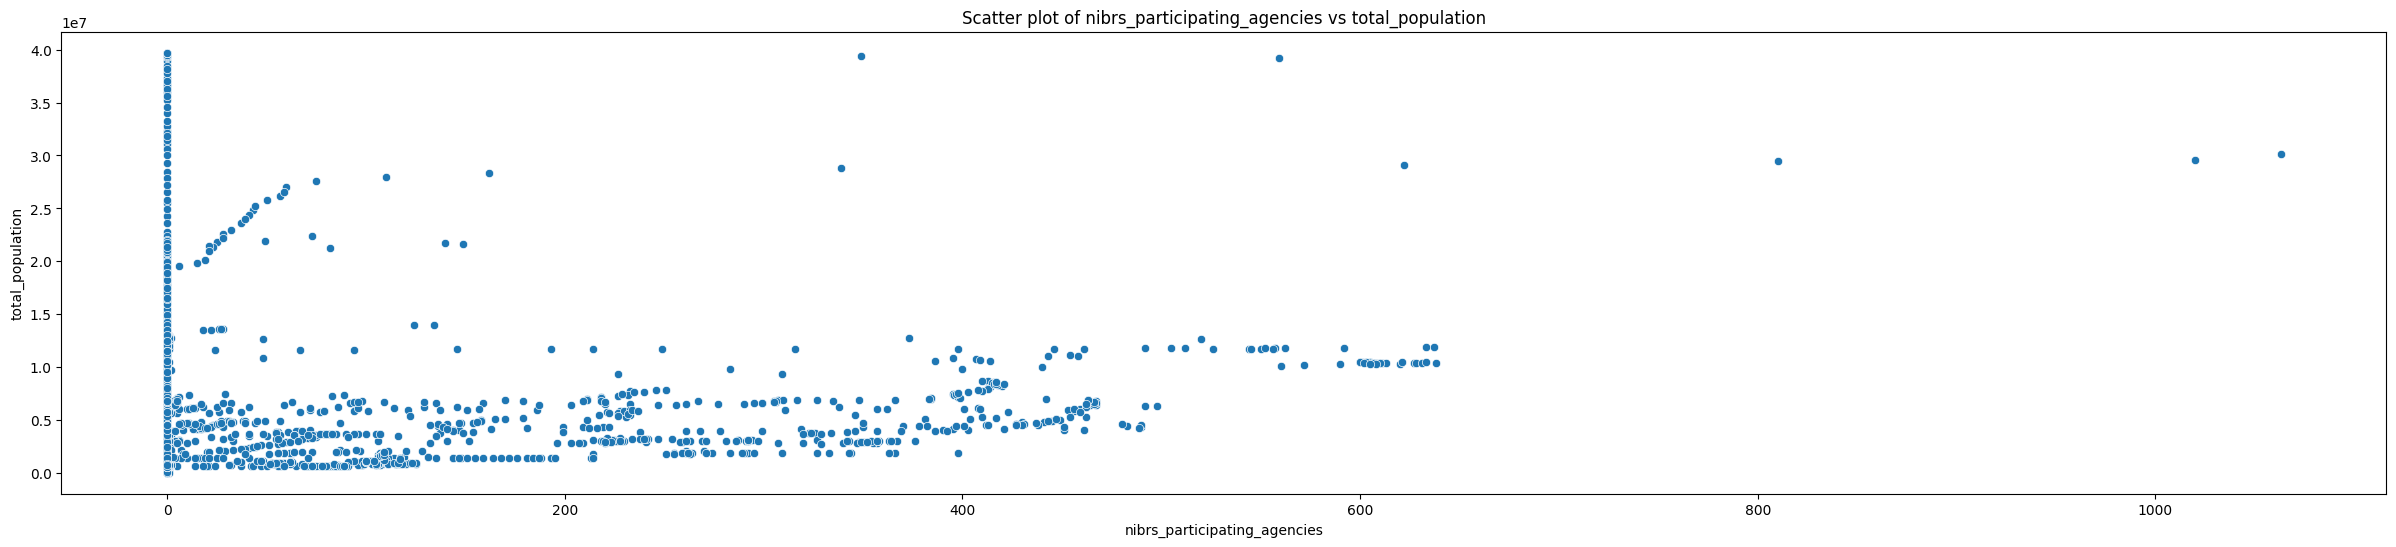

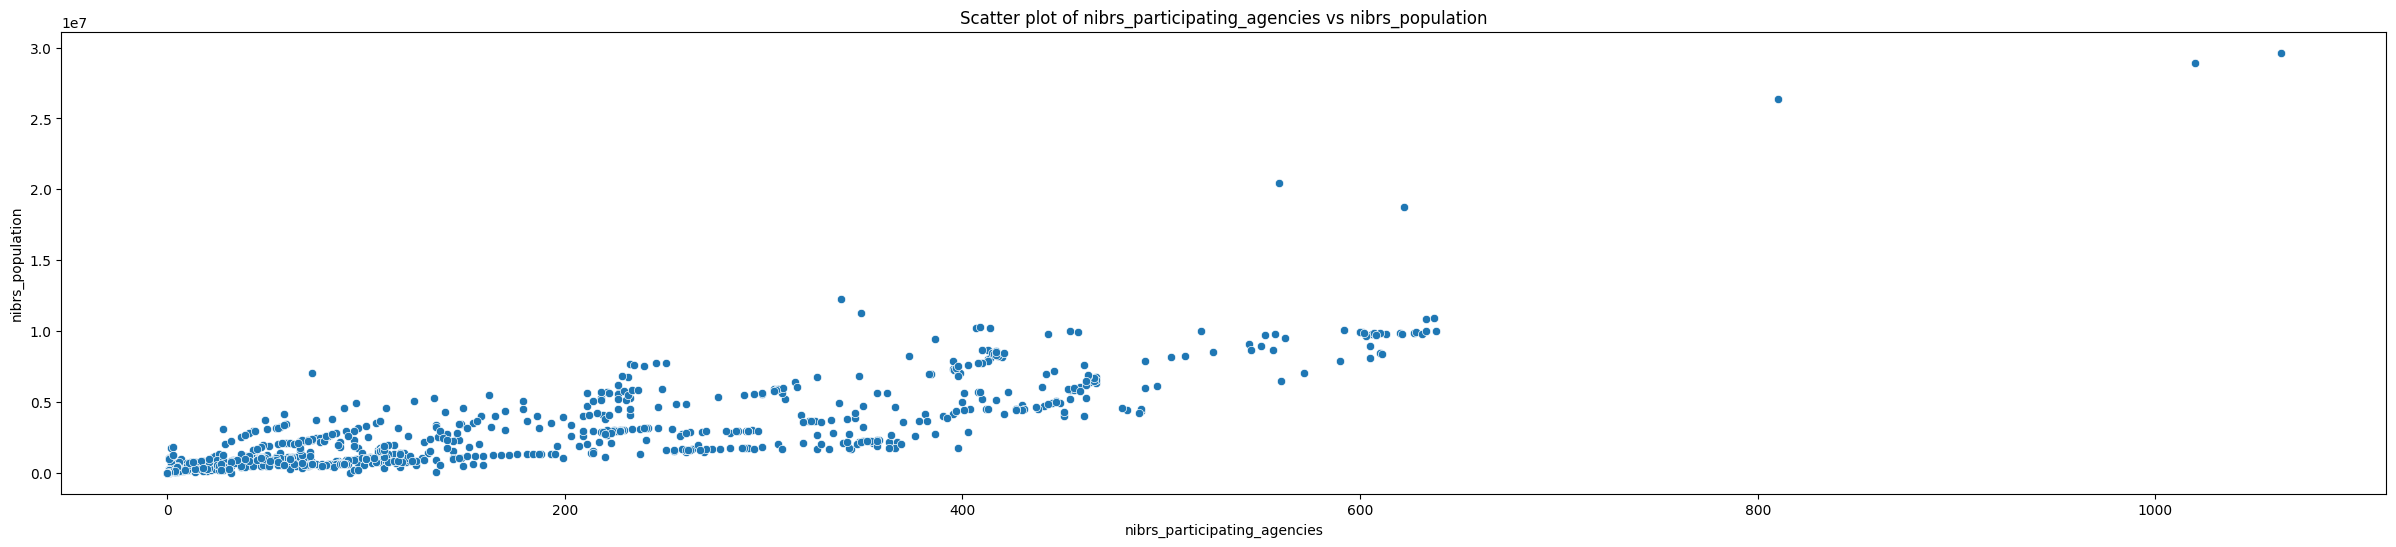

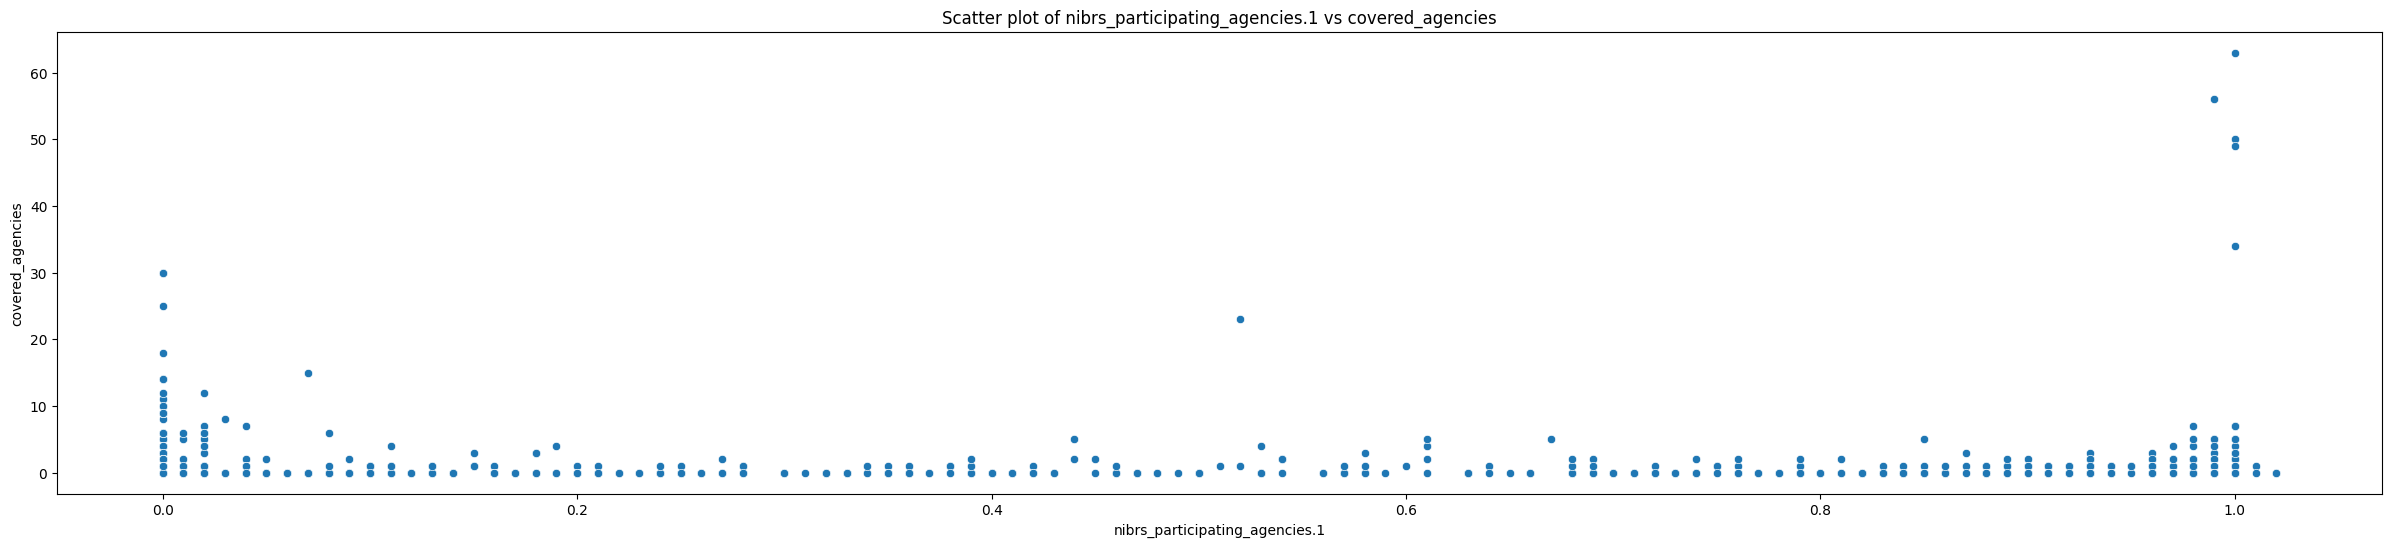

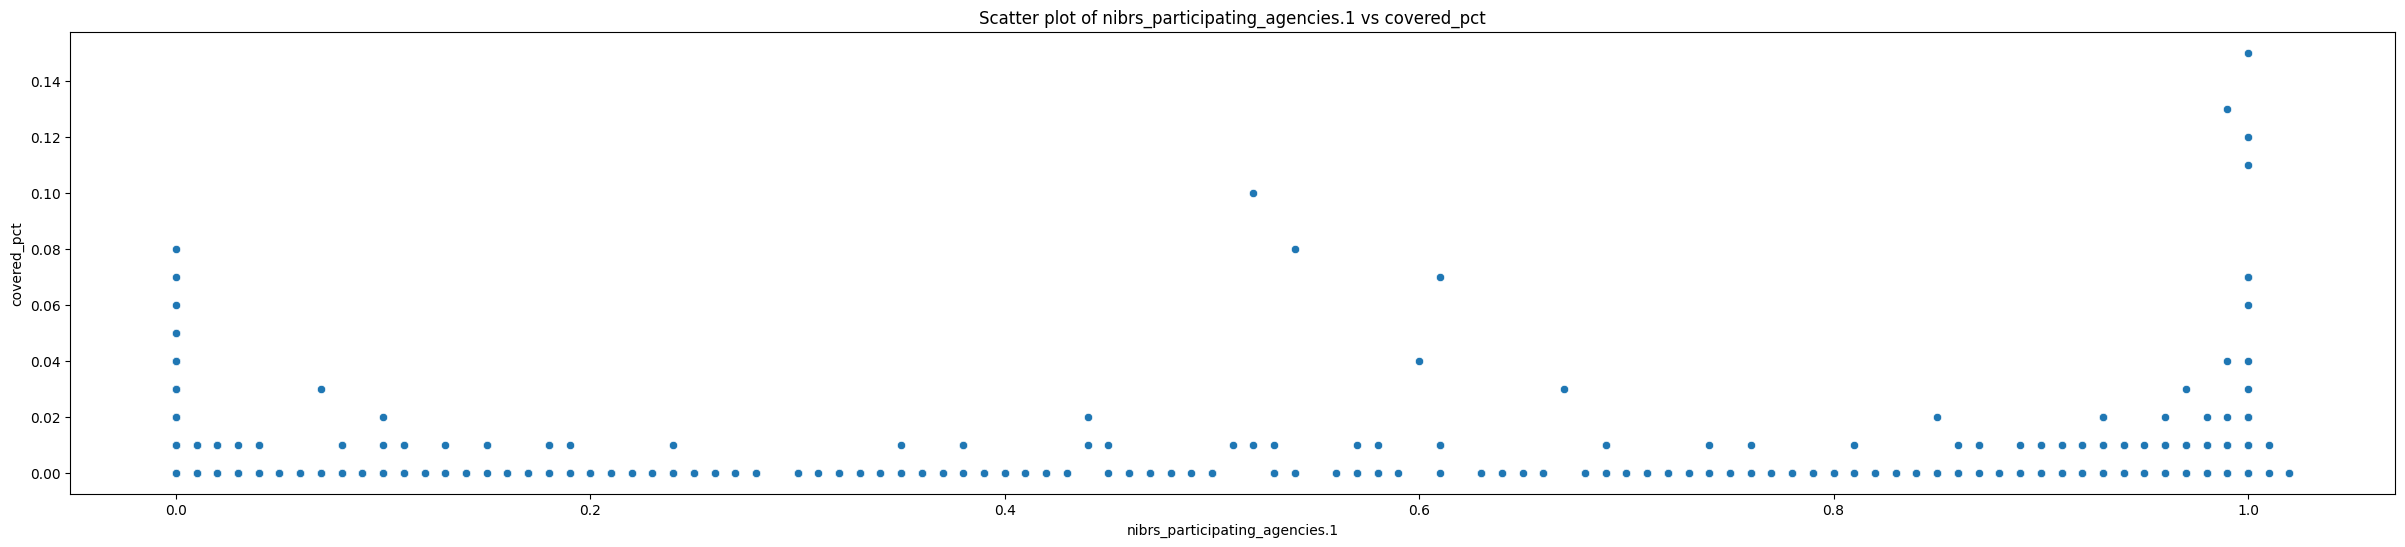

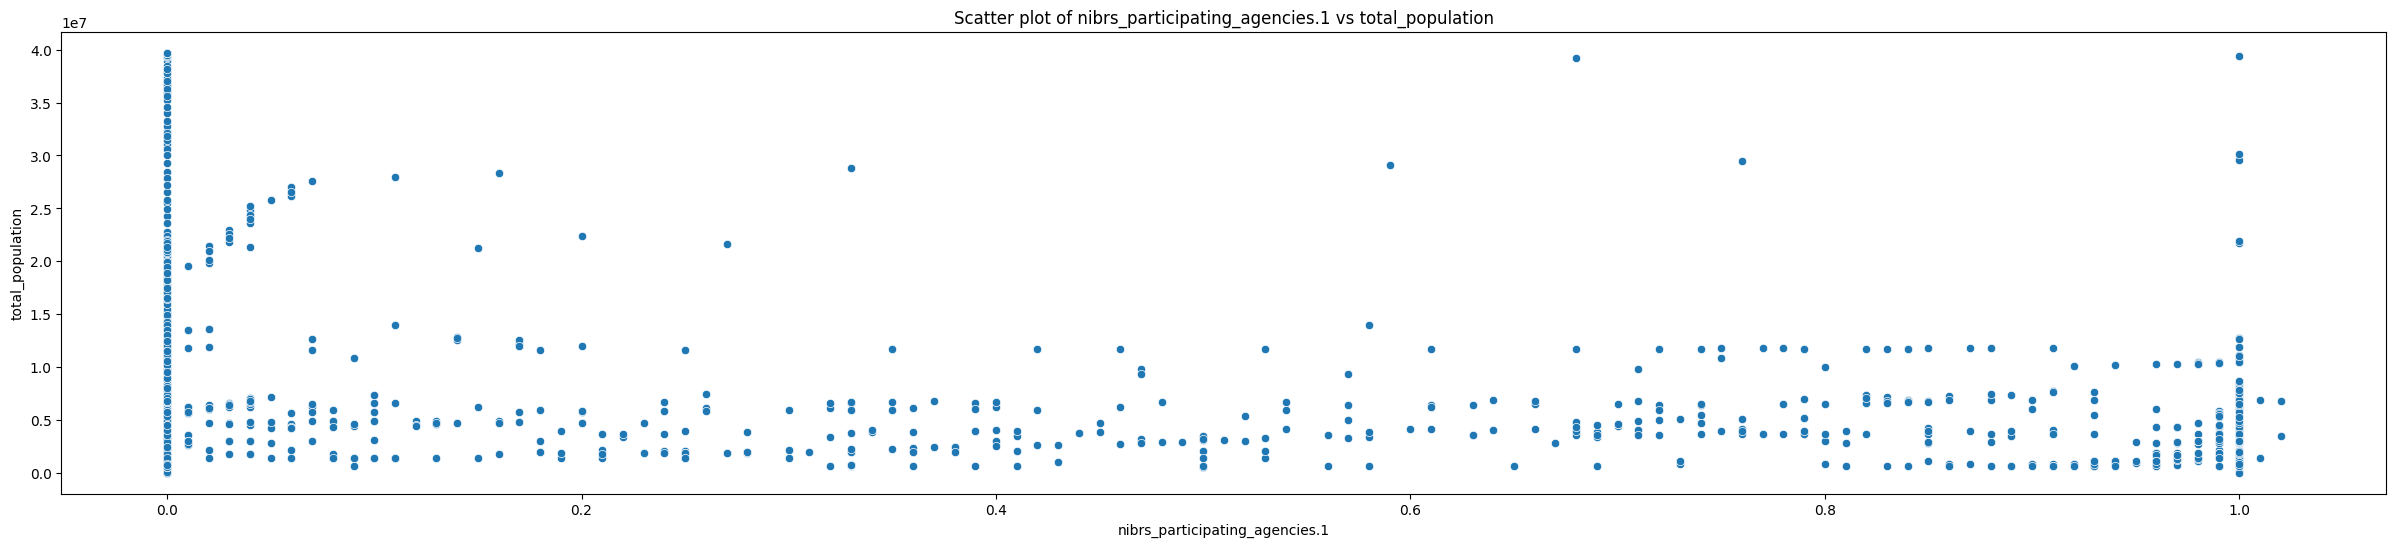

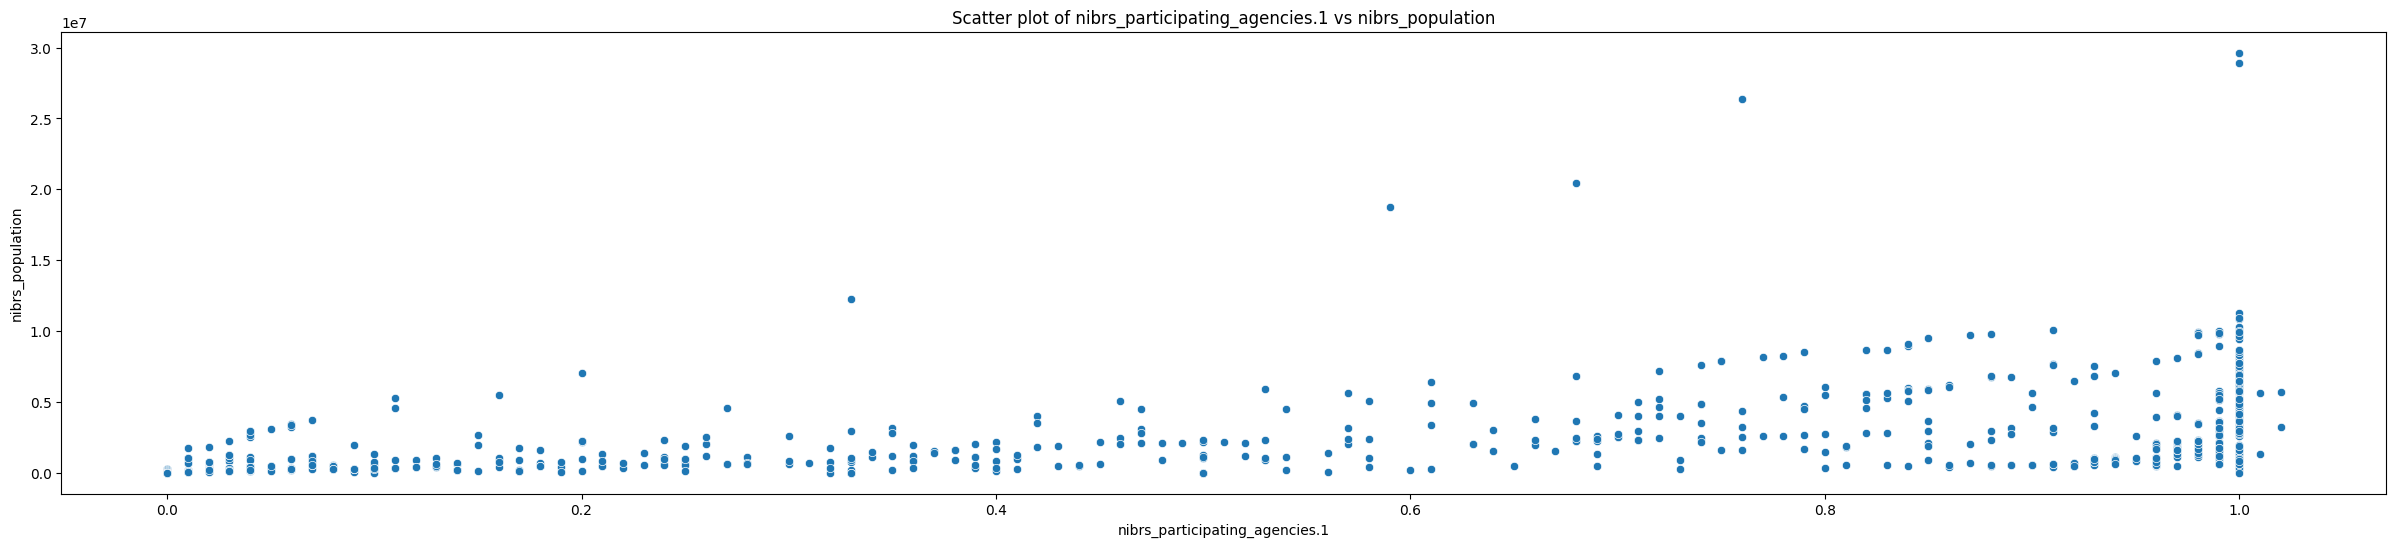

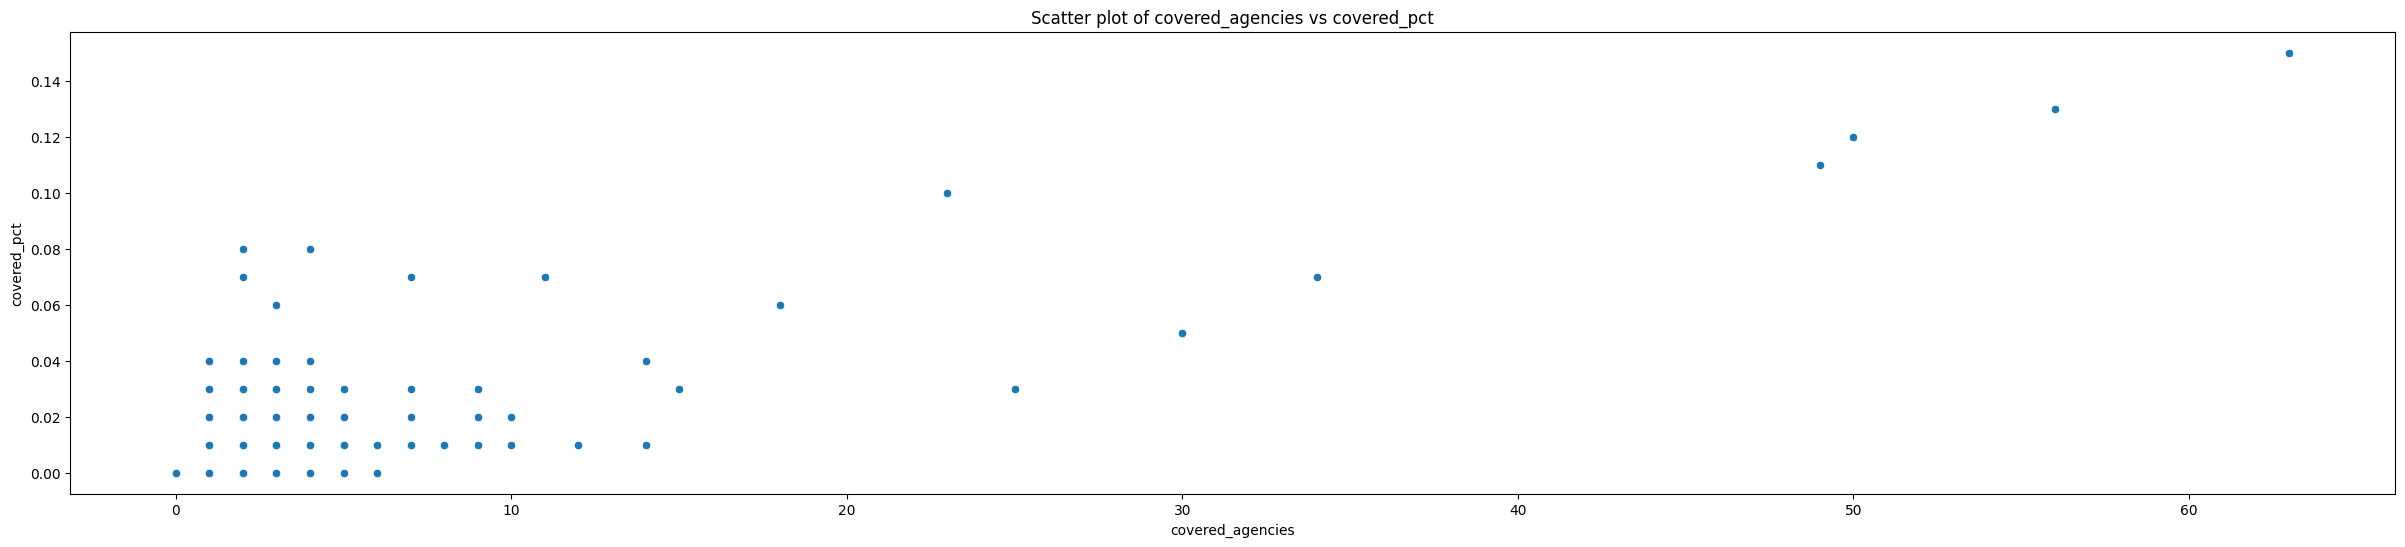

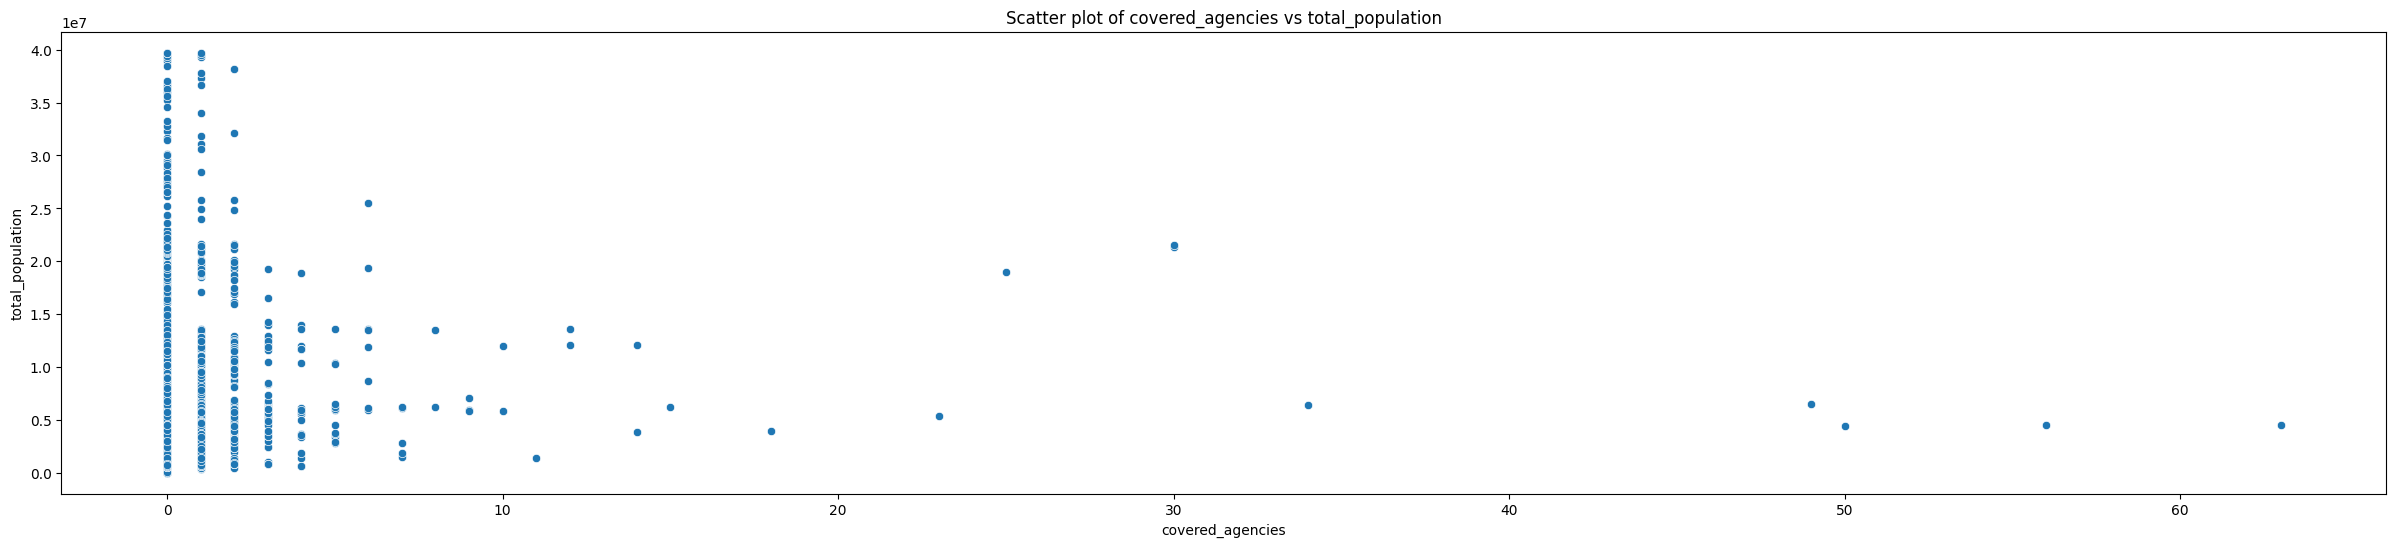

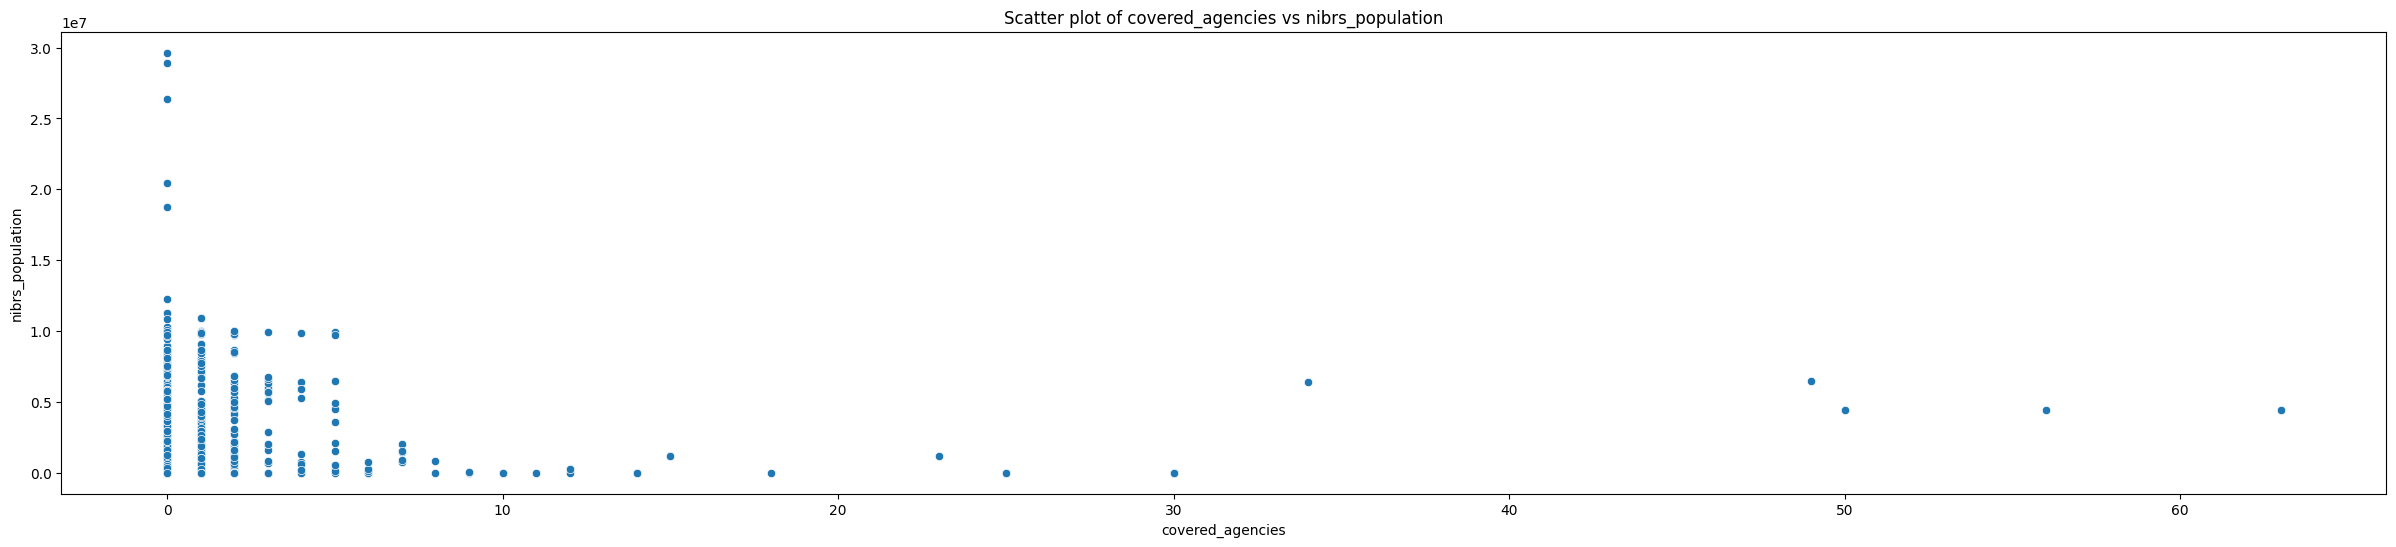

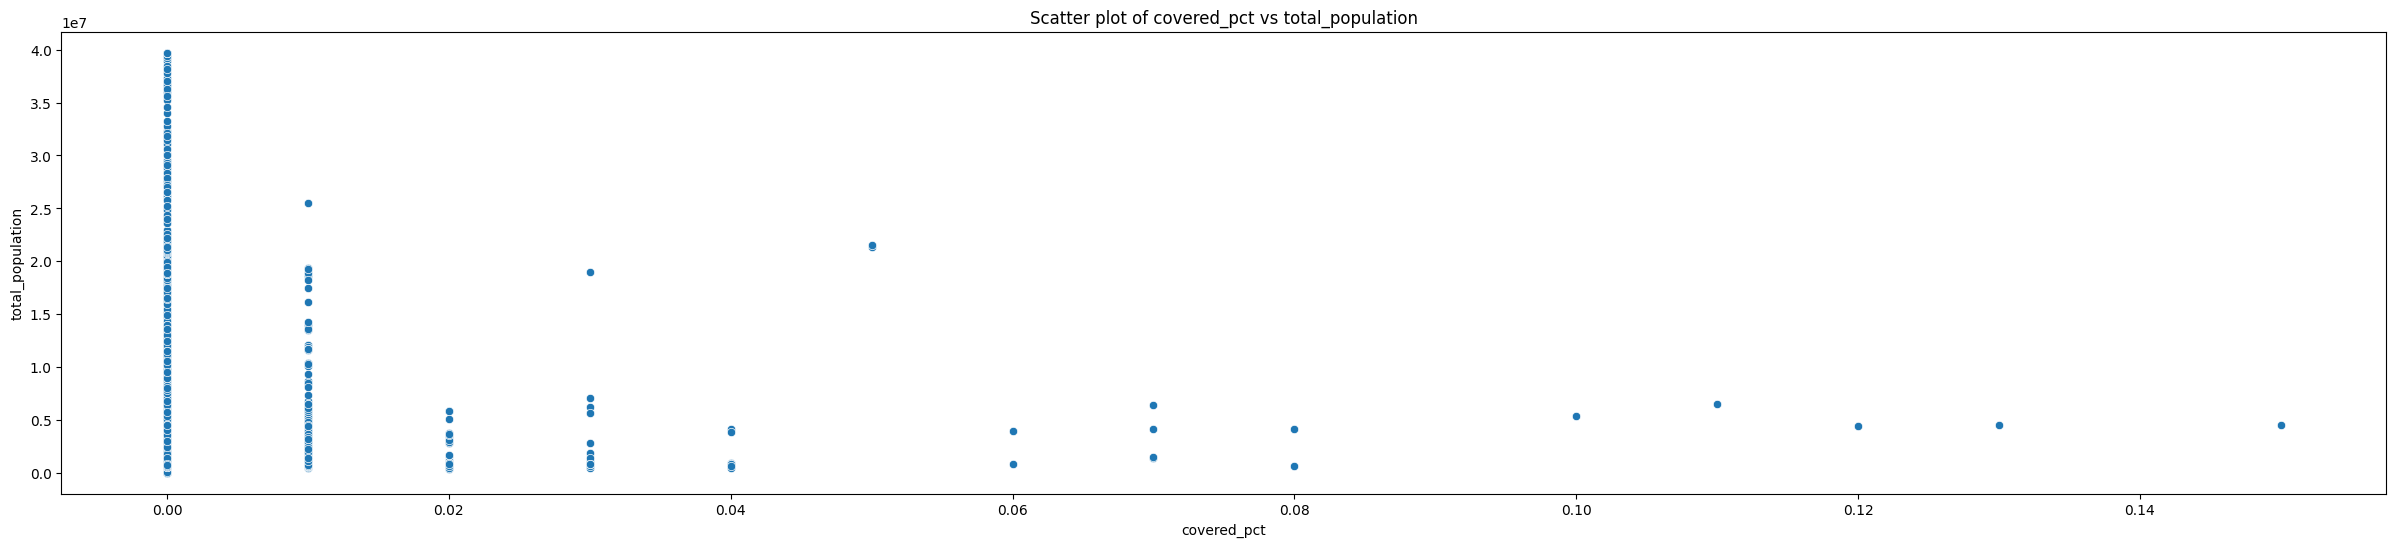

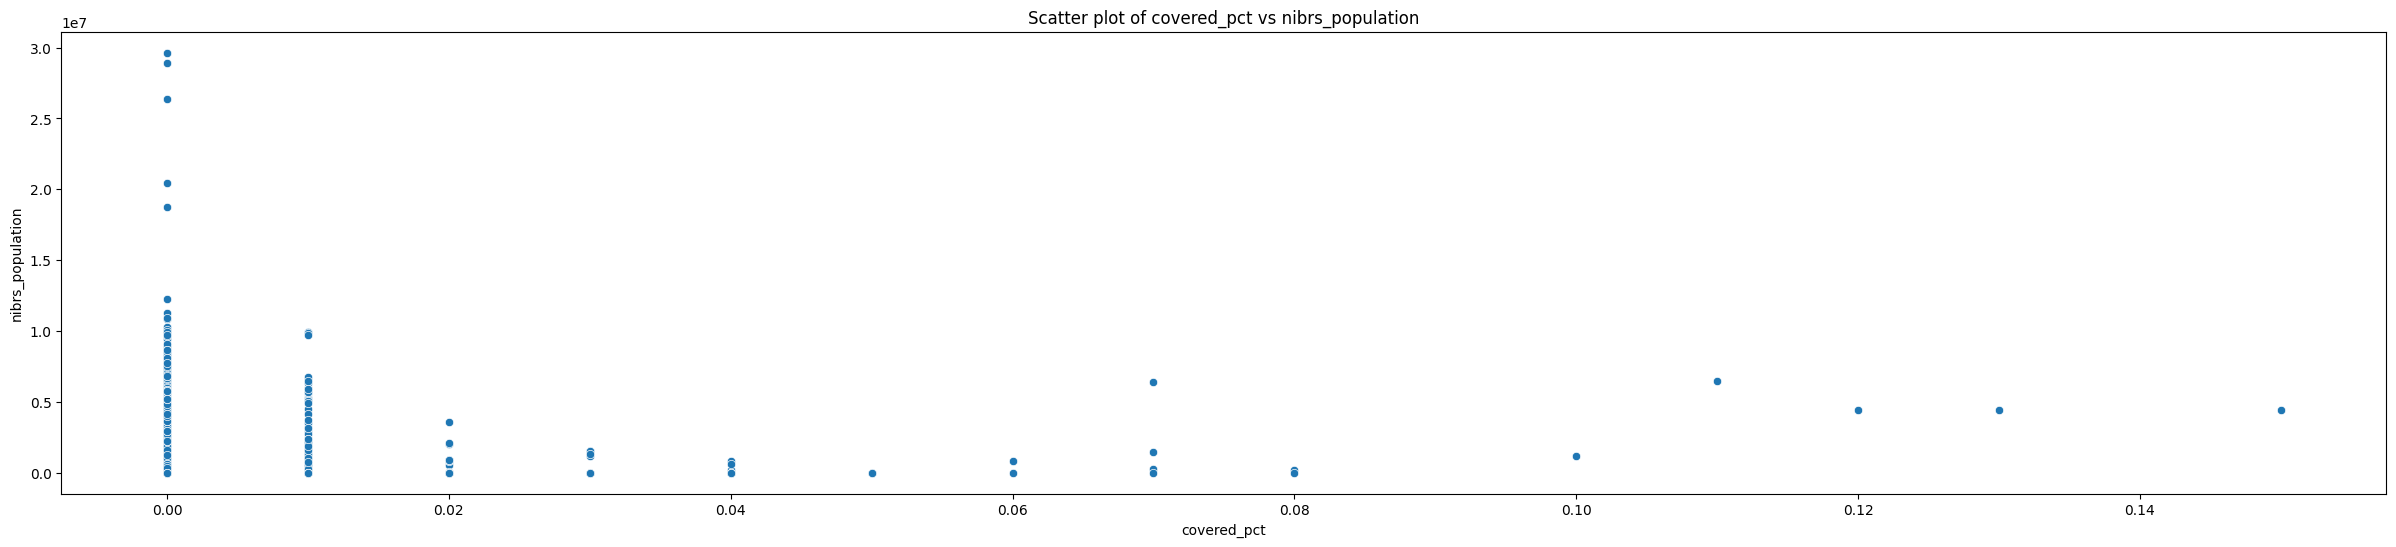

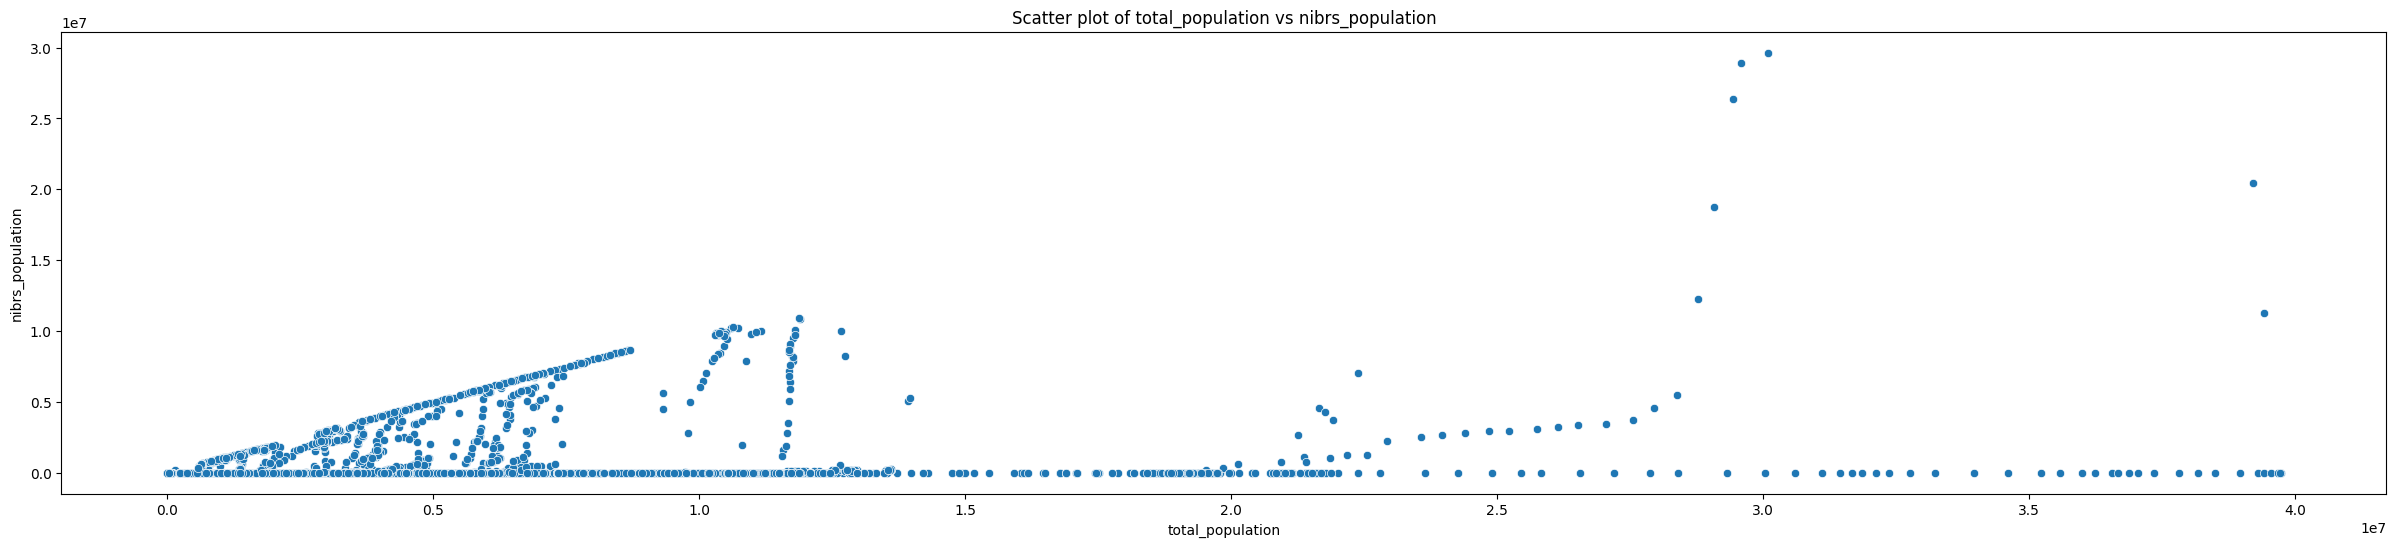

In [144]:

print(columns)
# Pairwise scatter plots
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(30, 6))
        sns.scatterplot(x=continuous_data[columns[i]], y=continuous_data[columns[j]])
        plt.title(f'Scatter plot of {columns[i]} vs {columns[j]}')
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.show()



# 5 Visualizing Pairs of Categorical Features

    Use multiple barplot visualizations.


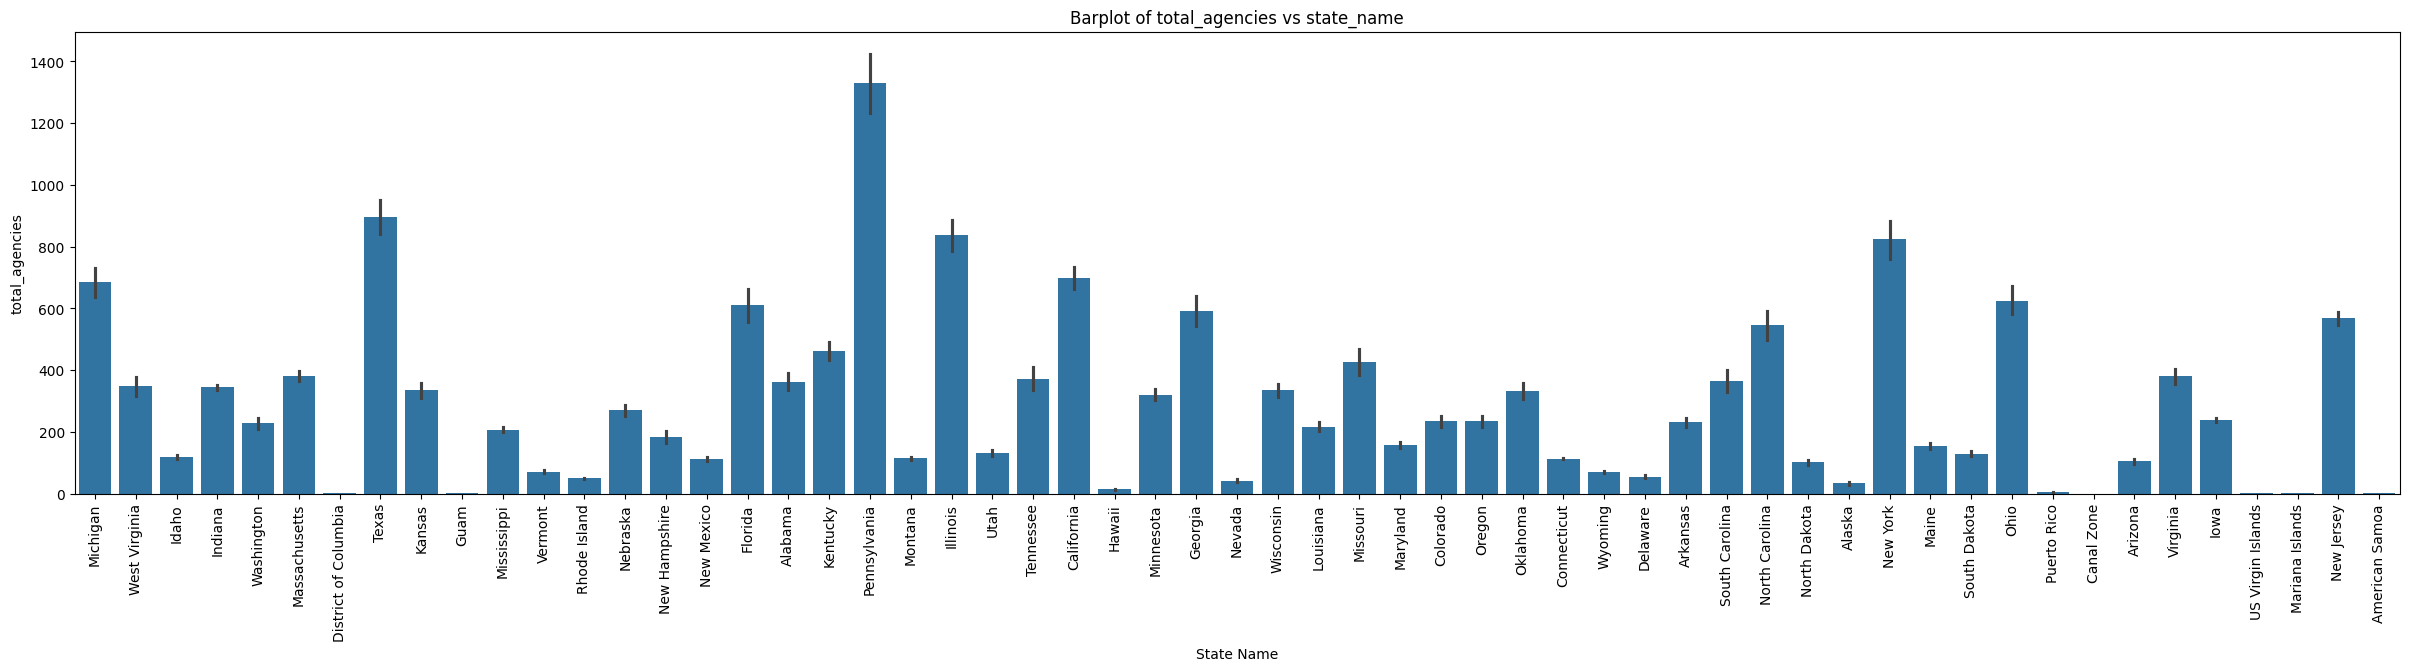

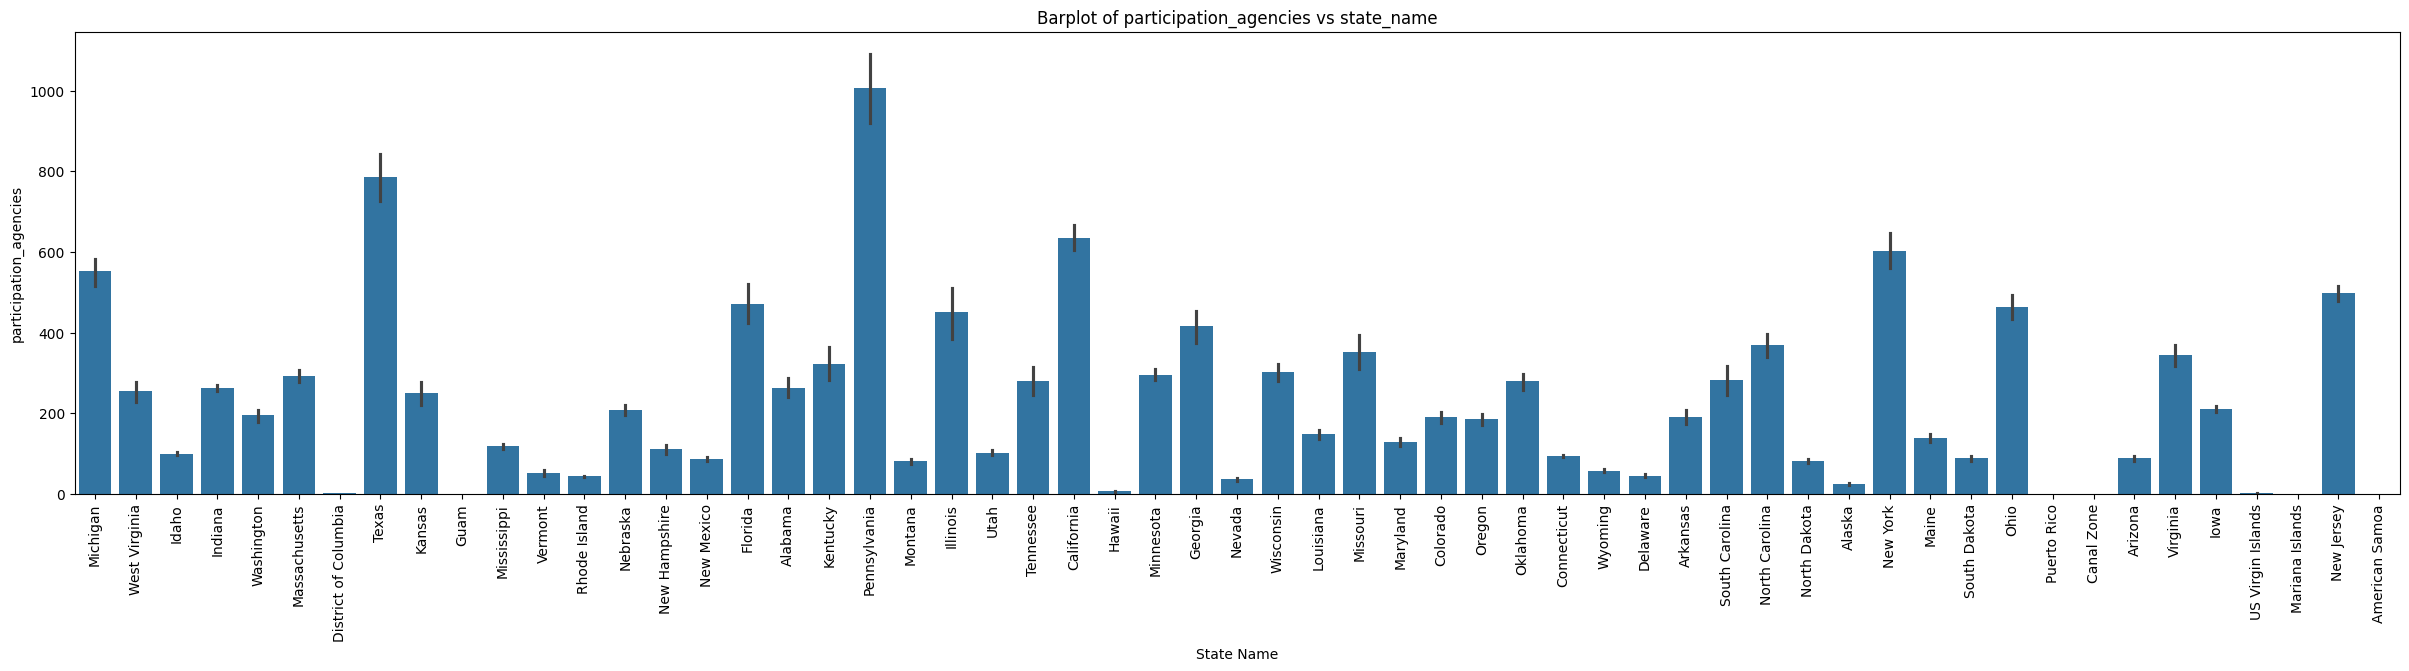

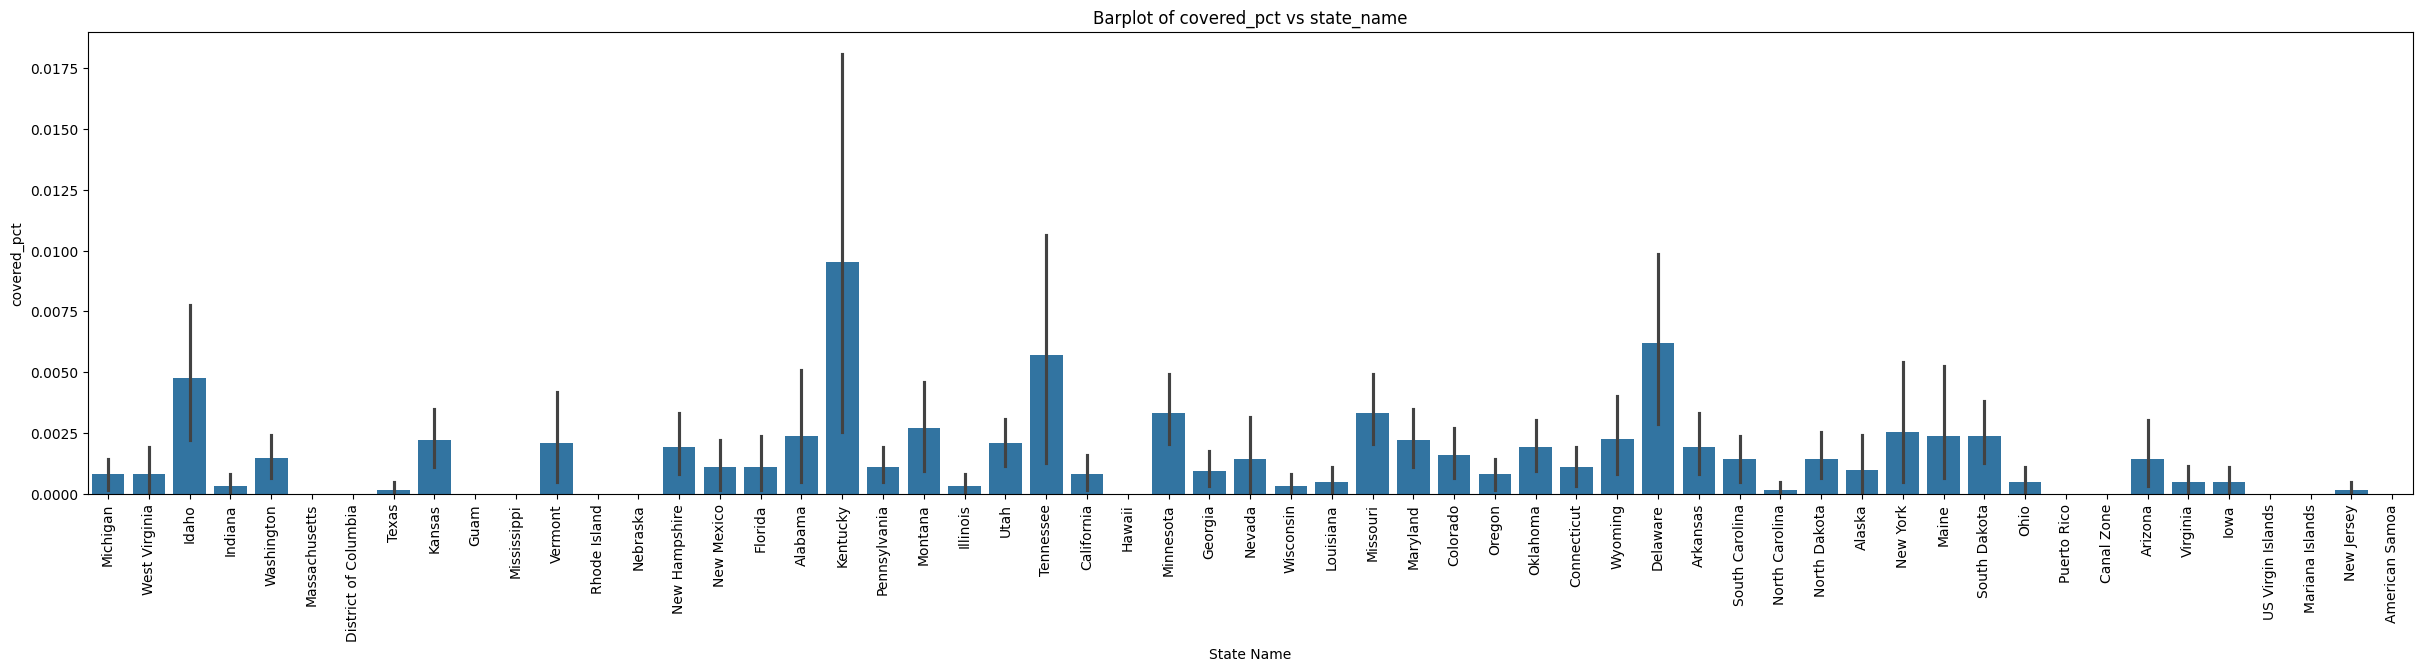

In [116]:
# marged the the data that i want to use for this cell
merged_data = pd.concat([categorical_data, continuous_data], axis=1)

# Define the specific continuous columns you want to plot
columns_to_plot = ['total_agencies', 'participation_agencies', 'covered_pct']  # Modify these column names based on your data

# Loop through the specific columns in the continuous_data DataFrame
for column in columns_to_plot:
    if column in merged_data.columns:
        plt.figure(figsize=(30, 6))
        sns.barplot(x='state_name', y=column, data=merged_data)
        plt.title(f'Barplot of {column} vs state_name')
        plt.xlabel('State Name')
        plt.ylabel(column)  # Label the y-axis with the continuous variable name

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)
        
        # Show the plot
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")


# Analysis and Findings on Registered Agencies and Crime Reporting in Pennsylvania

After a thorough review and comparison of the data regarding registered agencies across various states in the United States, I observed that Pennsylvania has one of the highest numbers of registered agencies. However, when examining the actual number of agencies actively participating in crime reporting, there appears to be a significant gap.

## Key Findings:
1. **High Number of Registered Agencies**:  
   Pennsylvania stands out as one of the states with the highest number of registered law enforcement agencies. This fact initially led to the assumption that crime reporting would be thorough and comprehensive across the state.

2. **Low Participation in Crime Reporting**:  
   Upon closer analysis, I found that despite the high number of agencies, not all are actively participating in reporting crime data to the National Incident-Based Reporting System (NIBRS). This indicates that a large portion of crimes may be going unreported or underreported in Pennsylvania.

3. **Reporting Coverage**:  
   When the percentage of the population covered by reporting agencies was examined, I found that only about 0.0025% of the state's population is being represented in the crime reports submitted by these agencies. This low figure raises concerns about the accuracy and completeness of crime data from Pennsylvania.

4. **Implications**:  
   The disparity between the number of registered agencies and those actively reporting crime highlights potential weaknesses in the crime reporting system. It is likely that not all crimes in Pennsylvania are being captured and reported, which could lead to a misleading picture of the crime landscape in the state.

## Conclusion:  
The findings suggest that while Pennsylvania has a large number of law enforcement agencies, this does not necessarily translate into comprehensive crime reporting. The low participation rate of agencies in submitting crime data to NIBRS indicates that the actual crime rate in Pennsylvania might be underreported, calling for further investigation into why agencies are not fully participating and how this can be improved to ensure more accurate crime data collection.


.

.

# 6 Visualizing Relationship Between a Catergorical and Continuous Feature

    For a subset of the categorical and continuous features, perform stacked barplot visualizations. Comment on what you observed

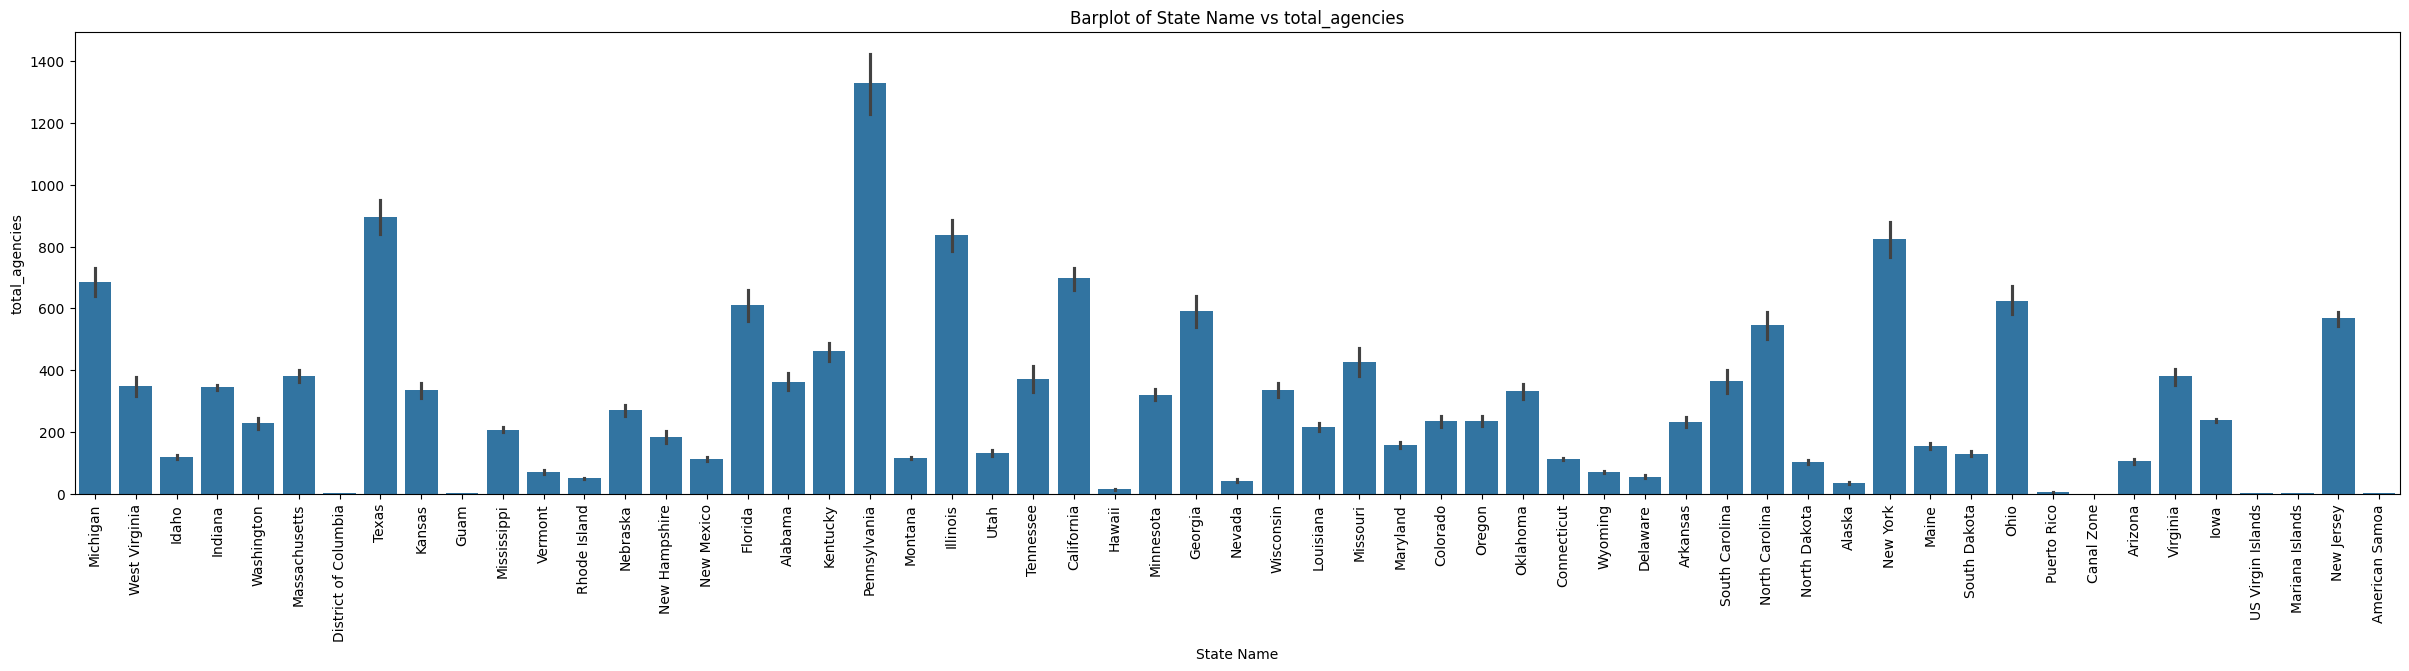

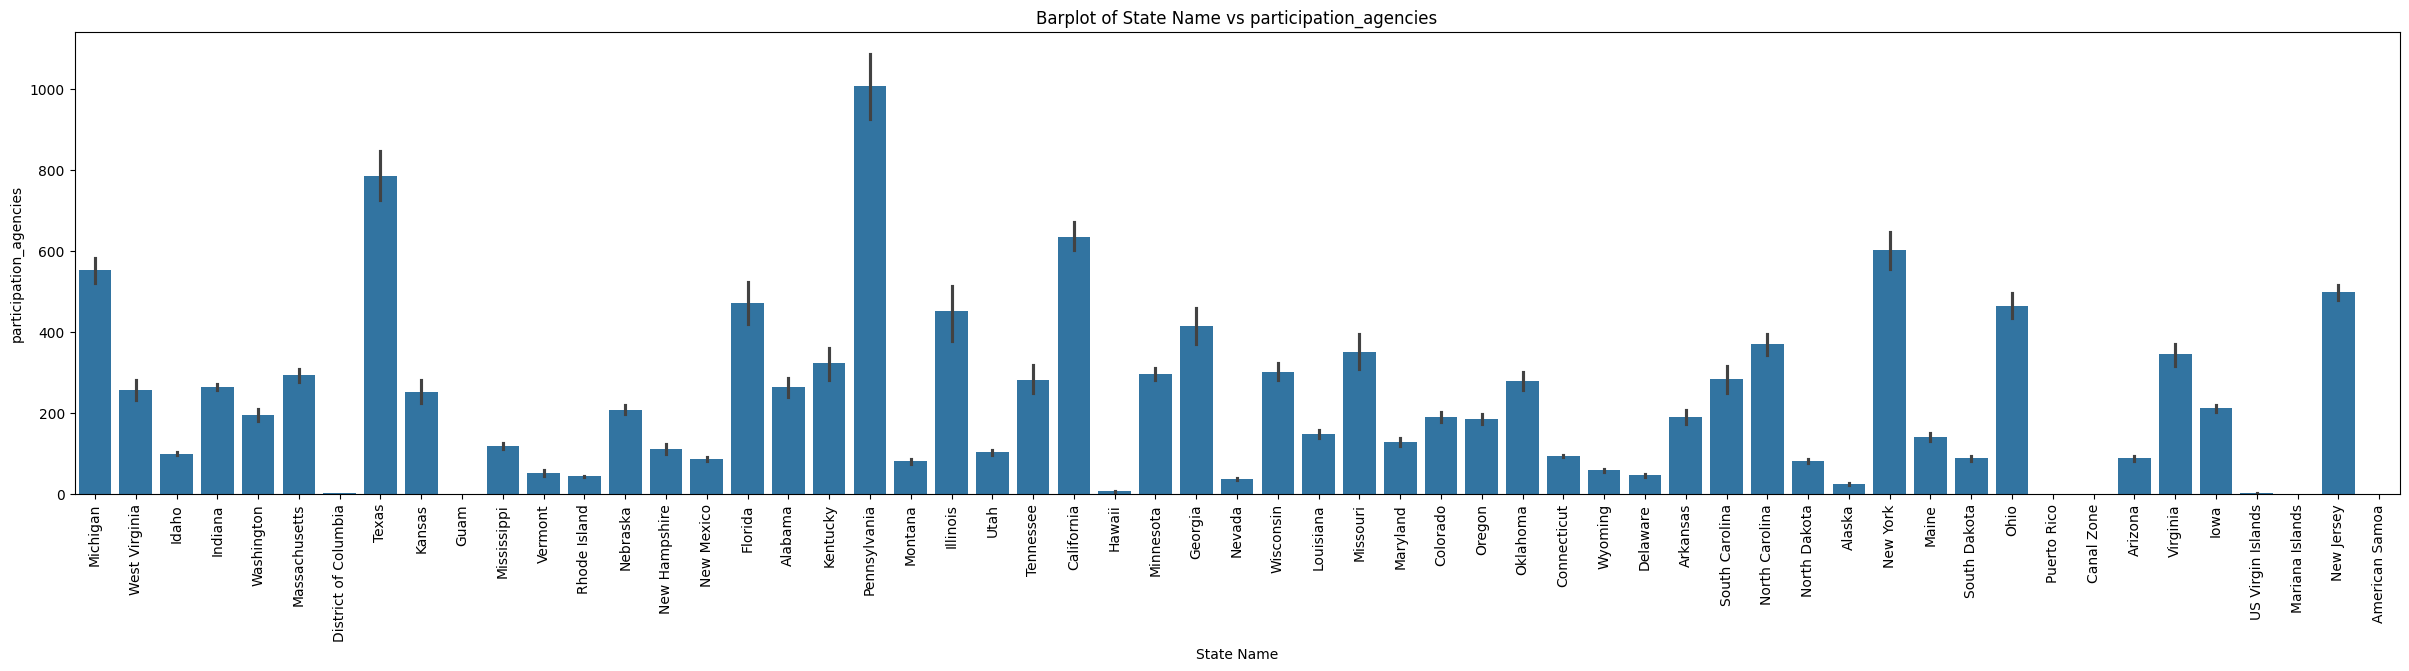

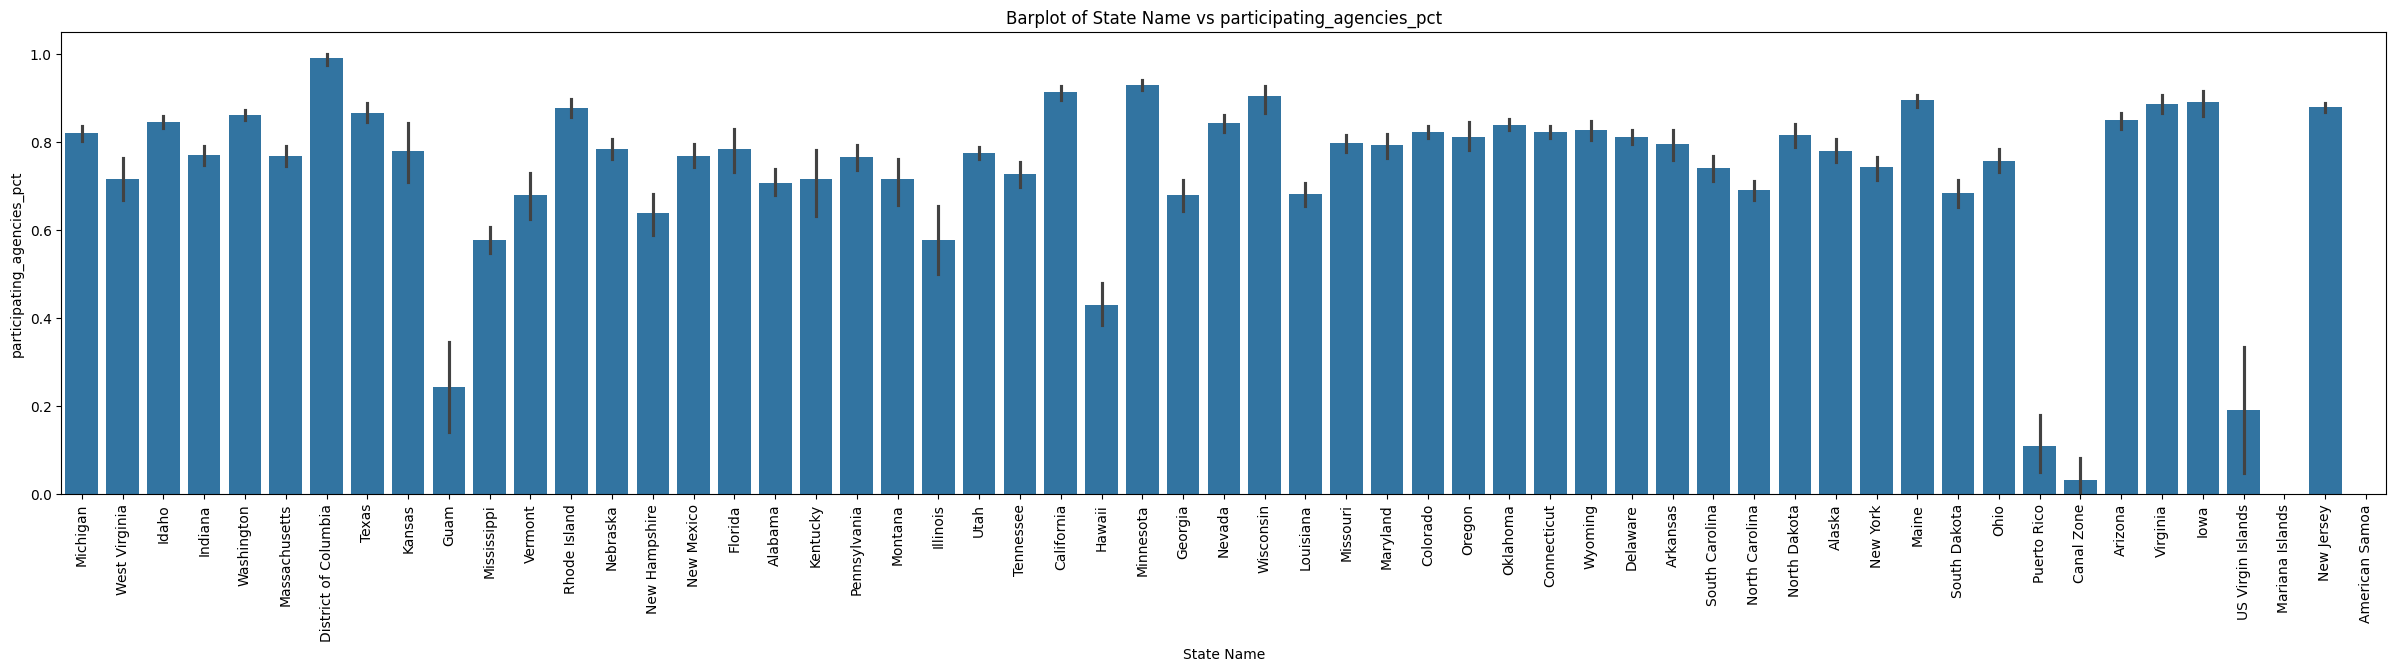

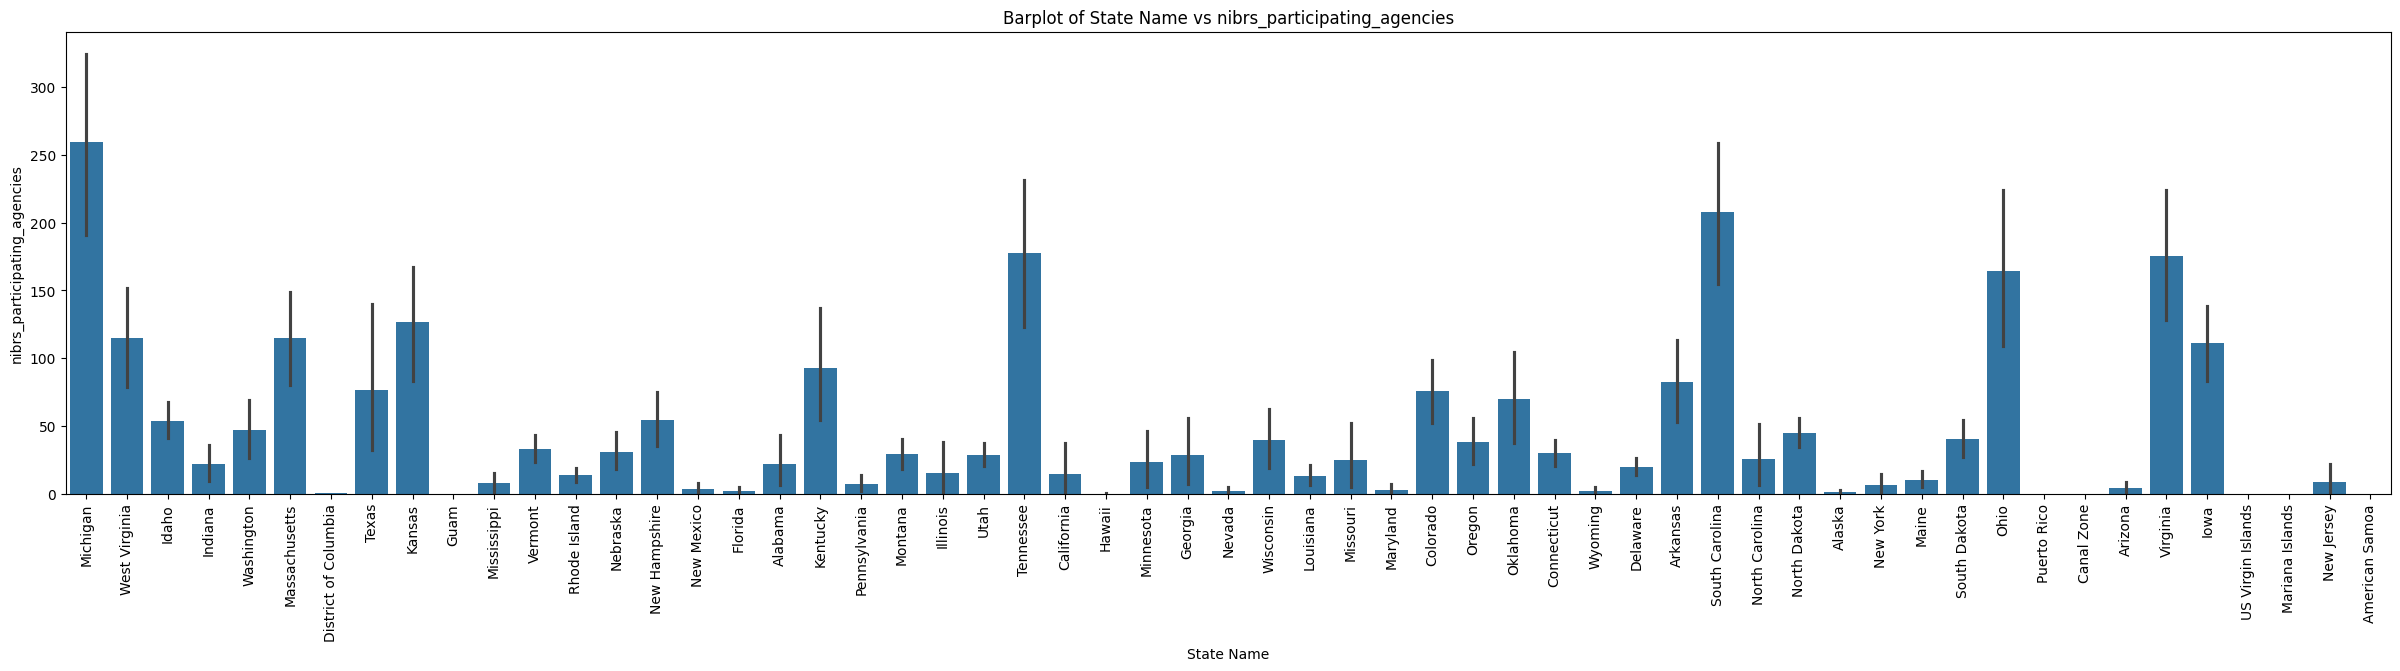

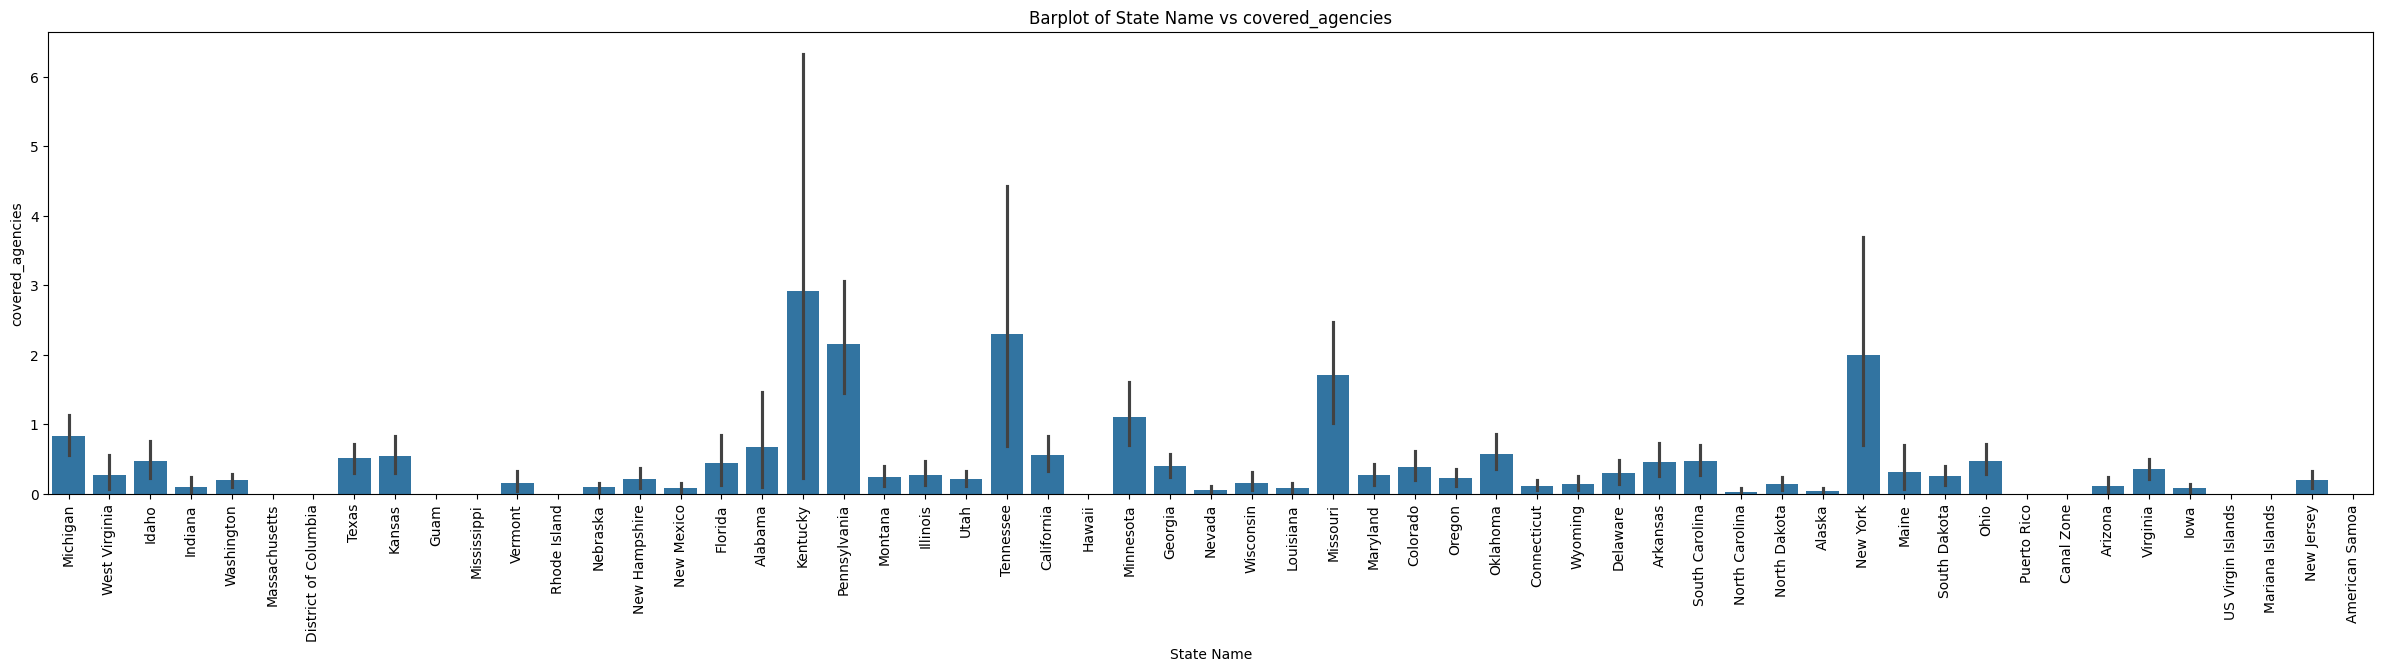

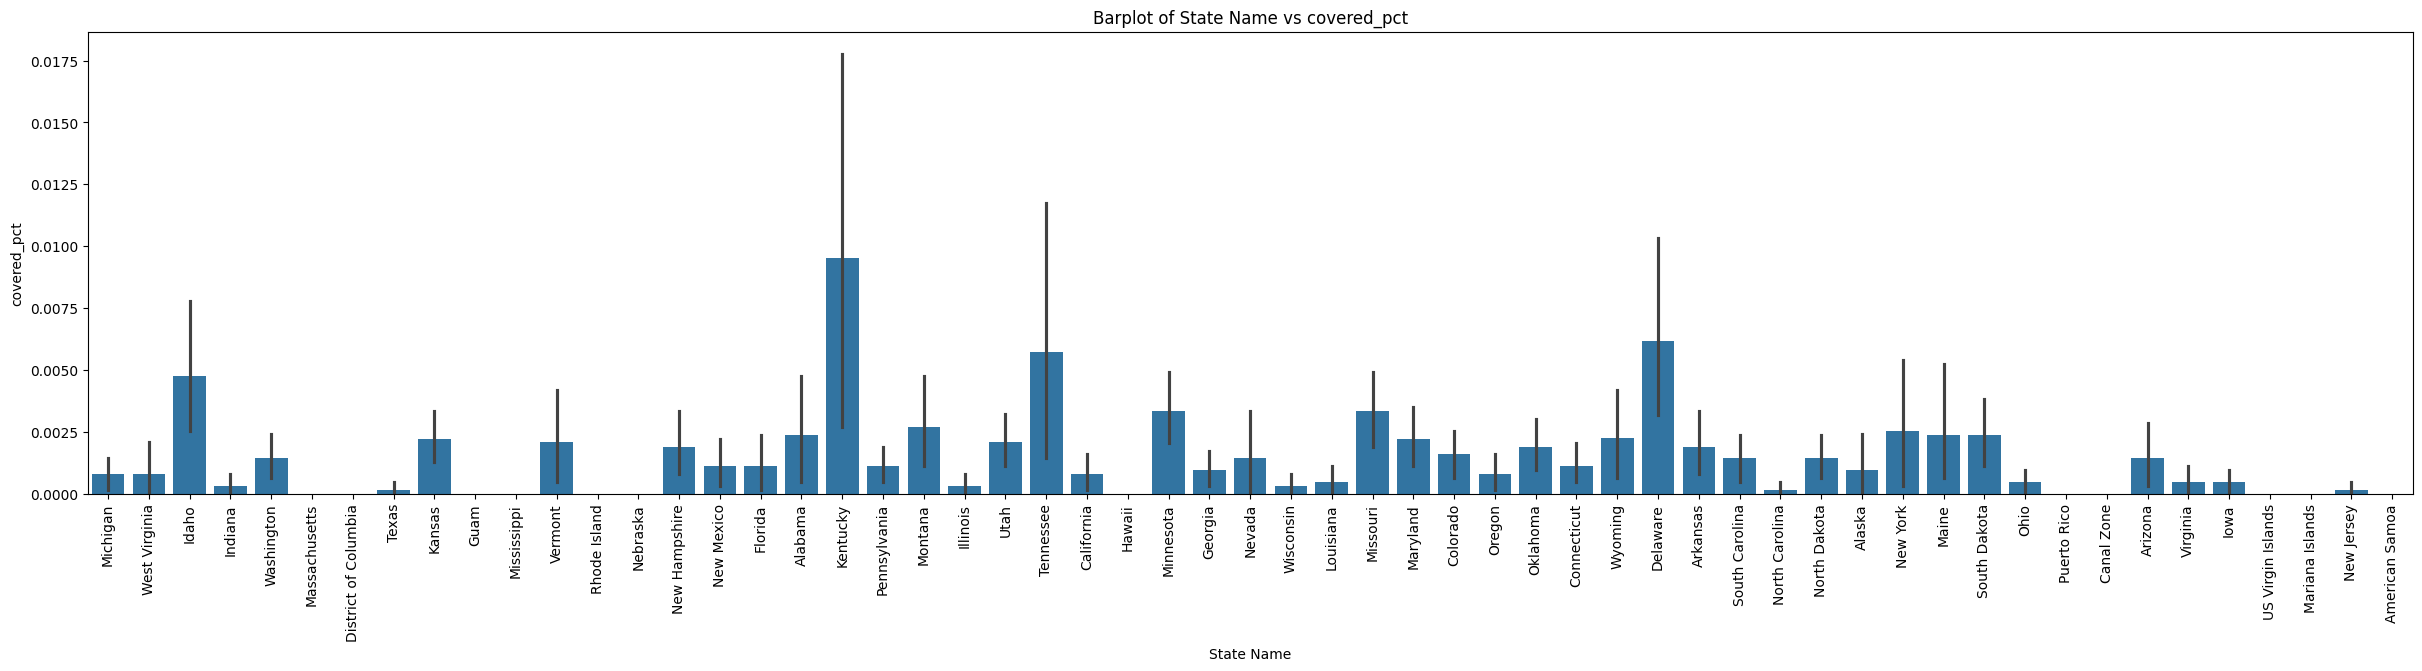

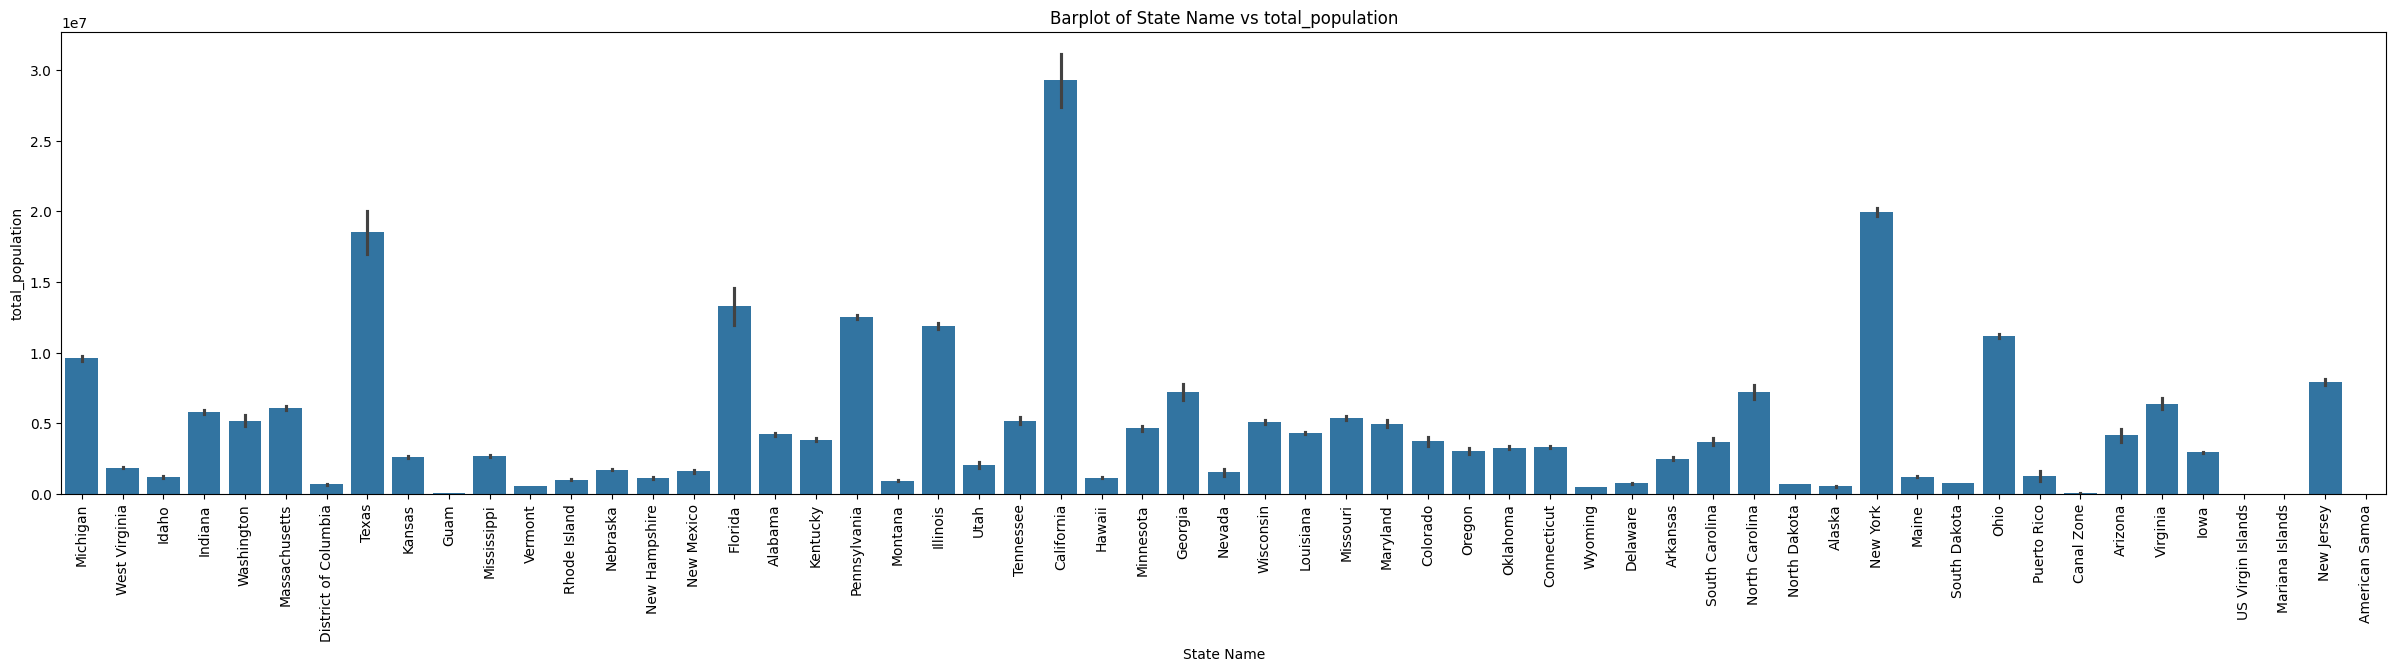

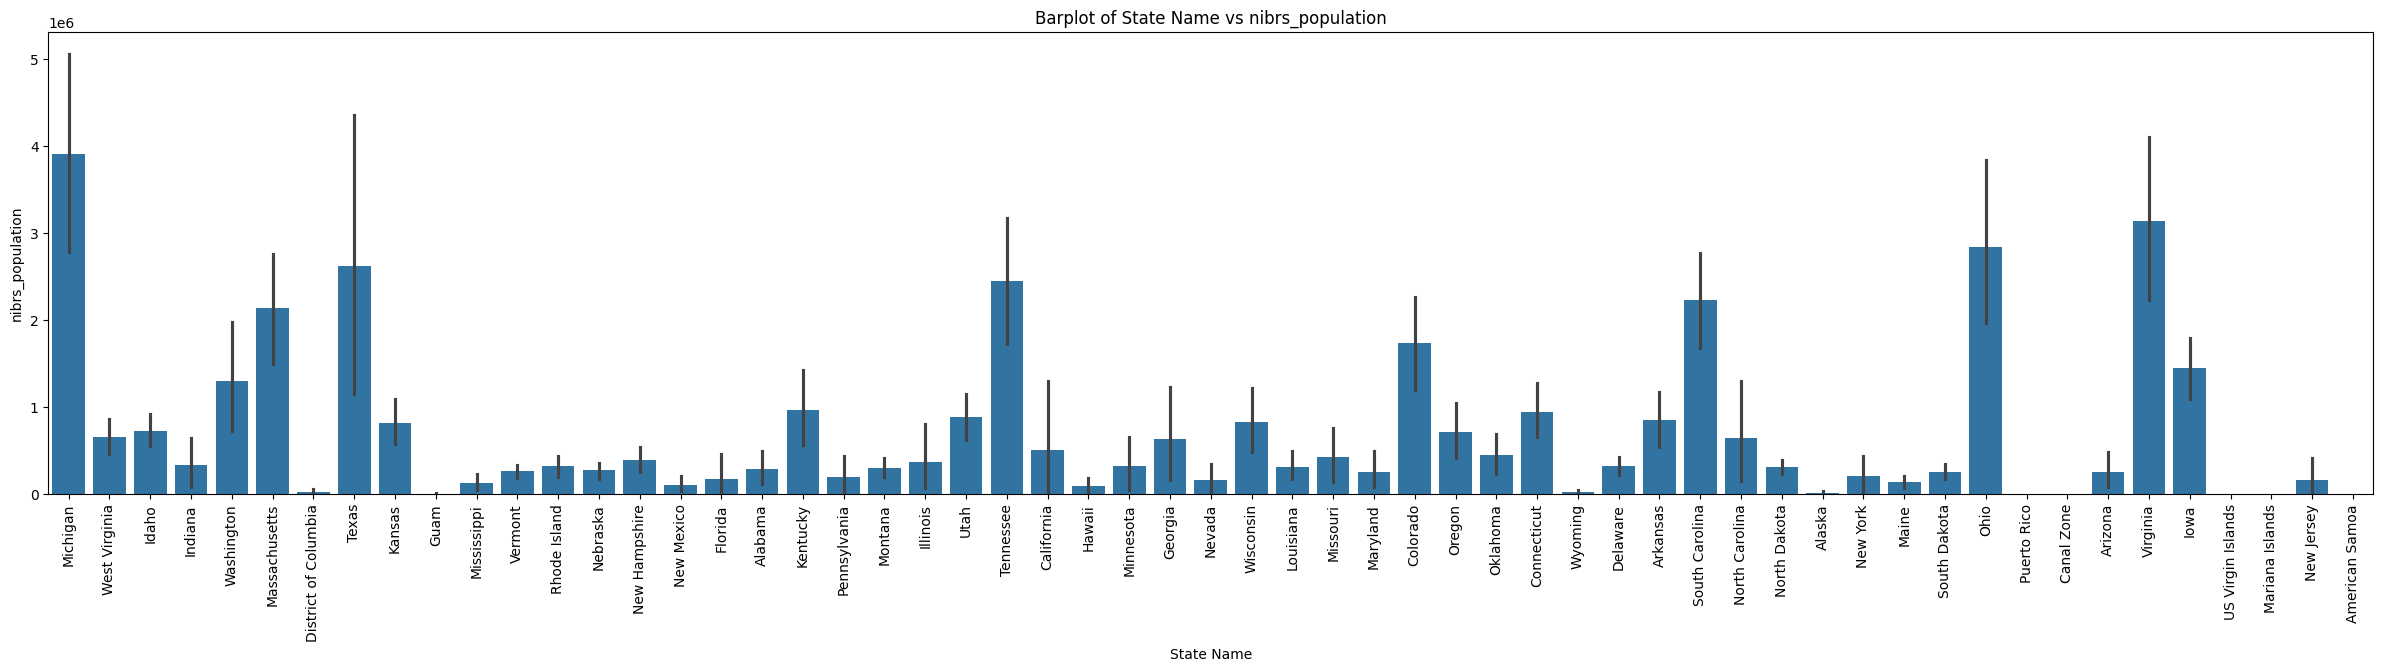

In [115]:
# Ensured the two DataFrames are properly aligned
merged_data = pd.concat([categorical_data, continuous_data], axis=1)
# List of continuous data columns
continuous_data_columns = [
    'total_agencies',
    'participation_agencies',
    'participating_agencies_pct',
    'nibrs_participating_agencies',
    'covered_agencies',
    'covered_pct',
    'total_population',
    'nibrs_population'
]
# Loop through each column in the continuous_data DataFrame
for column in continuous_data_columns:
    if column in merged_data.columns:
        plt.figure(figsize=(30, 6))
        # Plot the barplot for each continuous variable against 'state_name'
        sns.barplot(x='state_name', y=column, data=merged_data)
        
        # Customize plot
        plt.title(f'Barplot of State Name vs {column}')
        plt.xlabel('State Name')
        plt.ylabel(column)  # Label the y-axis with the continuous variable name
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)
        
        # Show the plot
        plt.show()

# Visual Analysis of Continuous and Categorical Data: Agency Participation vs. Reporting

In my analysis, I explored the relationship between categorical data (states) and continuous data (number of agencies, participation, and reporting). This analysis aimed to uncover patterns regarding agency participation in crime reporting across different states.

## Key Findings:
1. **Agency Participation Across States**:  
   The visual analysis indicated that, despite some states having a higher number of registered NIBRS (National Incident-Based Reporting System) agencies, these states did not necessarily report more crimes. In fact, many states with fewer registered agencies tend to have higher participation rates in crime reporting.

2. **Inverse Relationship Between Number of Agencies and Reporting**:  
   Interestingly, states with fewer registered NIBRS agencies seemed to perform better in terms of active participation. These states reported more consistently, and the percentage of crimes reported by these agencies was notably higher compared to states with a larger number of agencies.

3. **Low Coverage of Reporting Agencies**:  
   One concerning finding is that the coverage of agencies actively participating in crime reporting is quite low across almost all states. Even in states with many registered agencies, a smaller percentage of them are actively engaged in submitting crime reports. This suggests that the overall participation in crime reporting might not be as widespread as it should be.

4. **Potential Issues in Crime Reporting Systems**:  
   This trend suggests that having a higher number of registered agencies does not always correlate with better or more comprehensive crime data reporting. States with fewer agencies may have more focused, better-coordinated systems, leading to a higher percentage of crimes being reported accurately. On the other hand, states with more agencies may struggle with coordination, leading to lower participation in crime reporting.

5. **Notable Outliers**:  
   Some states with fewer agencies still manage to report a significant percentage of crime incidents, which suggests that a streamlined and coordinated effort in reporting can result in more comprehensive crime data collection.

## Conclusion:  
This visual analysis highlights that the number of agencies registered in a state does not necessarily lead to more robust crime reporting. In fact, the low coverage of actively reporting agencies across almost all states is a major issue. States with fewer agencies may be more efficient in submitting accurate crime reports, while states with a larger number of agencies might face challenges in ensuring full participation in the crime reporting process. This pattern points to the importance of system efficiency and coordination over the sheer number of reporting agencies.


# 8 Covariance Matrix

    For the continuous features, construct the covariance matrix. Comment on what you observed.


Covariance Matrix:
                              total_agencies  participation_agencies  \
total_agencies                  8.722757e+04            6.552875e+04   
participation_agencies          6.552875e+04            5.508416e+04   
participating_agencies_pct      1.070004e+01            1.716301e+01   
nibrs_participating_agencies    9.383063e+03            7.320348e+03   
covered_agencies                1.216687e+02            1.004508e+02   
covered_pct                     2.016206e-02            3.831724e-04   
total_population                1.303132e+09            1.039433e+09   
nibrs_population                1.703161e+08            1.302701e+08   

                              participating_agencies_pct  \
total_agencies                                 10.700036   
participation_agencies                         17.163012   
participating_agencies_pct                      0.056864   
nibrs_participating_agencies                    2.403181   
covered_agencies                

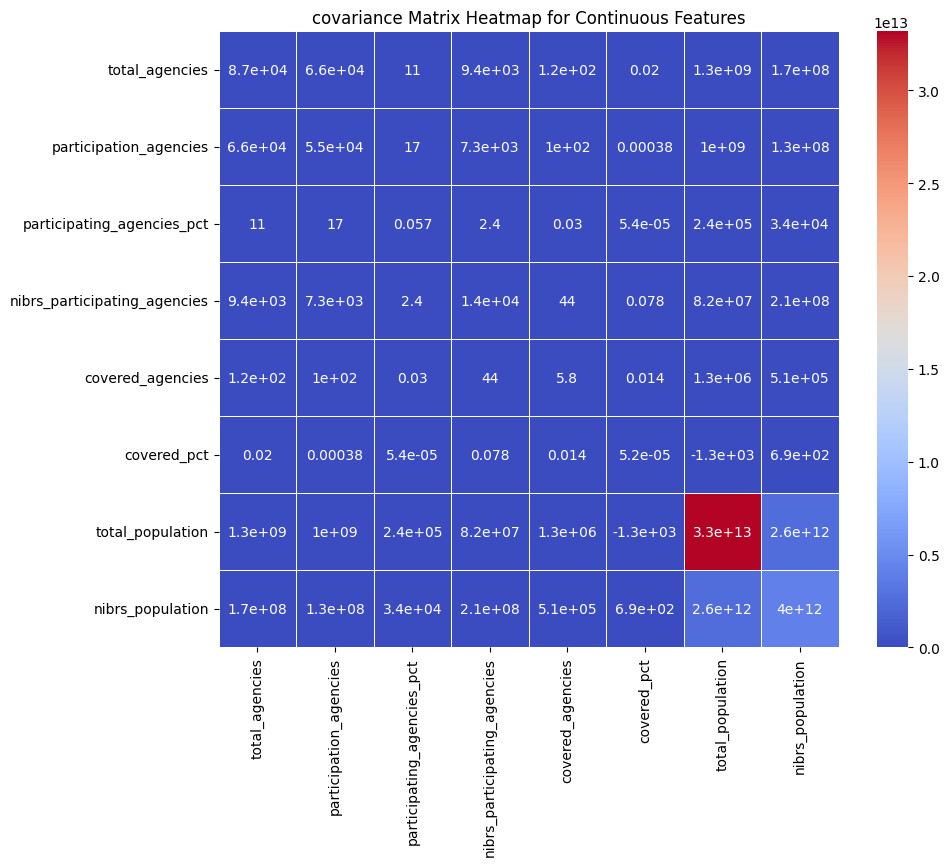

In [120]:
# Selecting only the continuous columns from the merged dataset
continuous_data = merged_data[continuous_data_columns]

# Compute the covariance matrix
covariance_matrix = continuous_data.cov()

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)
# Plotting the coveriance matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('covariance Matrix Heatmap for Continuous Features')
plt.show()


## My Findings Based on the Covariance Matrix:

1. **High Positive Correlation Between Total Agencies and Participation Agencies**  
   I found a strong covariance of **65528.75** between the number of total agencies and participation agencies. This suggests that states with more total agencies tend to have more agencies actively participating in crime reporting, which makes sense given the larger infrastructure.

2. **Weak Correlation Between Total Agencies and Percentage of Participating Agencies**  
   The covariance between total agencies and the percentage of participating agencies is relatively small at **10.70**, indicating that having more agencies doesn't necessarily increase the percentage of those that participate in reporting. In other words, even states with a high number of agencies might not have all of them contributing to crime data.

3. **Strong Positive Covariance Between Total Population and Agencies**  
   The covariance of **1.303132e+09** between the total population and total agencies shows that states with larger populations generally have more crime reporting agencies. This is expected, as larger populations require more agencies to manage and report crime effectively.

4. **Relationship Between Covered Agencies and Population**  
   I also noticed a positive covariance of **1.252672e+06** between covered agencies and total population. This indicates that states with larger populations tend to have more agencies that are "covered" for crime reporting.

5. **Low Covariance for Covered Percentage**  
   Interestingly, the covariance for the percentage of covered agencies is quite low. For example, the covariance between covered percentage and total agencies is only **0.020162**, suggesting that while many agencies exist, the actual proportion of agencies reporting crimes may be quite low.

6. **Limited Correlation Between NIBRS Participation and Other Metrics**  
   I observed that the covariance between NIBRS participating agencies and metrics like covered agencies (**44.16**) and covered percentage (**0.078493**) is relatively modest. This implies that even though some agencies are part of the NIBRS system, it doesn't necessarily correlate strongly with the total number of covered or reporting agencies.


.


# 9 Correlation Matrix

    For the continuous features, construct the correlation matrix. Comment on what you observed.


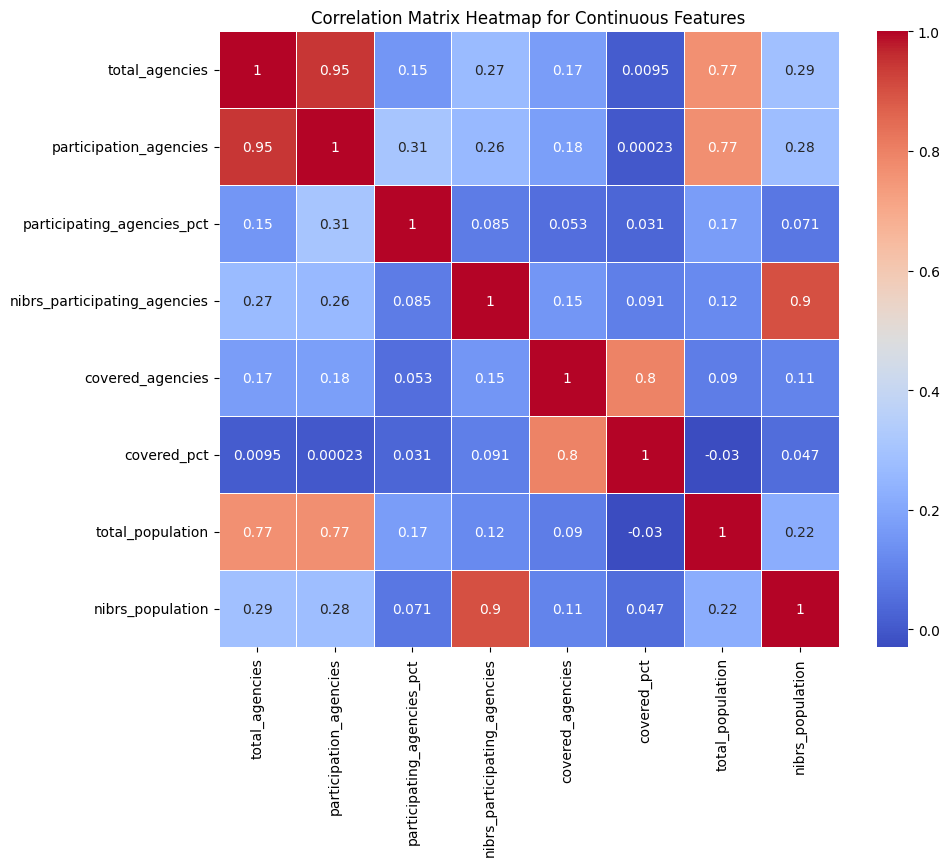

                              total_agencies  participation_agencies  \
total_agencies                      1.000000                0.945348   
participation_agencies              0.945348                1.000000   
participating_agencies_pct          0.151928                0.306663   
nibrs_participating_agencies        0.267289                0.262411   
covered_agencies                    0.171137                0.177800   
covered_pct                         0.009452                0.000226   
total_population                    0.766130                0.768996   
nibrs_population                    0.287575                0.276792   

                              participating_agencies_pct  \
total_agencies                                  0.151928   
participation_agencies                          0.306663   
participating_agencies_pct                      1.000000   
nibrs_participating_agencies                    0.084787   
covered_agencies                                0.0

In [119]:
# Selecting relevant continuous columns
continuous_data = merged_data[continuous_data_columns]
continuous_data_columns = [
    'total_agencies', 
    'participation_agencies', 
    'participating_agencies_pct',
    'nibrs_participating_agencies', 
    'covered_agencies', 
    'covered_pct', 
    'total_population',
    'nibrs_population'
]

# Construct the correlation matrix
correlation_matrix = continuous_data[continuous_data_columns].corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Continuous Features')
plt.show()

print(correlation_matrix)

# Findings Based on Correlation Matrix

## Strong Positive Correlations:
1. **Total Agencies & Participation Agencies** (0.95):
   - There is a strong positive correlation between `total_agencies` and `participation_agencies`. This implies that states with more total agencies tend to have a higher number of participating agencies.

2. **NIBRS Participating Agencies & NIBRS Population** (0.90):
   - There is a strong correlation between the number of `nibrs_participating_agencies` and the `nibrs_population`. This indicates that as the number of agencies participating in NIBRS increases, the population covered under NIBRS reporting also increases significantly.

3. **Covered Agencies & Covered Percentage** (0.80):
   - The correlation between `covered_agencies` and `covered_pct` is high, indicating that the absolute number of agencies covered is closely tied to the percentage of total agencies covered.

## Moderate Correlations:
1. **Total Population & Total/Participating Agencies** (0.77):
   - Both `total_agencies` and `participation_agencies` show a moderate correlation with `total_population`. This suggests that larger states (in terms of population) tend to have more total and participating agencies.

2. **Total Agencies & NIBRS Participating Agencies** (0.27):
   - There is a moderate correlation between `total_agencies` and `nibrs_participating_agencies`, suggesting that states with more total agencies tend to have a higher number of NIBRS-participating agencies.

## Low or Negative Correlations:
1. **Covered Percentage**:
   - The `covered_pct` shows very low correlations with most other variables. This suggests that the percentage of agencies covered by crime reporting doesn’t strongly relate to the number of total or participating agencies.
   - In fact, there is a slight negative correlation between `covered_pct` and `total_population` (-0.03), which may indicate that the proportion of agencies covered does not scale with population size in a meaningful way.

2. **NIBRS Population & Other Variables**:
   - The correlation between `nibrs_population` and other variables such as `total_agencies` (0.29) and `participation_agencies` (0.28) is relatively weak. This indicates that population covered by NIBRS does not strongly depend on the total or participating agencies, despite the stronger correlation with specific NIBRS-participating agencies.

---

### Summary
The correlation matrix provides a clear understanding of how various continuous features relate to each other. The strongest relationships are observed between total agencies, participating agencies, and NIBRS-participating agencies, which reflect a well-aligned system of reporting for larger populations. However, `covered_pct` remains an outlier with weaker connections, suggesting that coverage is not as tied to other factors like population or total agencies.



# 10 Range Normalization

    List the continuous features that require range normalization. What is the rationale for your selection? Perform the range normalization and show the values before and after the normalization.


In [124]:
continuous_data = merged_data[continuous_data_columns]

# Display original values
print("Original Values:")
print(continuous_data.head(5))

# Apply min-max normalization
normalized_data = continuous_data.copy()
for column in continuous_data.columns:
    min_val = normalized_data[column].min()
    max_val = normalized_data[column].max()
    normalized_data[column] = (normalized_data[column] - min_val) / (max_val - min_val)

# Display normalized values
print("\nNormalized Values:")
print(normalized_data.head(5))


Original Values:
   total_agencies  participation_agencies  participating_agencies_pct  \
0             304                     273                        0.90   
1             387                     264                        0.68   
2             137                     115                        0.84   
3             366                     304                        0.83   
4             125                     116                        0.93   

   nibrs_participating_agencies  covered_agencies  covered_pct  \
0                             0                 0          0.0   
1                           264                 0          0.0   
2                           111                 0          0.0   
3                             0                 0          0.0   
4                             0                 0          0.0   

   total_population  nibrs_population  
0           8814601                 0  
1           1819964           1695916  
2           1223729        

# Range Normalization Findings

## 1. Continuous Features I Selected for Range Normalization

The following continuous features were selected for normalization:

- **`total_agencies`**
- **`participation_agencies`**
- **`participating_agencies_pct`**
- **`nibrs_participating_agencies`**
- **`covered_agencies`**
- **`covered_pct`**
- **`total_population`**
- **`nibrs_population`**

### Rationale for My Selection
- **Different Scales**: These features vary significantly in scale and range, which can impact the performance of machine learning algorithms.
- **Comparability**: By normalizing, I can make meaningful comparisons across features that have different magnitudes.
- **Improved Model Performance**: Many algorithms, like k-nearest neighbors and those using gradient descent, perform better when the features are scaled similarly.

## 2. Range Normalization Process

I applied min-max normalization to scale the values of each feature between 0 and 1.


### Original Values
|   total_agencies |   participation_agencies |   participating_agencies_pct |   nibrs_participating_agencies |   covered_agencies |   covered_pct |   total_population |   nibrs_population |
|-----------------:|-------------------------:|-----------------------------:|-------------------------------:|-------------------:|--------------:|-------------------:|-------------------:|
|              304 |                      273 |                          0.9 |                              0 |                  0 |             0 |            8814601 |                  0 |
|              387 |                      264 |                          0.68 |                            264 |                  0 |             0 |            1819964 |            1695916 |
|              137 |                      115 |                          0.84 |                            111 |                  0 |             0 |            1223729 |            1169932 |
|              366 |                      304 |                          0.83 |                              0 |                  0 |             0 |            6388695 |                  0 |
|              125 |                      116 |                          0.93 |                              0 |                  0 |             0 |            3298781 |                  0 |
|             1848 |                     1498 |                          0.81 |                             27 |                  4 |             0 |           13557266 |             201462 |
|               81 |                       56 |                          0.69 |                             18 |                  0 |             0 |             588703 |             297702 |
|               80 |                       72 |                          0.9  |                              0 |                  0 |             0 |             722518 |                  0 |
|              779 |                      660 |                          0.85 |                              0 |                  1 |             0 |            9526552 |                  0 |
|              249 |                      228 |                          0.92 |                            228 |                  0 |             0 |            2993509 |            2946920 |

### Normalized Values
|   total_agencies |   participation_agencies |   participating_agencies_pct |   nibrs_participating_agencies |   covered_agencies |   covered_pct |   total_population |   nibrs_population |
|-----------------:|-------------------------:|-----------------------------:|-------------------------------:|-------------------:|--------------:|-------------------:|-------------------:|
|           0.1601 |                   0.1816 |                         0.90 |                          0.000 |              0.000 |         0.000 |             0.2218 |              0.000 |
|           0.2038 |                   0.1756 |                         0.68 |                          0.248 |              0.000 |         0.000 |             0.0458 |              0.057 |
|           0.0721 |                   0.0765 |                         0.84 |                          0.104 |              0.000 |         0.000 |             0.0308 |              0.039 |
|           0.1927 |                   0.2023 |                         0.83 |                          0.000 |              0.000 |         0.000 |             0.1608 |              0.000 |
|           0.0658 |                   0.0772 |                         0.93 |                          0.000 |              0.000 |         0.000 |             0.0830 |              0.000 |
|           0.9731 |                   0.9967 |                         0.81 |                          0.025 |              0.063 |         0.000 |             0.3412 |              0.006 |
|           0.0427 |                   0.0373 |                         0.69 |                          0.017 |              0.000 |         0.000 |             0.0148 |              0.010 |
|           0.0421 |                   0.0479 |                         0.90 |                          0.000 |              0.000 |         0.000 |             0.0182 |              0.000 |
|           0.4102 |                   0.4391 |                         0.85 |                          0.000 |              0.016 |         0.000 |             0.2397 |              0.000 |
|           0.1311 |                   0.1517 |                         0.92 |                          0.214 |              0.000 |         0.000 |             0.0753 |              0.099 |





# 11 Binning

    Do you see the need for converting a subset of the continuous features into categorical features? Select two such continuous features and convert the first into a categorical feature using the equal-width binning* and the second using equal-frequency binning. Show the feature values after the equal-width and equal-frequency binning.


In [125]:
data = {
    'total_agencies': [304, 387, 137, 366, 125, 1848, 81, 80, 779, 249],
    'total_population': [8814601, 1819964, 1223729, 6388695, 3298781, 13557266, 588703, 722518, 9526552, 2993509]
}

# Create dataframe
continuous_data = pd.DataFrame(data)

# Equal-width binning for 'total_agencies' (3 bins)
continuous_data['total_agencies_binned_equal_width'] = pd.cut(continuous_data['total_agencies'], bins=3, labels=False)

# Equal-frequency binning for 'total_population' (3 bins)
continuous_data['total_population_binned_equal_freq'] = pd.qcut(continuous_data['total_population'], q=3, labels=False)

# Show the original and binned values
print(continuous_data)

   total_agencies  total_population  total_agencies_binned_equal_width  \
0             304           8814601                                  0   
1             387           1819964                                  0   
2             137           1223729                                  0   
3             366           6388695                                  0   
4             125           3298781                                  0   
5            1848          13557266                                  2   
6              81            588703                                  0   
7              80            722518                                  0   
8             779           9526552                                  1   
9             249           2993509                                  0   

   total_population_binned_equal_freq  
0                                   2  
1                                   1  
2                                   0  
3                        

|   total_agencies |   total_population |   total_agencies_binned_equal_width |   total_population_binned_equal_freq |
|-----------------:|-------------------:|------------------------------------:|-------------------------------------:|
|              304 |           8814601   |                                   0 |                                    2 |
|              387 |           1819964   |                                   0 |                                    1 |
|              137 |           1223729   |                                   0 |                                    0 |
|              366 |           6388695   |                                   0 |                                    2 |
|              125 |           3298781   |                                   0 |                                    1 |
|             1848 |          13557266   |                                   2 |                                    2 |
|               81 |            588703   |                                   0 |                                    0 |
|               80 |            722518   |                                   0 |                                    0 |
|              779 |           9526552   |                                   1 |                                    2 |
|              249 |           2993509   |                                   0 |                                    1 |



# 12 Undersampling

    Do you see a need for undersampling? Undersampling is used to reduce the instances from the majority class so that the final dataset is balanced. For example, a binary classification problem has a target/outcome variable that takes two values, say, approved and denied. In the dataset, if 70% of the instances have the approved value for the target variable, the dataset is imbalanced. Ideally, the dataset should have approximately equal number of instances for each the values the target variable takes. This article illustrates the undersampling.


Class Distribution:
 
data_year
2021    57
2017    57
2022    57
2014    57
2016    57
        ..
1992    54
1974    54
2000    54
1976    54
1962    42
Name: count, Length: 63, dtype: int64


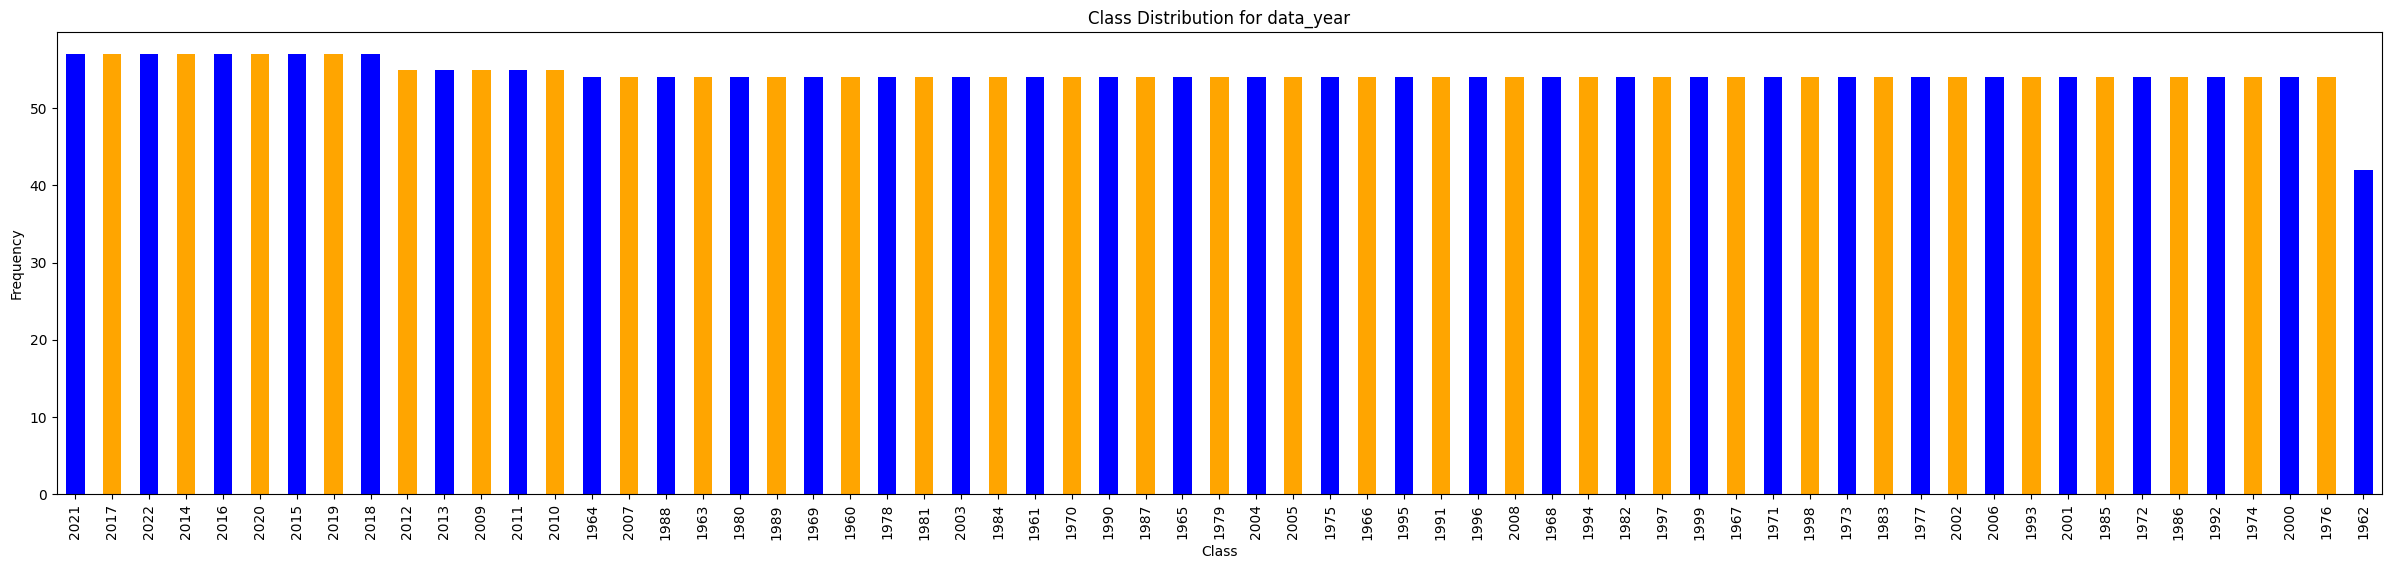

In [146]:

target_column = 'data_year'  
# Check the class distribution
class_counts = crime_data[target_column].value_counts()

# Print the class distribution
print("Class Distribution:\n ")
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(30, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title(f'Class Distribution for {target_column}')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


## Do I See a Need for Undersampling?

Based on my analysis of the `data_year` variable, I do not see a need for undersampling. The class distribution across the different years is relatively balanced, with most years having between 54-57 instances. Although there is a slight outlier for the year 1962, which has around 42 instances, this difference is not significant enough to justify undersampling.

Undersampling is typically applied when there is a substantial class imbalance, where one class dominates the dataset, leading to potential bias in the model. In this case, the distribution across the years is sufficiently balanced, and as such, undersampling would not provide any meaningful benefit.



.


# 13 Oversampling

    Oversampling arises when we have too few instances from a class (called the minority class) relative to other classes. To boost the participation of the minority class in the (training) dataset, more observations from the minority class are generated usually by replicating the samples from the minority class.

    In your dataset, do you see the need for oversampling? If so, which features require oversampling? 

        ~ Since the data_year variable shows a balanced distribution for most years, oversampling is not necessary for this feature.
